# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

* **Project Title** : Home Credit Default Risk Prediction

* **Group Name**    : Group1

* **Group Number**  : 1

* **Group Members** 
(From Left to right and top to bottom) 

 * Archana Krishnamurthy (akrishn@iu.edu)
 * Anitha Ganapathy (aganapa@iu.edu)
 * Bathurunnisha Abdul Jabbar (babdulj@iu.edu)
 * Rajesh Thanji (rthanji@iu.edu)

* **Team Montage**
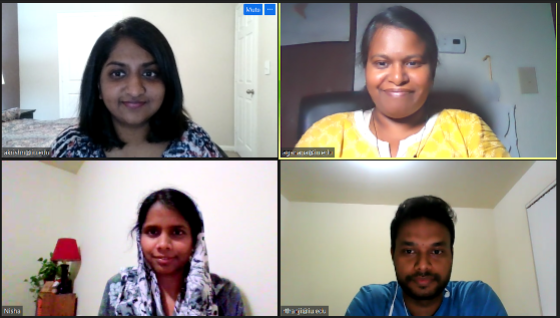

# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



If running on Google Drive Run below else not

In [1]:
import gc

In [2]:
gc.get_threshold()

(700, 10, 10)

In [3]:
gc.set_threshold(1000, 15, 15)

In [4]:
def collecttrash():
  print('before collection : ',gc.get_count())
  gc.collect()
  print('after collection : ',gc.get_count())

In [5]:
collecttrash()

before collection :  (680, 0, 10)
after collection :  (0, 0, 0)


In [6]:
%config Completer.use_jedi = False
from time import time, ctime

nb_start = time()

print("Note Book Start time:   ", ctime(nb_start))

Note Book Start time:    Tue Apr 27 11:04:17 2021


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  """Entry point for launching an IPython kernel.


In [1]:
!pwd

/root/shared/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission


In [2]:
!mkdir ~/.kaggle
!cp /root/shared/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory '/root/.kaggle': File exists


In [9]:
! kaggle competitions files home-credit-default-risk

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [1]:
DATA_DIR = "../../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory '../../../../Data/home-credit-default-risk': No such file or directory


In [4]:
!ls -l $DATA_DIR

total 2621364
-rw-r--r-- 1 root root     37383 Apr 18 16:25 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root 392703158 Apr 18 16:26 POS_CASH_balance.csv
-rw-r--r-- 1 root root  26567651 Apr 18 16:26 application_test.csv
-rw-r--r-- 1 root root 166133370 Apr 18 16:26 application_train.csv
-rw-r--r-- 1 root root 170016717 Apr 18 16:26 bureau.csv
-rw-r--r-- 1 root root 375592889 Apr 18 16:27 bureau_balance.csv
-rw-r--r-- 1 root root 424582605 Apr 18 16:27 credit_card_balance.csv
-rw-r--r-- 1 root root 723118349 Apr 18 16:28 installments_payments.csv
-rw-r--r-- 1 root root 404973293 Apr 18 16:28 previous_application.csv
-rw-r--r-- 1 root root    536202 Apr 18 16:28 sample_submission.csv


In [2]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)

import os 

os.chdir("/content/drive/My Drive")

Mounted at /content/drive


In [ ]:
#!ls

In [13]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/AML Project/Data/bureau.csv')

In [3]:
DATA_DIR='/content/drive/My Drive/AML Project/Data/'

# Dataset Description


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

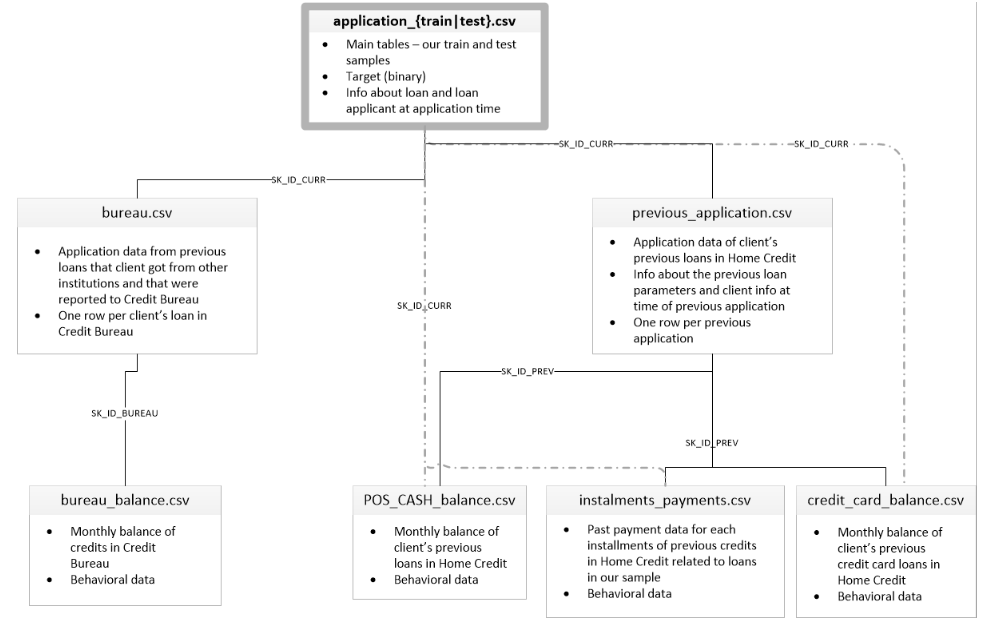

## Download the files via Kaggle API


In [1]:
DATA_DIR = "/root/shared/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/data"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory '/root/shared/I526_AML_Student/Assignments/Unit-Project-Home-Credit-Default-Risk/HCDR_Phase_1_baseline_submission/data': File exists


In [2]:
!ls -l $DATA_DIR

total 3326068
-rw-r--r-- 1 root root     37383 Apr 18 16:25 HomeCredit_columns_description.csv
-rw-r--r-- 1 root root 392703158 Apr 18 16:26 POS_CASH_balance.csv
-rw-r--r-- 1 root root  26567651 Apr 18 16:26 application_test.csv
-rw-r--r-- 1 root root 166133370 Apr 18 16:26 application_train.csv
-rw-r--r-- 1 root root 170016717 Apr 18 16:26 bureau.csv
-rw-r--r-- 1 root root 375592889 Apr 18 16:27 bureau_balance.csv
-rw-r--r-- 1 root root 424582605 Apr 18 16:27 credit_card_balance.csv
-rw-r--r-- 1 root root 721616255 Apr 27 15:17 home-credit-default-risk.zip
-rw-r--r-- 1 root root 723118349 Apr 18 16:28 installments_payments.csv
-rw-r--r-- 1 root root 404973293 Apr 18 16:28 previous_application.csv
-rw-r--r-- 1 root root    536202 Apr 18 16:28 sample_submission.csv


In [3]:
#! kaggle competitions download home-credit-default-risk -p $DATA_DIR

100%|#######################################9| 688M/688M [01:06<00:00, 12.1MB/s]
100%|########################################| 688M/688M [01:06<00:00, 10.9MB/s]


### Imports

In [3]:
# Uncomment if using running it on jupyter lab 
# For code autocompletion
# %config Completer.use_jedi = False

# Preprocessing imports
import numpy as np
import pandas as pd 
import os
import zipfile
import matplotlib.pyplot as plt
# from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix

# Pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Model imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss
from sklearn.metrics import classification_report, roc_auc_score, make_scorer

from scipy import stats
from time import time, ctime

import re
import json
import pprint
import warnings
warnings.filterwarnings('ignore')

pprint = pprint.PrettyPrinter().pprint

In [ ]:
# !pip install lightgbm

     |████████████████████████████████| 2.0 MB 959 kB/s eta 0:00:01


In [4]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
import json
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.metrics import explained_variance_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve

In [4]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_file = DATA_DIR + '/' + 'home-credit-default-risk.zip'
    zip_ref = zipfile.ZipFile(zip_file, 'r')
    zip_ref.extractall(path=DATA_DIR)
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

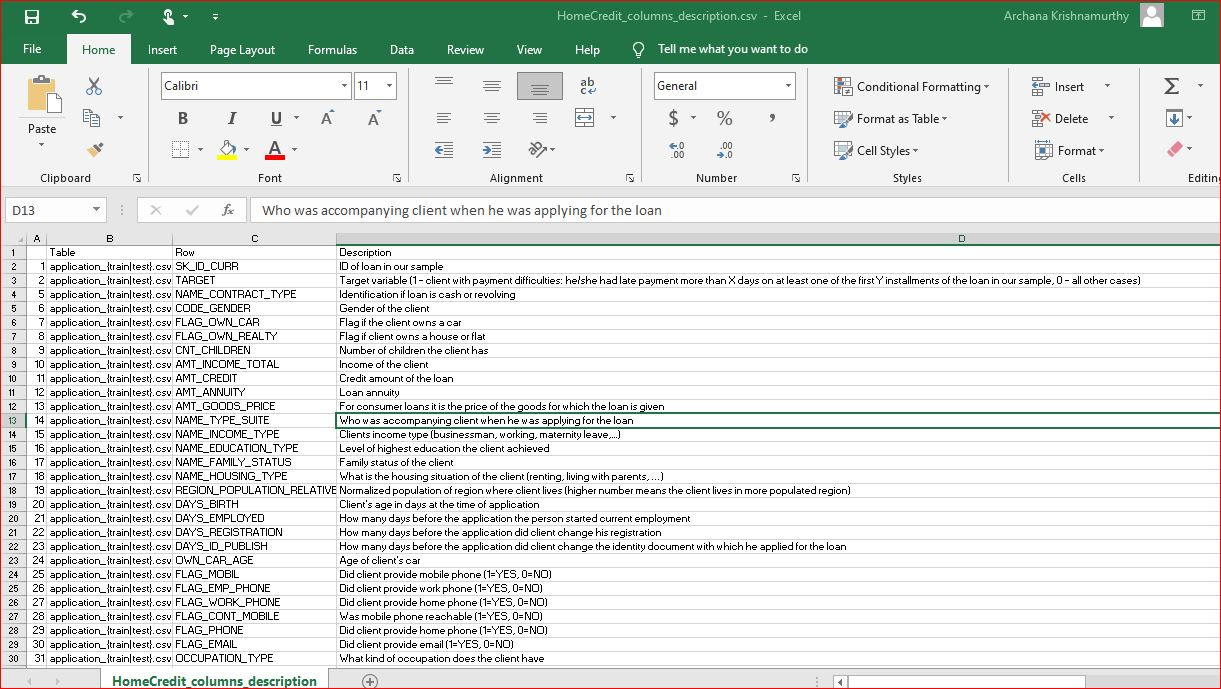

### Application train

In [5]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily


### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [6]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [7]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 1min 26s, sys: 1min 43s, total: 3min 10s
Wall time: 4min 24s


In [8]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_test        : [     48,744, 121]
dataset application_train       : [    307,511, 122]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis
<a id='EDA Section'></a> 

## Summary Statistics

In [14]:
print('\033[1m' + "Size of each dataset : " + '\033[0m' , end = '\n' * 2)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]:4}]')

Size of each dataset : 

dataset application_test        : [     48,744,  121]
dataset application_train       : [    307,511,  122]
dataset bureau                  : [  1,716,428,   17]
dataset bureau_balance          : [ 27,299,925,    3]
dataset credit_card_balance     : [  3,840,312,   23]
dataset installments_payments   : [ 13,605,401,    8]
dataset previous_application    : [  1,670,214,   37]
dataset POS_CASH_balance        : [ 10,001,358,    8]


### Summary of Application train

In [15]:
(datasets['application_train'].dtypes).unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [16]:
from IPython.display import display, HTML
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Full stats

def stats_summary1(df, df_name):
    print(datasets[df_name].info(verbose=True, null_counts=True ))
    print("-----"*15)
    print(f"Shape of the df {df_name} is {df.shape} \n")
    print("-----"*15)
    print(f"Statistical summary of {df_name} is :")
    print("-----"*15)
    print(f"Description of the df {df_name}:\n")
    print(display(HTML(np.round(datasets['application_train'].describe(),2).to_html()))) 
    #print(f"Description of the df {df_name}:\n",np.round(datasets['application_train'].describe(),2))

def stats_summary2(df, df_name):   
    print(f"Description of the df continued for {df_name}:\n")
    print("-----"*15)
    print("Data type value counts: \n",df.dtypes.value_counts())
    print("\nReturn number of unique elements in the object. \n")
    print(df.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
    

# List the categorical and Numerical features of a DF
def feature_datatypes_groups(df, df_name):
    df_dtypes = df.columns.to_series().groupby(df.dtypes).groups
    print("-----"*15)
    print(f"Categorical and Numerical(int + float) features  of {df_name}.")
    print("-----"*15)
    print()
    for k, v in df_dtypes.items():
        print({k.name: v})
        print("---"*10)
    print("\n \n")    
        
# Null data list and plot.        
def null_data_plot(df, df_name):
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
    sum_missing = df.isna().sum().sort_values(ascending = False)
    missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
    missing_data=missing_data[missing_data['Percent'] > 0] 
    print("-----"*15)
    print("-----"*15)
    print('\n The Missing Data: \n')
#     display(missing_data)  # display few
    if len(missing_data)==0:
      print("No missing Data")
    else:
      display(HTML(missing_data.to_html()))  # display all the rows
      print("-----"*15)
      if len(df.columns)> 35:
        f,ax =plt.subplots(figsize=(8,15))
      else: 
        f,ax =plt.subplots()
      #plt.xticks(rotation='90')
      #fig=sns.barplot(missing_data.index, missing_data["Percent"],alpha=0.8)
      #plt.xlabel('Features', fontsize=15)
      #plt.ylabel('Percent of missing values', fontsize=15)
      plt.title(f'Percent missing data for {df_name}.', fontsize=10)
      fig=sns.barplot(missing_data["Percent"],missing_data.index ,alpha=0.8)
      plt.xlabel('Percent of missing values', fontsize=10)
      plt.ylabel('Features', fontsize=10)
      return missing_data


# Full consolidation of all the stats function.
def display_stats(df, df_name):
    print("--"*40)
    print(" "*20 + '\033[1m'+ df_name +  '\033[0m' +" "*20)
    print("--"*40)
    stats_summary1(df, df_name)

def display_feature_info(df, df_name):
    stats_summary2(df, df_name)
    feature_datatypes_groups(df, df_name)
    null_data_plot(df, df_name)



In [17]:
display_stats(datasets['application_train'], 'application_train')

--------------------------------------------------------------------------------
                    application_train                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT

None


Description of the df continued for application_train:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      41
object     16
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_train.
------------------------------------------------

---------------------------------------------------------------------------


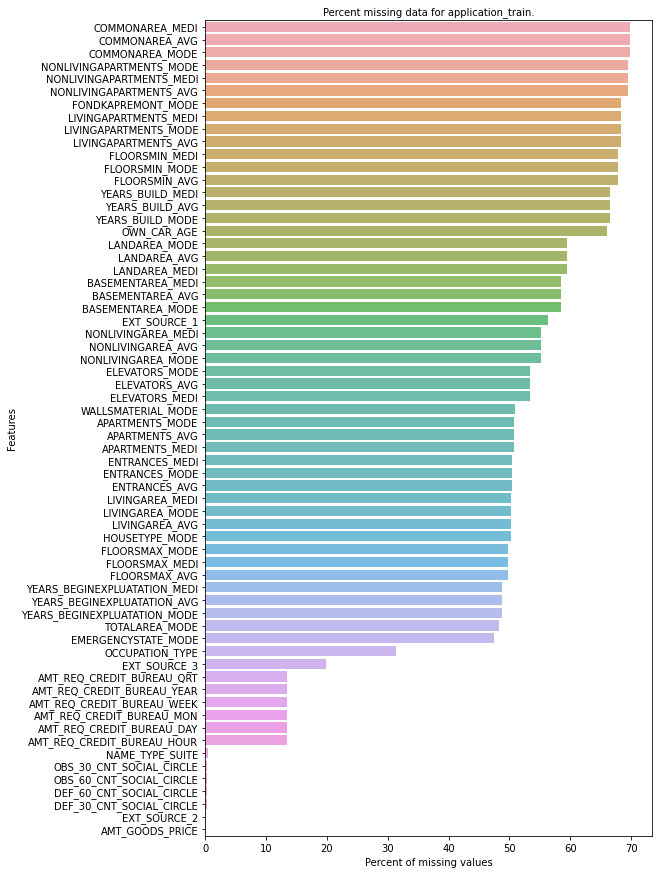

In [18]:
display_feature_info(datasets['application_train'], 'application_train')

#### Observation 1 
- We can see anamolies in the data from the descriptive statistics for Days Birth, Days employed, Days registration, Days Id publish which is a negative value and is not expected. 
- Own car age has a max of 91. 
- There are redundant features related to living space and realty which can be helpful to weed out during the feature eduction process and avoid issues with multicollinearity.

##### Days Employed

In [19]:
datasets["application_train"]['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [20]:
anom_days_employed = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED']==365243]
norm_days_employed = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED']!=365243]
print(anom_days_employed.shape)

dr_anom = anom_days_employed['TARGET'].mean()*100
dr_norm = norm_days_employed['TARGET'].mean()*100

print('Default rate (Anomaly): {:.2f}'.format(dr_anom))
print('Default rate (Normal): {:.2f}'.format(dr_norm))

pct_anom_days_employed = (anom_days_employed.shape[0]/datasets["application_train"].shape[0])*100
print(pct_anom_days_employed)

(55374, 122)
Default rate (Anomaly): 5.40
Default rate (Normal): 8.66
18.00716071945394


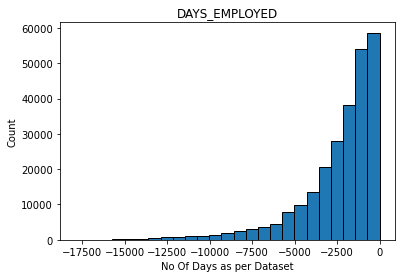

In [21]:
df_app_train=datasets["application_train"]
df_app_train['DAYS_EMPLOYED_ANOM'] = df_app_train['DAYS_EMPLOYED'] == 365243
df_app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)
plt.hist(df_app_train['DAYS_EMPLOYED'],edgecolor = 'k', bins = 25)
plt.title('DAYS_EMPLOYED'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

The bins above histogram shows that the data is not logical and this feature needs to be further investigated for imbalances. Number of days employed would show a steady source of income and could be a useful feature for predicting risk

##### Own Car Age

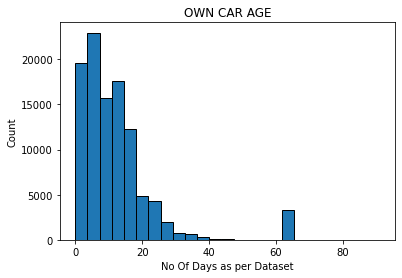

In [22]:
plt.hist(datasets["application_train"]['OWN_CAR_AGE'],edgecolor = 'k', bins = 25)
plt.title('OWN CAR AGE'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

We see that those who have cars over 60 years old have a number of applications (i.e., 3339). This could a good area to investigate risk

Description of the df continued for application_train:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      41
object     16
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_train.
------------------------------------------------

---------------------------------------------------------------------------


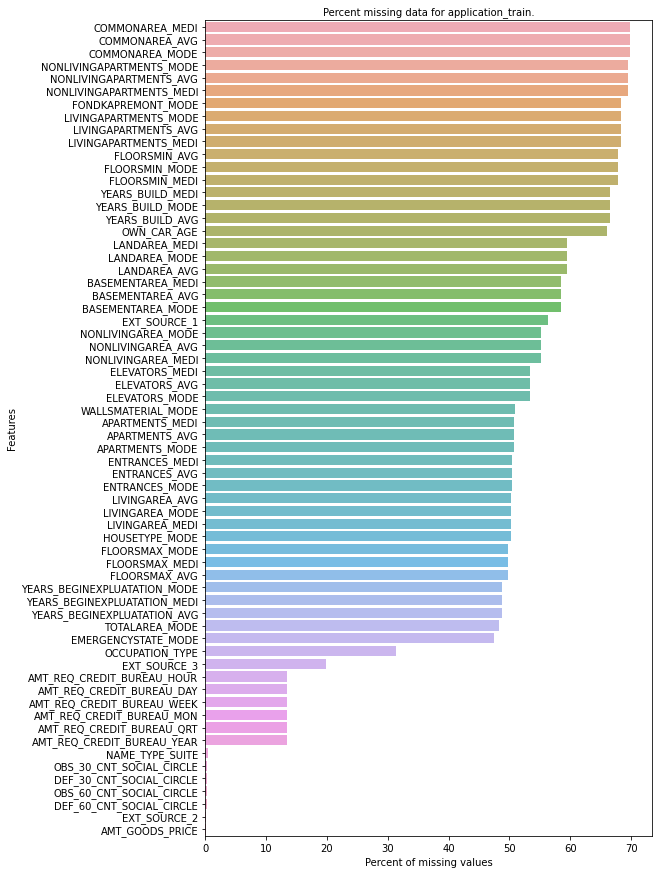

In [ ]:
display_feature_info(datasets['application_train'], 'application_train')

#### Observation 2
-  Application Train is the transactional dataset and has the most details regarding the loan requests submitted. 
-  Missing values seem to be of concern in this dataset. Occupation Type and Organization Type are categorical values that have 58 and 18 categories respectively and can be useful in feature engineering.

##### Applicants Age 

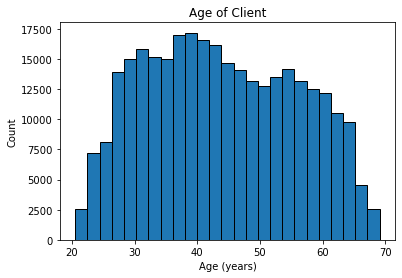

In [23]:
plt.hist(datasets["application_train"]['DAYS_BIRTH']/-365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

##### Applicants occupations

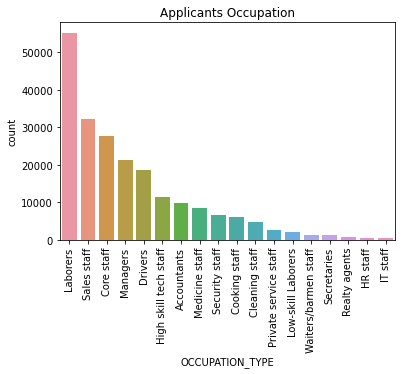

In [24]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"], order = datasets["application_train"]['OCCUPATION_TYPE'].value_counts().index);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

##### Contract Type with Amount Credit and Code Gender

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [26]:
def generic_xy_boxplot(xaxisfeature,yaxisfeature,legendcategory,data,log_scale):
  sns.boxplot(xaxisfeature, yaxisfeature, hue = legendcategory, data = data)
  plt.title('Boxplot for '+ xaxisfeature +' with ' + yaxisfeature+' and '+legendcategory,fontsize=10)
  if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{yaxisfeature} (log Scale)')
                plt.tight_layout()

In [27]:
def box_plot(plots):
  number_of_subplots = len(plots)
  plt.figure(figsize = (20,8))
  sns.set_style('whitegrid')
  for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        xaxisfeature=ele[0]
        yaxisfeature=ele[1]
        legendcategory=ele[2]
        data=ele[3]
        log_scale=ele[4]
        generic_xy_boxplot(xaxisfeature,yaxisfeature,legendcategory,data,log_scale)

In [28]:
plots=[['NAME_CONTRACT_TYPE','AMT_CREDIT','CODE_GENDER',datasets['application_train'],False]]

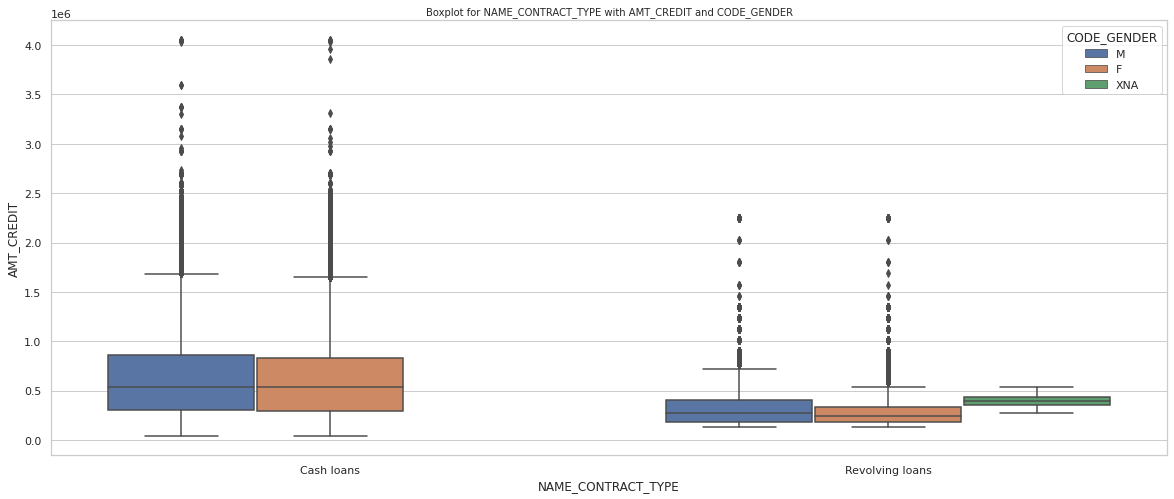

In [29]:
box_plot(plots)

Gender does not indicate a major impact . But credit amount for cash loans are significantly high compared to revolving loans.


### Summary of previous_application

In [30]:
display_stats(datasets['previous_application'], 'previous_application')

--------------------------------------------------------------------------------
                    previous_application                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9  

None


#### Observation 3
-  The count of children go upto 19, this could be an outlier and a risk worth investigating.
-  All no of day fields are negative values showing anamolies in the data. However there are fields indicating average years. A calculation comparing the average years and days could prove valuable

Description of the df continued for previous_application:

---------------------------------------------------------------------------
Data type value counts: 
 object     16
float64    15
int64       6
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of previous_application.
--------------------------

---------------------------------------------------------------------------


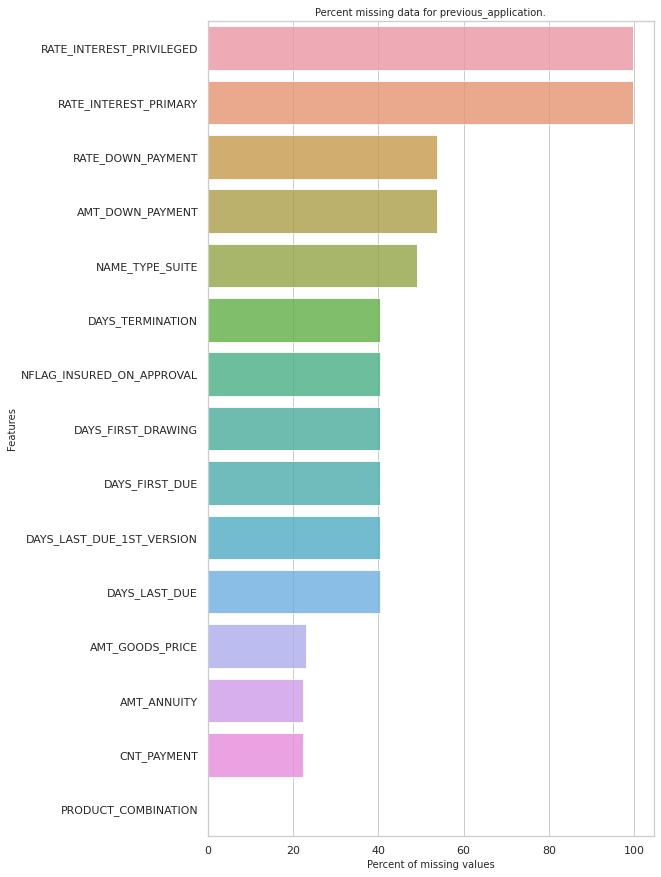

In [31]:
display_feature_info(datasets['previous_application'], 'previous_application')

### Summary of bureau

In [32]:
display_stats(datasets['bureau'], 'bureau')

--------------------------------------------------------------------------------
                    bureau                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SU

None


Description of the df continued for bureau:

---------------------------------------------------------------------------
Data type value counts: 
 float64    8
int64      6
object     3
dtype: int64

Return number of unique elements in the object. 

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of bureau.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'CNT_CREDIT_PROLONG', 'DAYS_CREDIT_UPDATE'],
      dtype='object')}
------------------------------
{'float64': Index(['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY'],
      dtype='object')}
------------------------------
{'ob

---------------------------------------------------------------------------


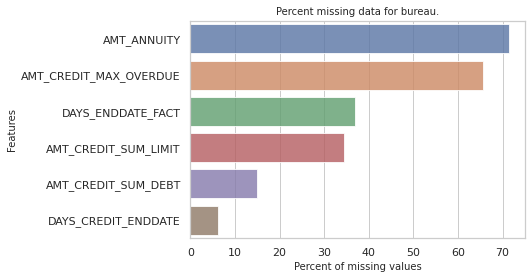

In [33]:
display_feature_info(datasets['bureau'], 'bureau')

### Summary of bureau_balance

In [34]:
display_stats(datasets['bureau_balance'], 'bureau_balance')

--------------------------------------------------------------------------------
                    bureau_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   SK_ID_BUREAU    27299925 non-null  int64 
 1   MONTHS_BALANCE  27299925 non-null  int64 
 2   STATUS          27299925 non-null  object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None
---------------------------------------------------------------------------
Shape of the df bureau_balance is (27299925, 3) 

---------------------------------------------------------------------------
Statistical summary of bureau_balance is :
---------------------------------------------------------------------------
Description of the df bureau_balance:



None


In [35]:
display_feature_info(datasets['bureau_balance'], 'bureau_balance')

Description of the df continued for bureau_balance:

---------------------------------------------------------------------------
Data type value counts: 
 int64     2
object    1
dtype: int64

Return number of unique elements in the object. 

STATUS    8
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of bureau_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_BUREAU', 'MONTHS_BALANCE'], dtype='object')}
------------------------------
{'object': Index(['STATUS'], dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
---------------------------------------------------------------------------

 The Missing Data: 

No missing Data


#### Observation 4
- Bureau balance & bureau have no missing data. These datasets can provide accurate aggreagte features.

### Summary of credit_card_balance

In [36]:
display_stats(datasets['credit_card_balance'], 'credit_card_balance')

--------------------------------------------------------------------------------
                    credit_card_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  3840312 non-null  int64  
 1   SK_ID_CURR                  3840312 non-null  int64  
 2   MONTHS_BALANCE              3840312 non-null  int64  
 3   AMT_BALANCE                 3840312 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     3840312 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    3090496 non-null  float64
 6   AMT_DRAWINGS_CURRENT        3840312 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  3090496 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    3090496 non-null  float64
 9   AMT_INST_MI

None


Description of the df continued for credit_card_balance:

---------------------------------------------------------------------------
Data type value counts: 
 float64    15
int64       7
object      1
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_STATUS    7
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of credit_card_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'CNT_DRAWINGS_CURRENT', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')}
------------------------------
{'float64': Index(['AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL

---------------------------------------------------------------------------


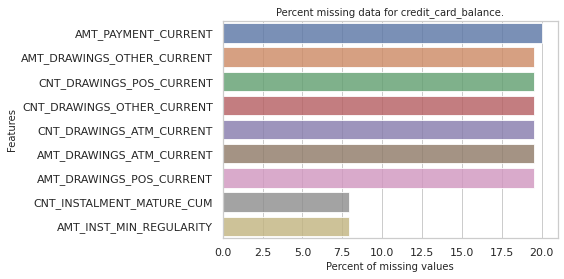

In [37]:
display_feature_info(datasets['credit_card_balance'], 'credit_card_balance')

### Summary of installments_payments

In [38]:
display_stats(datasets['installments_payments'], 'installments_payments')

--------------------------------------------------------------------------------
                    installments_payments                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   SK_ID_PREV              13605401 non-null  int64  
 1   SK_ID_CURR              13605401 non-null  int64  
 2   NUM_INSTALMENT_VERSION  13605401 non-null  float64
 3   NUM_INSTALMENT_NUMBER   13605401 non-null  int64  
 4   DAYS_INSTALMENT         13605401 non-null  float64
 5   DAYS_ENTRY_PAYMENT      13602496 non-null  float64
 6   AMT_INSTALMENT          13605401 non-null  float64
 7   AMT_PAYMENT             13602496 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None
---------------------------------------------

None


Description of the df continued for installments_payments:

---------------------------------------------------------------------------
Data type value counts: 
 float64    5
int64      3
dtype: int64

Return number of unique elements in the object. 

Series([], dtype: float64)
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of installments_payments.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_NUMBER'], dtype='object')}
------------------------------
{'float64': Index(['NUM_INSTALMENT_VERSION', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
---------------------------------------------------------------------------

 The Missing Data: 



---------------------------------------------------------------------------


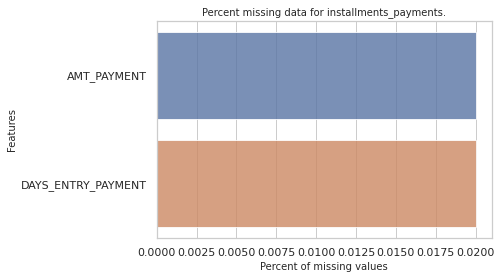

In [39]:
display_feature_info(datasets['installments_payments'], 'installments_payments')

### Summary of POS_CASH_balance

In [40]:
display_stats(datasets['POS_CASH_balance'], 'POS_CASH_balance')

--------------------------------------------------------------------------------
                    POS_CASH_balance                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   SK_ID_PREV             10001358 non-null  int64  
 1   SK_ID_CURR             10001358 non-null  int64  
 2   MONTHS_BALANCE         10001358 non-null  int64  
 3   CNT_INSTALMENT         9975287 non-null   float64
 4   CNT_INSTALMENT_FUTURE  9975271 non-null   float64
 5   NAME_CONTRACT_STATUS   10001358 non-null  object 
 6   SK_DPD                 10001358 non-null  int64  
 7   SK_DPD_DEF             10001358 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None
------------------------------------------------

None


Description of the df continued for POS_CASH_balance:

---------------------------------------------------------------------------
Data type value counts: 
 int64      5
float64    2
object     1
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_STATUS    9
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of POS_CASH_balance.
---------------------------------------------------------------------------

{'int64': Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'SK_DPD', 'SK_DPD_DEF'], dtype='object')}
------------------------------
{'float64': Index(['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE'], dtype='object')}
------------------------------
{'object': Index(['NAME_CONTRACT_STATUS'], dtype='object')}
------------------------------

 

---------------------------------------------------------------------------
------------------------------------------------------------

---------------------------------------------------------------------------


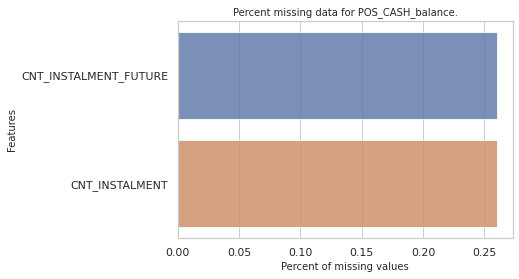

In [41]:
display_feature_info(datasets['POS_CASH_balance'], 'POS_CASH_balance')

### Summary of application_test

In [42]:
display_stats(datasets['application_test'], 'application_test')

--------------------------------------------------------------------------------
                    application_test                    
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    48744 non-null  int64  
 1   NAME_CONTRACT_TYPE            48744 non-null  object 
 2   CODE_GENDER                   48744 non-null  object 
 3   FLAG_OWN_CAR                  48744 non-null  object 
 4   FLAG_OWN_REALTY               48744 non-null  object 
 5   CNT_CHILDREN                  48744 non-null  int64  
 6   AMT_INCOME_TOTAL              48744 non-null  float64
 7   AMT_CREDIT                    48744 non-null  float64
 8   AMT_ANNUITY                   48720 non-null  float64
 9   AMT_GOODS_PRICE  

None


Description of the df continued for application_test:

---------------------------------------------------------------------------
Data type value counts: 
 float64    65
int64      40
object     16
dtype: int64

Return number of unique elements in the object. 

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64
---------------------------------------------------------------------------
Categorical and Numerical(int + float) features  of application_test.
--------------------------------------------------

---------------------------------------------------------------------------


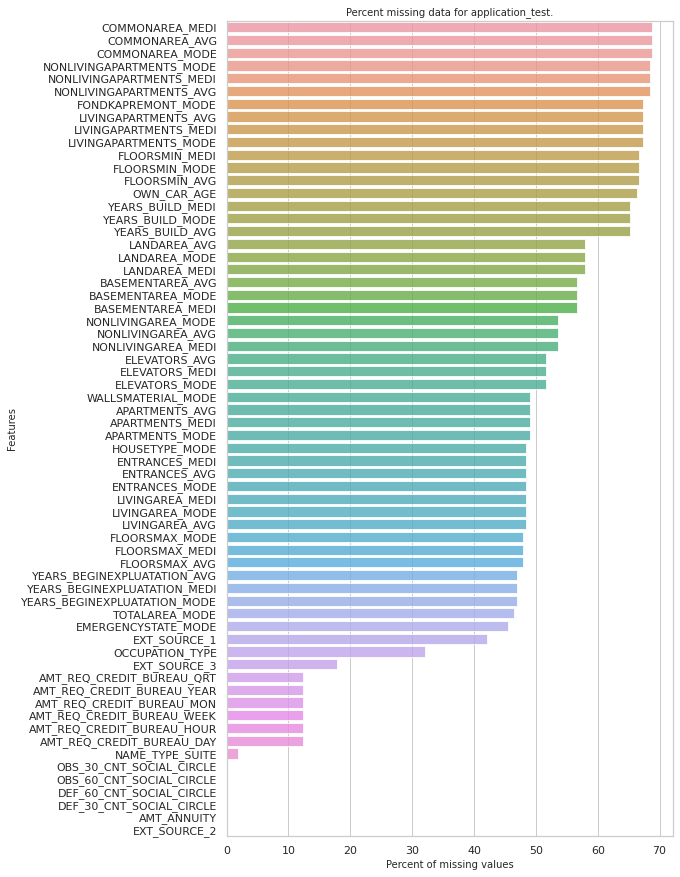

In [43]:
display_feature_info(datasets['application_test'], 'application_test')

## Correlation Analysis
<a id='correlation'></a> 

The top 20 correlated features (positive and negative) for application train datset are listed below. 

In [44]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [45]:
num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
               'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
df = datasets["application_train"]
df2 = df[num_attribs]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

##  Distribution of the Datasets

The distribution of the top correlated features are plotted below

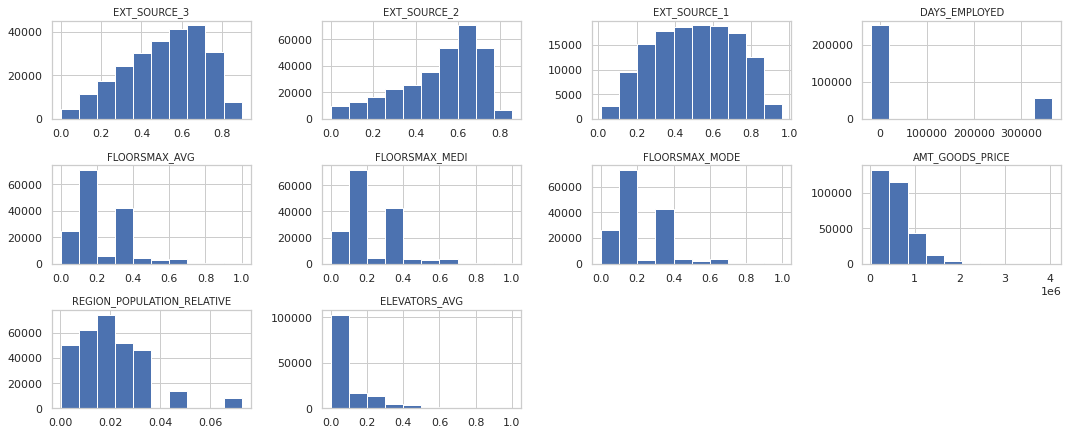

In [46]:
var_neg_corr = correlations.head(10).index.values
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(15,20))
for i,var in enumerate(var_neg_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    
    plt.subplot(numVar,4,i+1)
    datasets["application_train"][var].hist()
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

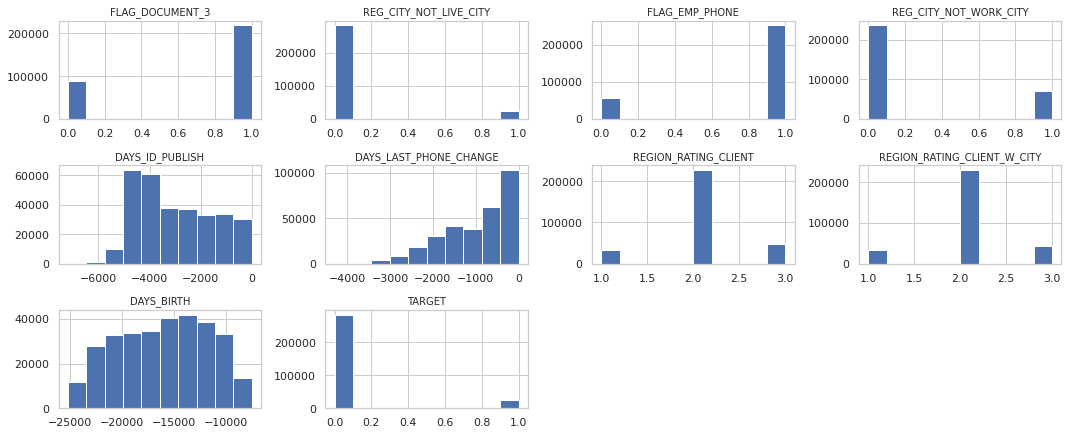

In [47]:
var_pos_corr = correlations.tail(10).index.values
numVar = var_pos_corr.shape[0]

plt.figure(figsize=(15,20))
for i,var in enumerate(var_pos_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    
    plt.subplot(numVar,4,i+1)
    datasets["application_train"][var].hist()
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

### Observation 5
- Historgrams used to plot the distribution of the highly correlated variables

In [48]:
def cat_features_plot(datasets, df_name):
    df = datasets[df_name]
    df['TARGET'].replace(0, "No Default", inplace=True)
    df['TARGET'].replace(1, "Default", inplace=True)

#     df.select_dtypes('object')
    categorical_col = []
    
    for col in df:
        if df[col].dtype == 'object':
            categorical_col.append(col)

    # print("The numerical olumns are: \n \n ",numerical_col)
    #print("The categorical columns are: \n \n ",categorical_col)

    # categorical_col = categorical_col[0:8]
    #print(int(len(categorical_col)))
    plot_x = int(len(categorical_col)/2)
    fig, ax = plt.subplots(plot_x, 2, figsize=(20, 50))
    #plt.subplots_adjust(left=None, bottom=None, right=None,
                        #top=None, wspace=None, hspace=0.45)

    num = 0
    for i in range(0, 8):
        for j in range(0,2):
            tst = sns.countplot(x=categorical_col[num],
                               data=df, hue='TARGET', ax=ax[i][j])
            tst.set_title(f"Distribution of the {categorical_col[num]}  Variable.")
            tst.set_xticklabels(tst.get_xticklabels(), rotation=90)
            plt.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=None, hspace=0.45)
            num = num + 1
            plt.tight_layout()

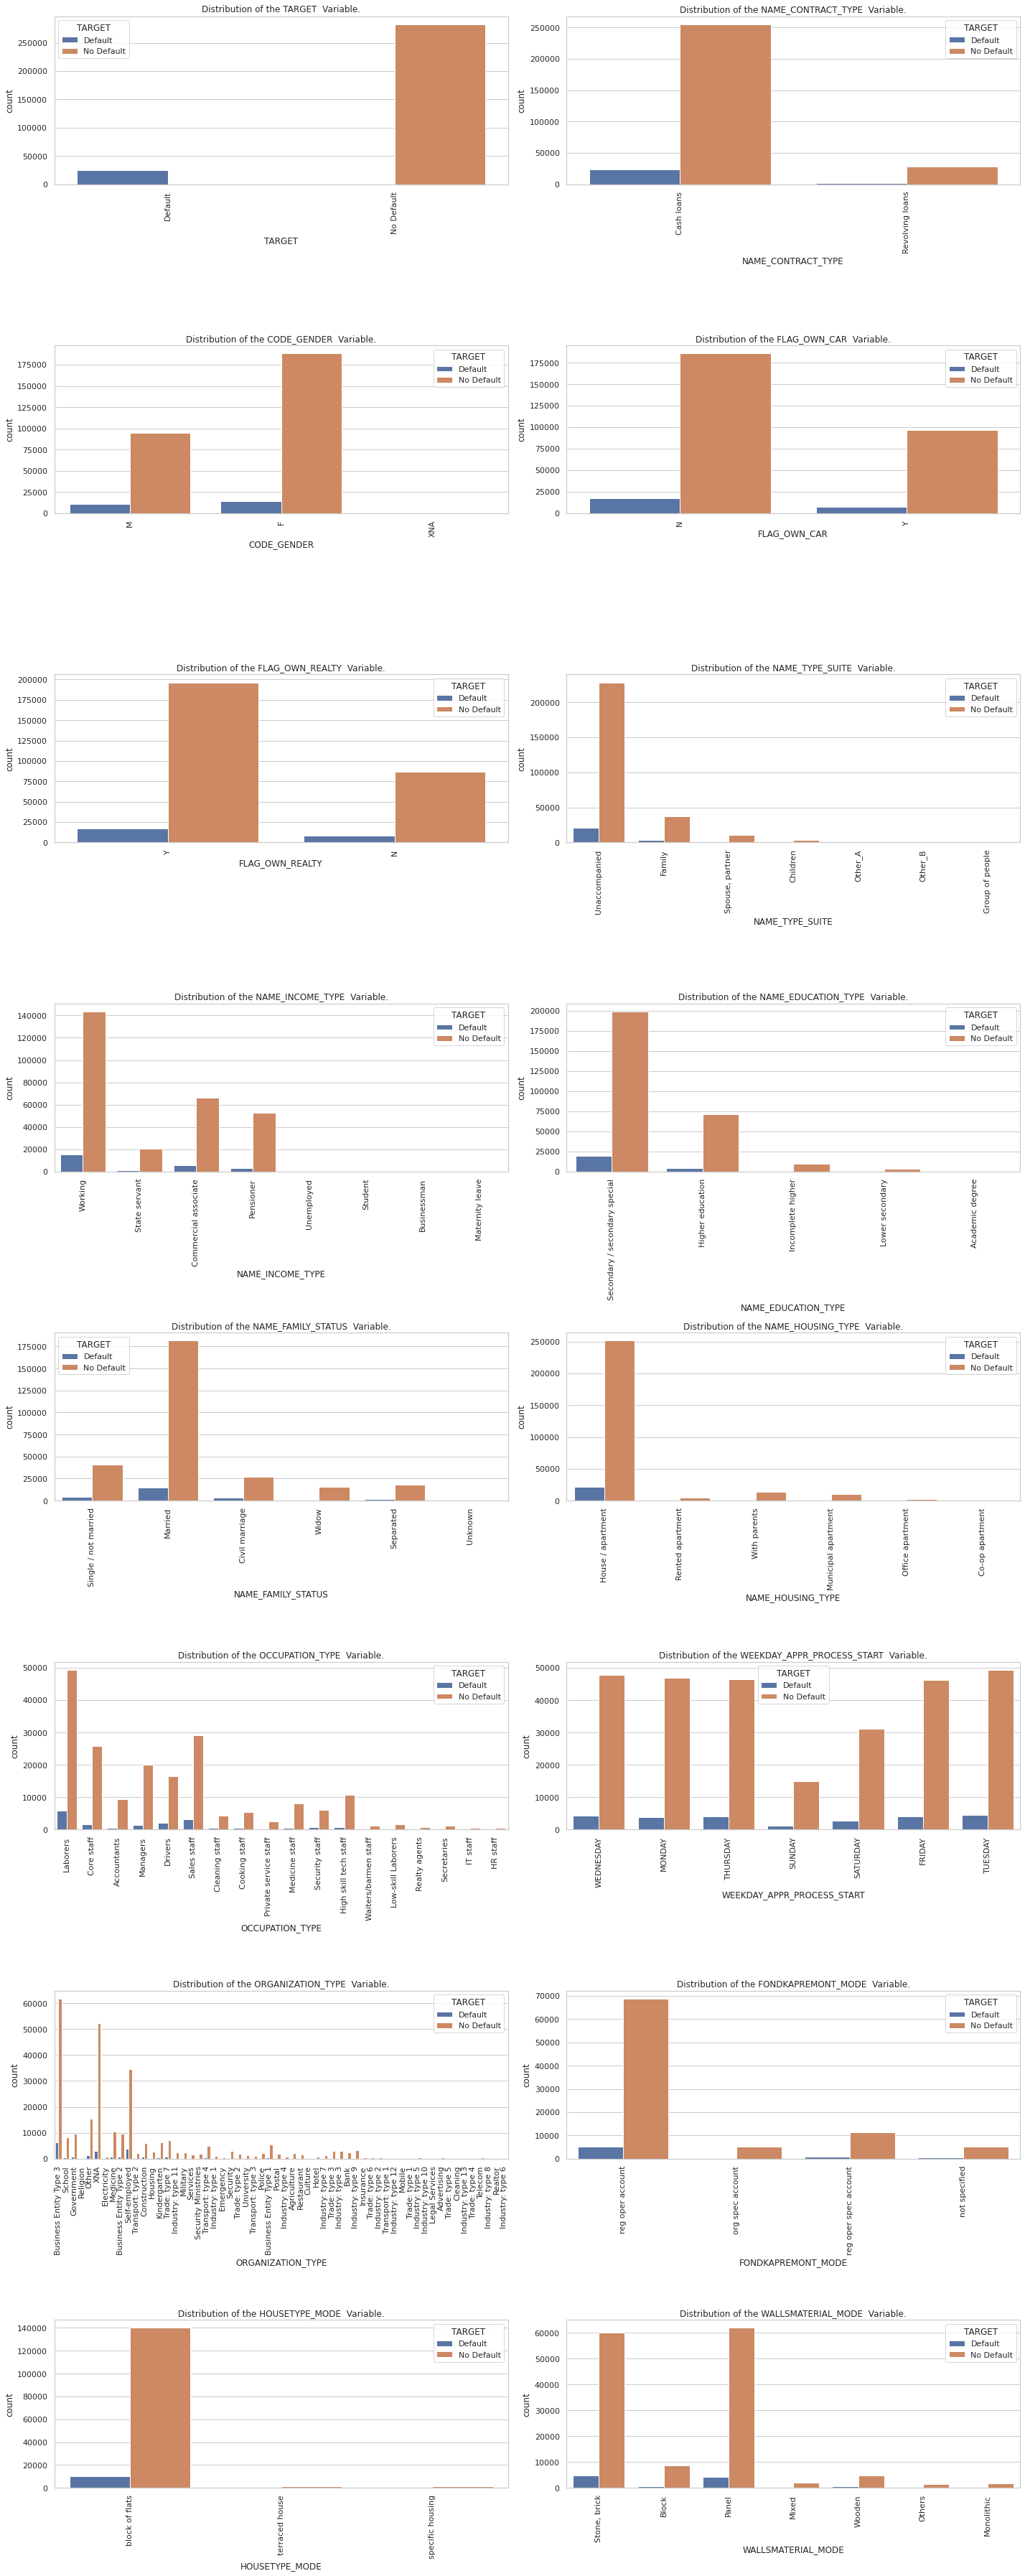

In [49]:
cat_features_plot(datasets, "application_train")

### Observation 6
-  Defaulters among the highly categorical features are seen in most, highlighting Organization Type, Family Type , Occupation Type & Education. 

In [50]:
def numerical_features_plot(datasets, df_name):
    df = datasets[df_name].copy()
    df['TARGET'].replace(0, "No Default", inplace=True)
    df['TARGET'].replace(1, "Default", inplace=True)

    numerical_col = []
    for col in df:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64' :
            numerical_col.append(col)
    print(numerical_col)
    print(len(numerical_col))
    
#     num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
#                    'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
    df2 = df[numerical_col]
    
    # Scatter-plot
    df2.fillna(0, inplace=True)
#    print('Numerical variables - Scatter-Matrix')
    grr = pd.plotting.scatter_matrix(df2.loc[:, df2.columns != 'TARGET'], c = datasets[df_name]['TARGET'], figsize=(15, 15), marker='.',
                        hist_kwds={'bins': 10}, s=60, alpha=.2)


    # Pair-plot
    df2['TARGET'].replace(0, "No Default", inplace=True)
    df2['TARGET'].replace(1, "Default", inplace=True)
#    print('Numerical variables - Pair-Plot')    
    num_sns = sns.pairplot(df2, hue="TARGET", markers=["s", "o"])

    #    num_sns.title("Numerical variables - Pair-Plot")



# numerical_features_plot(datasets, "application_train")


# correlation
# head(10)
# tail(10)
# numerical()
# create the scatter plot and pairwise plot

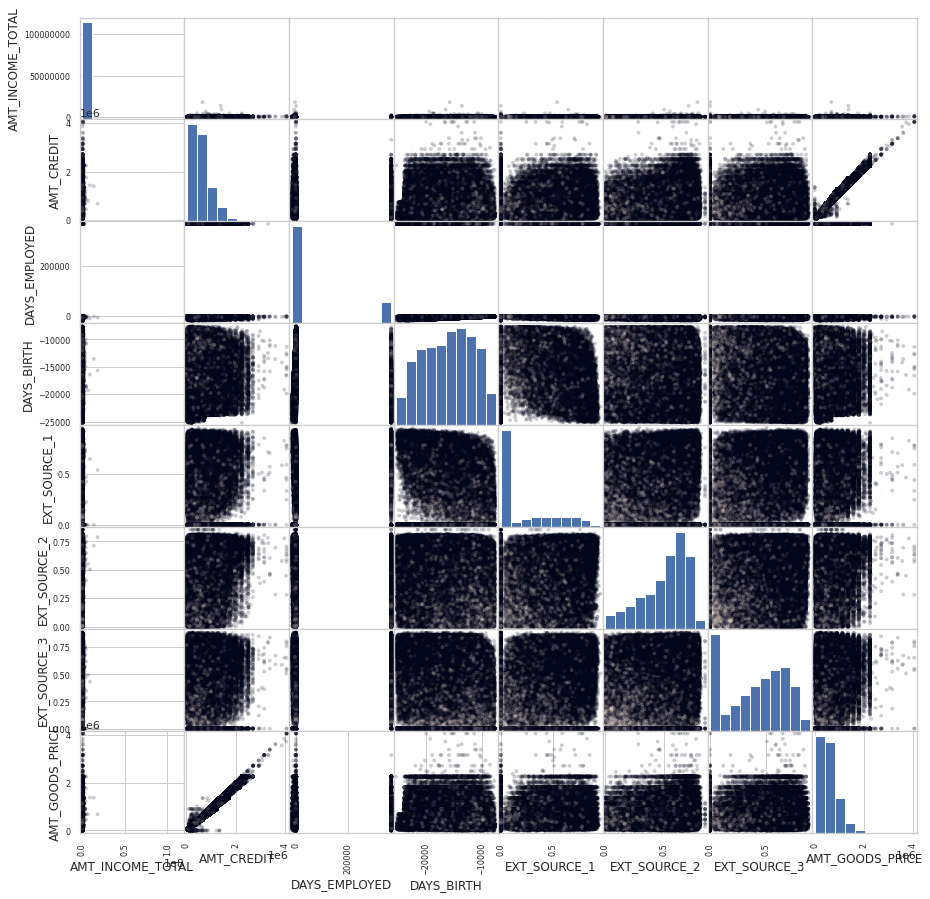

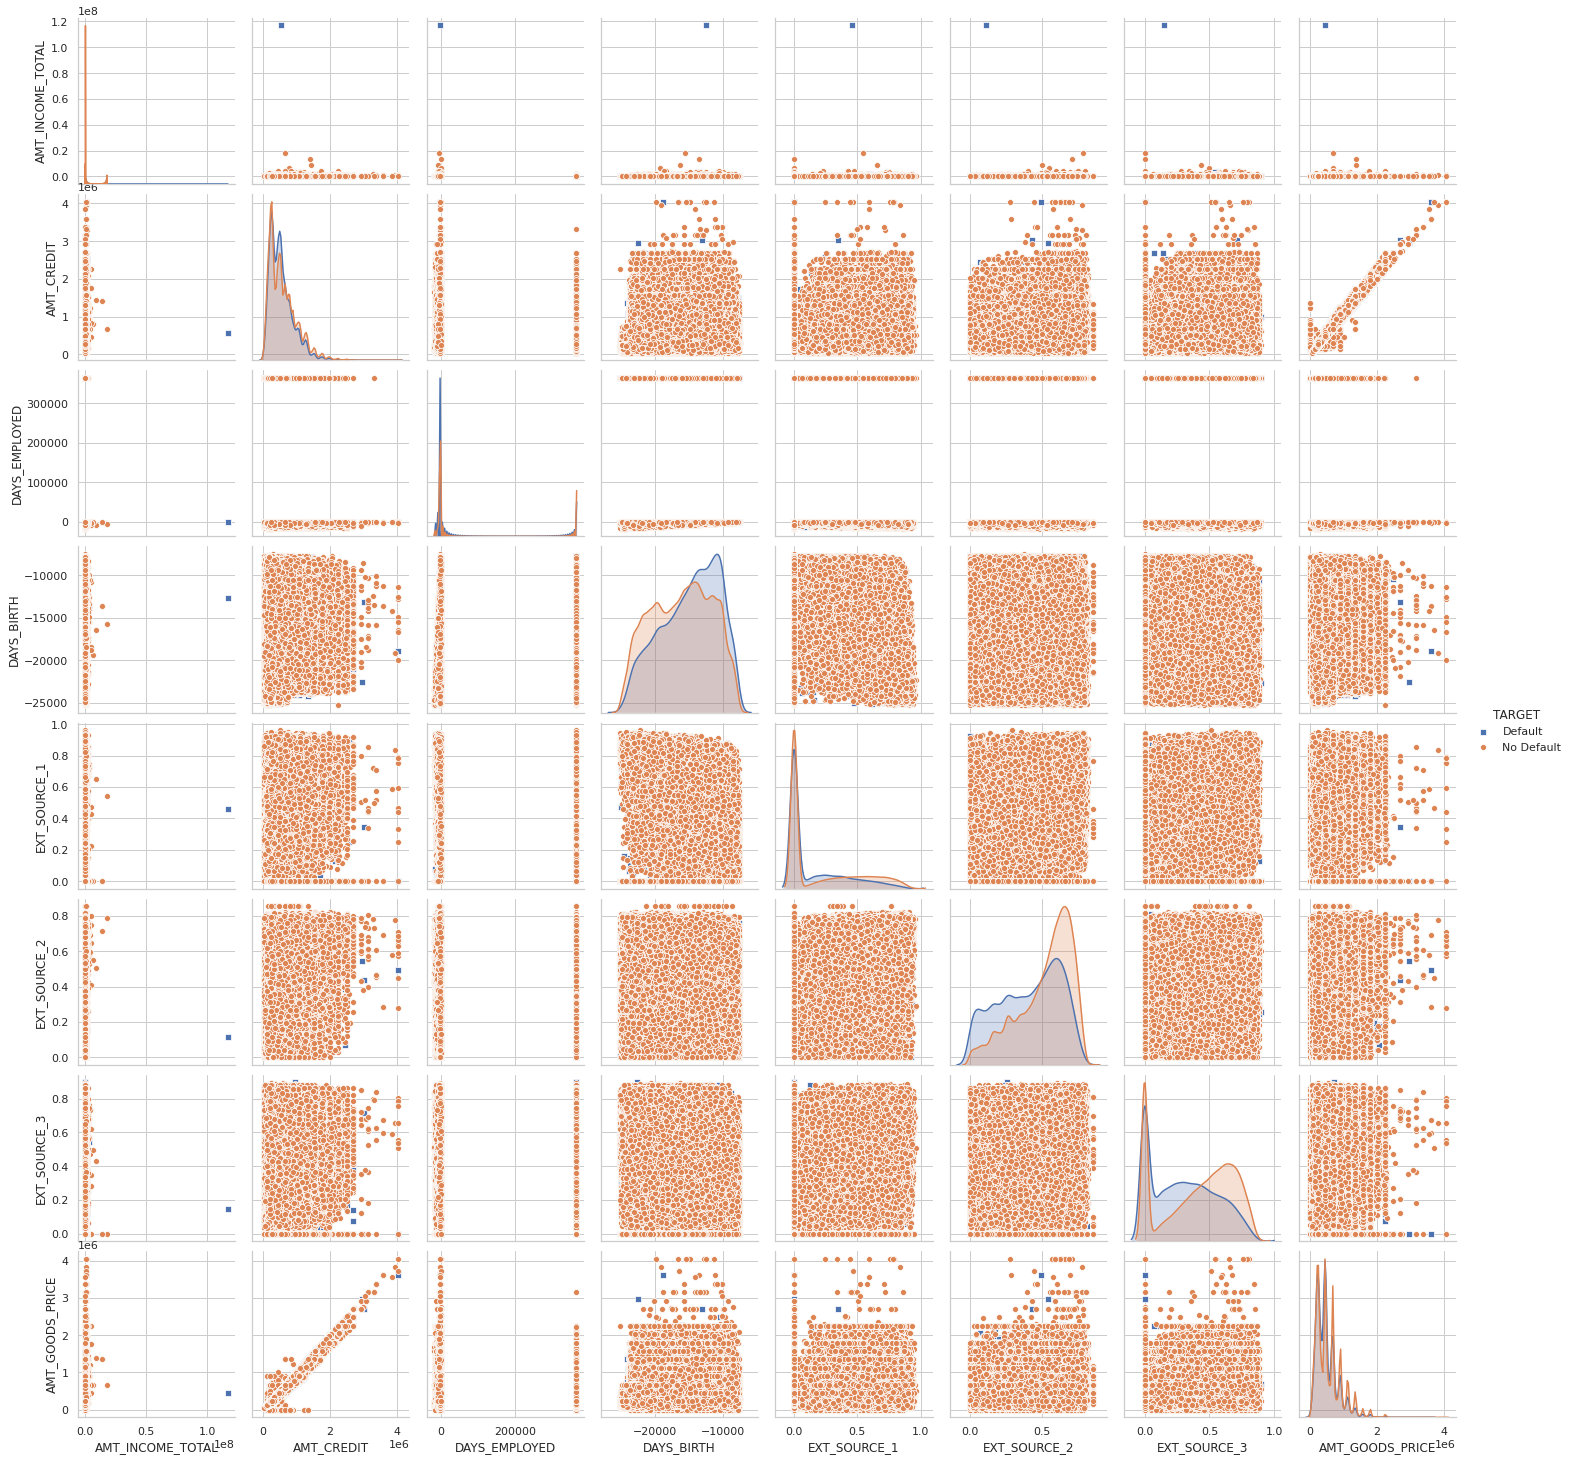

In [51]:
run = True
if run: 
    df_name = 'application_train'
    num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
                       'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
    df = datasets[df_name].copy()
    df2 = df[num_attribs]

    # Scatter-plot
    df2.fillna(0, inplace=True)
    #    print('Numerical variables - Scatter-Matrix')
    grr = pd.plotting.scatter_matrix(df2.loc[:, df2.columns != 'TARGET'], 
                                     c = datasets[df_name]['TARGET'], 
                                     figsize=(15, 15), marker='.',
                                hist_kwds={'bins': 10}, s=60, alpha=.2)


    # Pair-plot
    df2['TARGET'].replace(0, "No Default", inplace=True)
    df2['TARGET'].replace(1, "Default", inplace=True)
    #    print('Numerical variables - Pair-Plot')    
    num_sns = sns.pairplot(df2, hue="TARGET", markers=["s", "o"])

    #    num_sns.title("Numerical variables - Pair-Plot")

### Observation 7
**Correlation Map of Numerical Variables**

* Strong correlation between amount credit and amount goods price
* Strong correlation between days birth and days employed
* strong correlation between ext source 1 and days birth
* These might be good candidates to do some feature engineering in.

In [52]:
num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
               'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
df = datasets["application_train"].copy()
df2 = df[num_attribs]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

## Density Plots

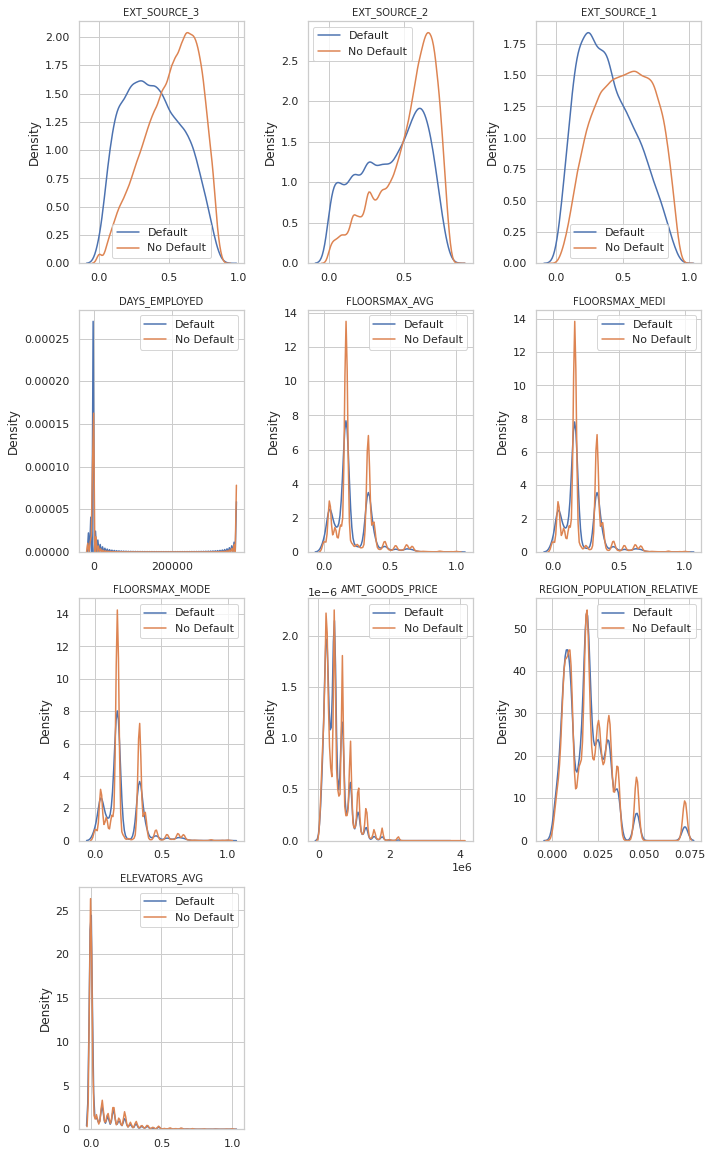

In [53]:
var_neg_corr = correlations.head(10).index.values
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(10,40))
for i,var in enumerate(var_neg_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    
    plt.subplot(numVar,3,i+1)
    plt.subplots_adjust(wspace=2)
    sns.kdeplot(dflt_var,label='Default')
    sns.kdeplot(dflt_non_var,label='No Default')
    #plt.xlabel(var)
    plt.ylabel('Density')
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

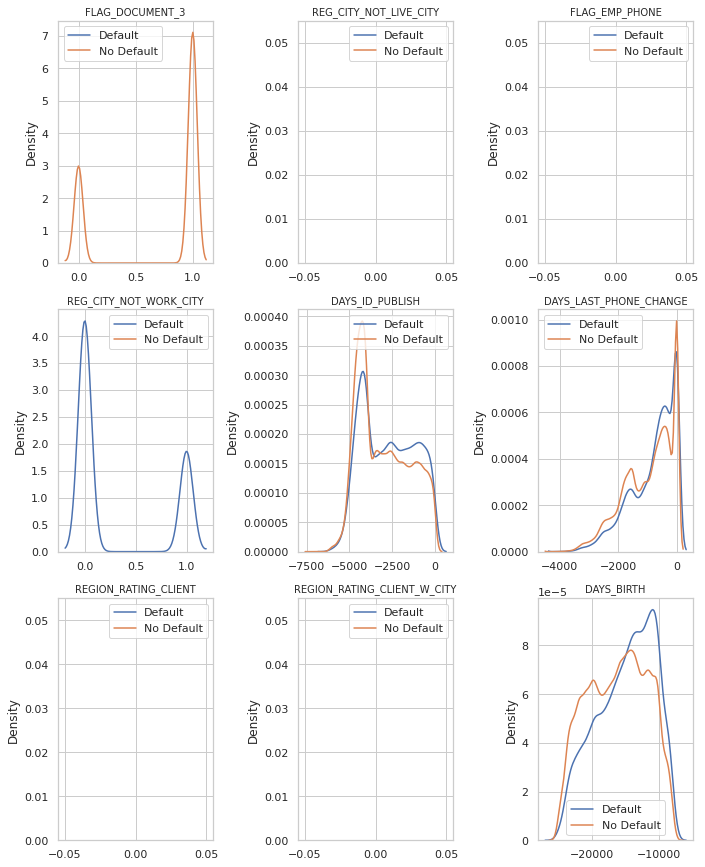

In [54]:
var_pos_corr = correlations.tail(10).index.values
numVar = var_pos_corr.shape[0]

plt.figure(figsize=(10,40))
for i,var in enumerate(var_pos_corr):    
    dflt_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==1,var]
    dflt_non_var = datasets["application_train"].loc[datasets["application_train"]['TARGET']==0,var]
    if var=='TARGET':
      pass
    else:
      plt.subplot(numVar,3,i+1)
      plt.subplots_adjust(wspace=2)
      sns.kdeplot(dflt_var,label='Default')
      sns.kdeplot(dflt_non_var,label='No Default')
      #plt.xlabel(var)
      plt.ylabel('Density')
      plt.title(var, fontsize = 10)
      plt.tight_layout()
plt.show()

### Observation 8

- We plot the KDEs of the most positively (negatively) correlated features with the TARGET. This is to evaluate whether there are any strange distributions between the default and do not default items.

- If the distributions for each feature are very different for default and do not default, this is good and we should look out for this. So we can see that EXT_SOURCE_3 has the most different distributions between default and no default.

## Observation 9
Overall View of Categorical values in Train & *Test*

For any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.


In [55]:
datasets['application_train'].select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [56]:
datasets['application_test'].select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               7
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

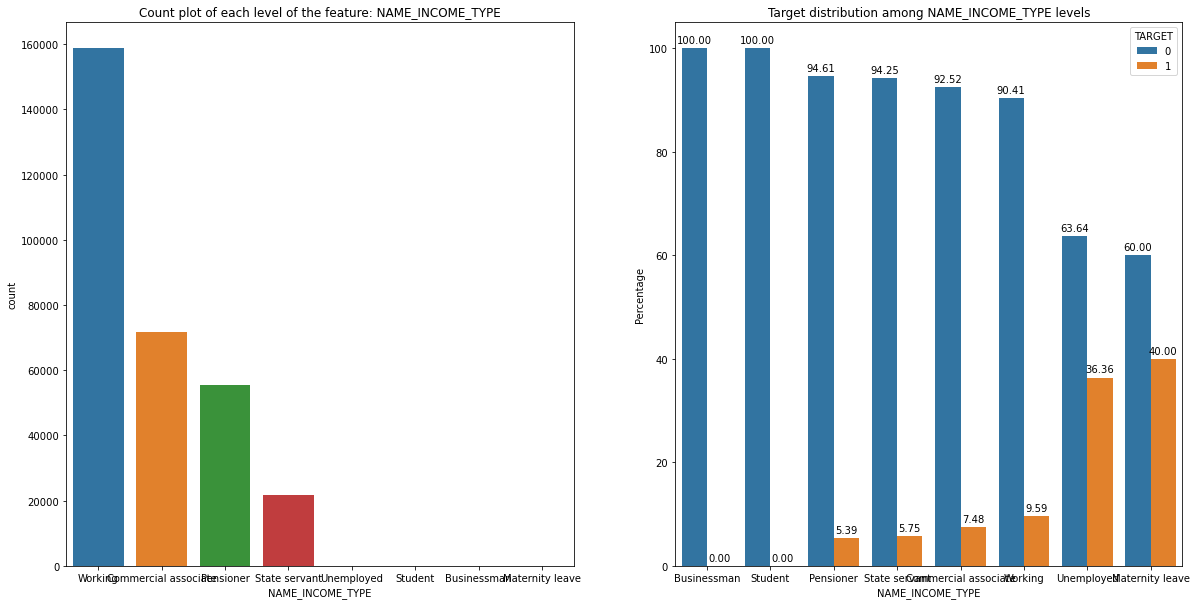

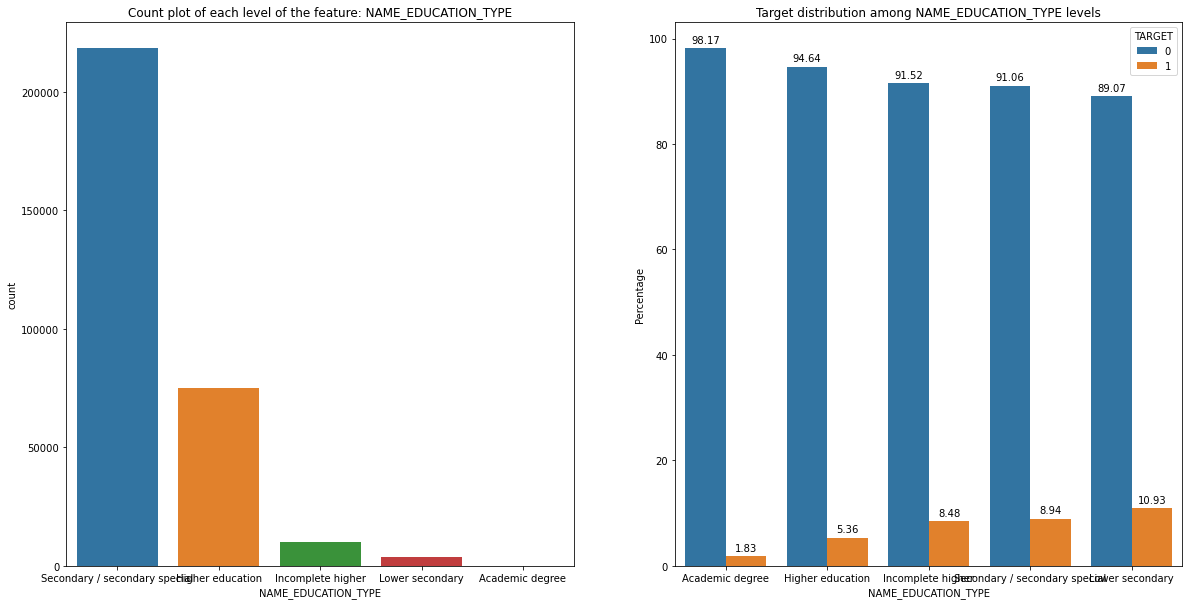

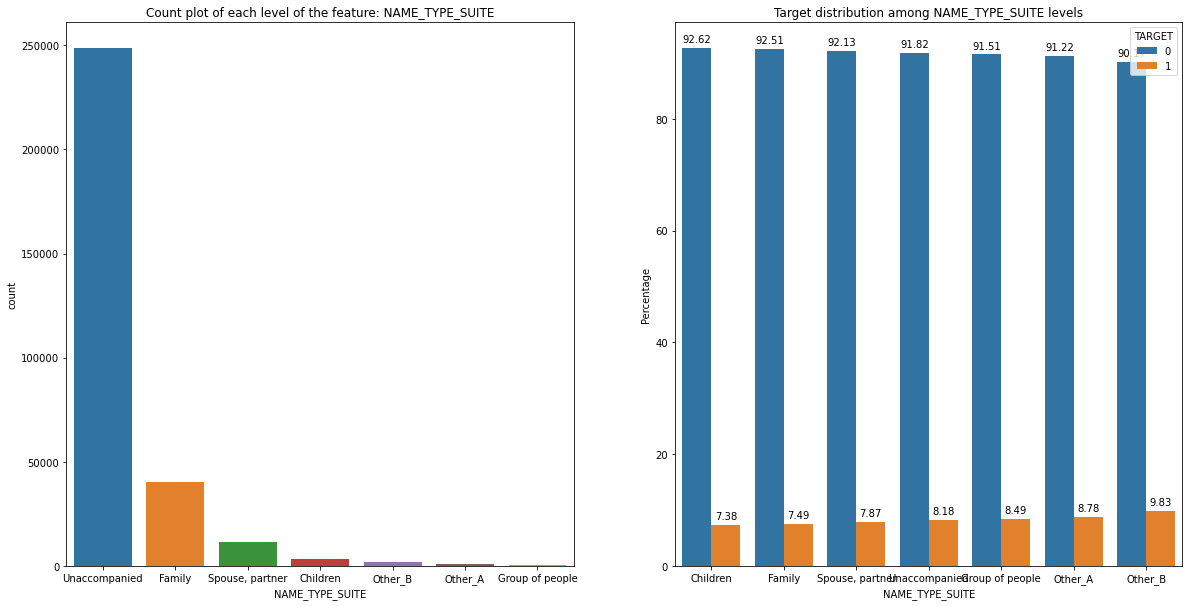

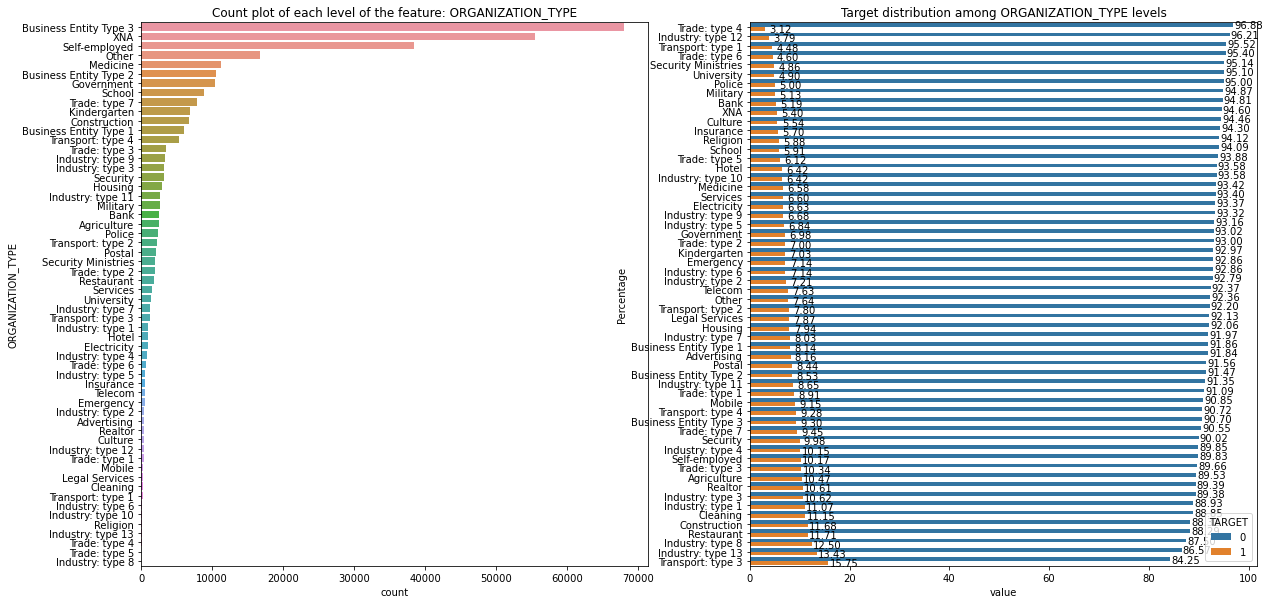

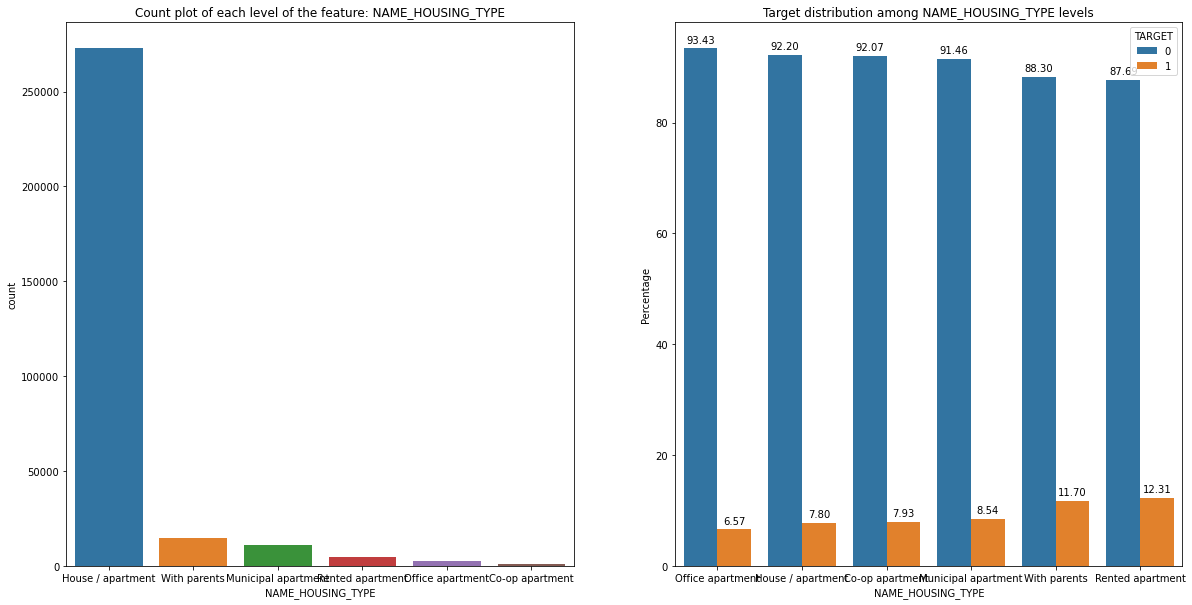

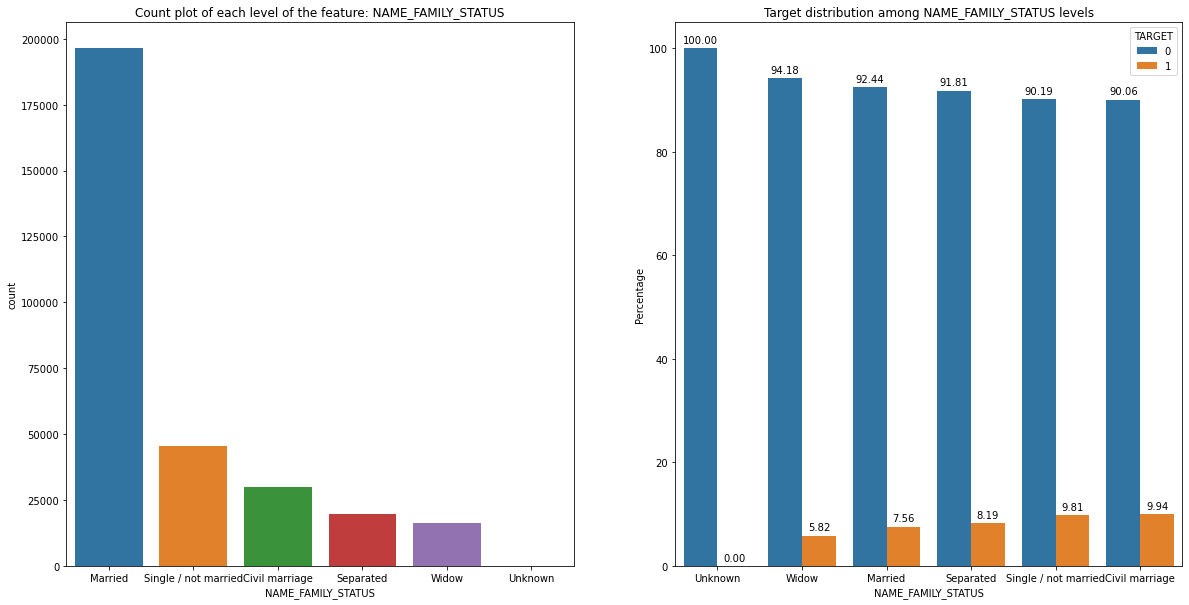

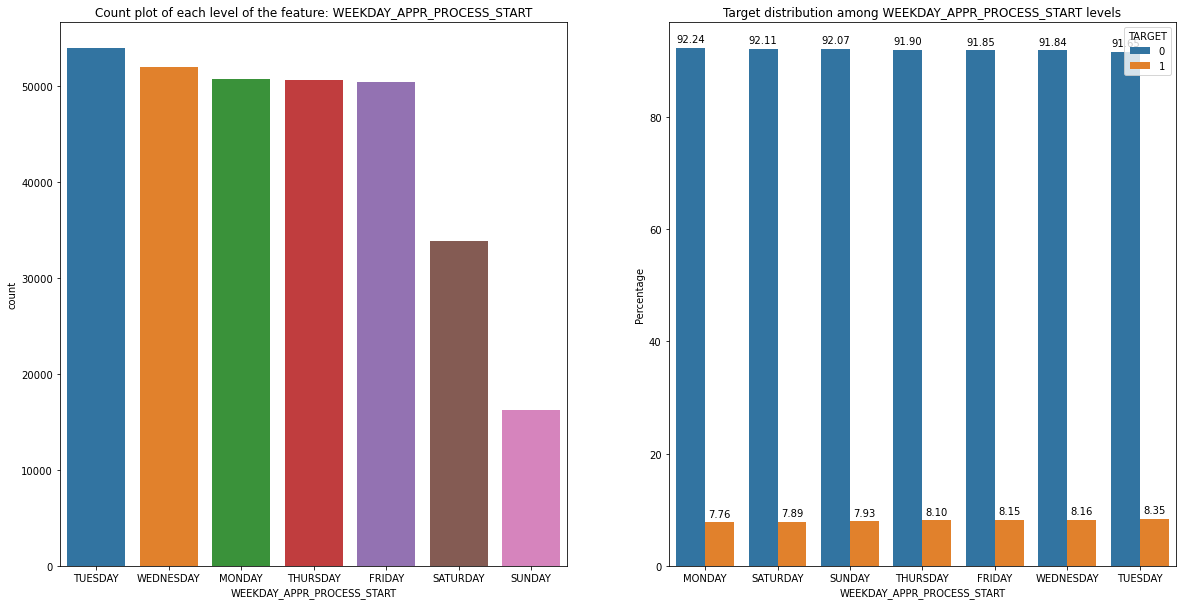

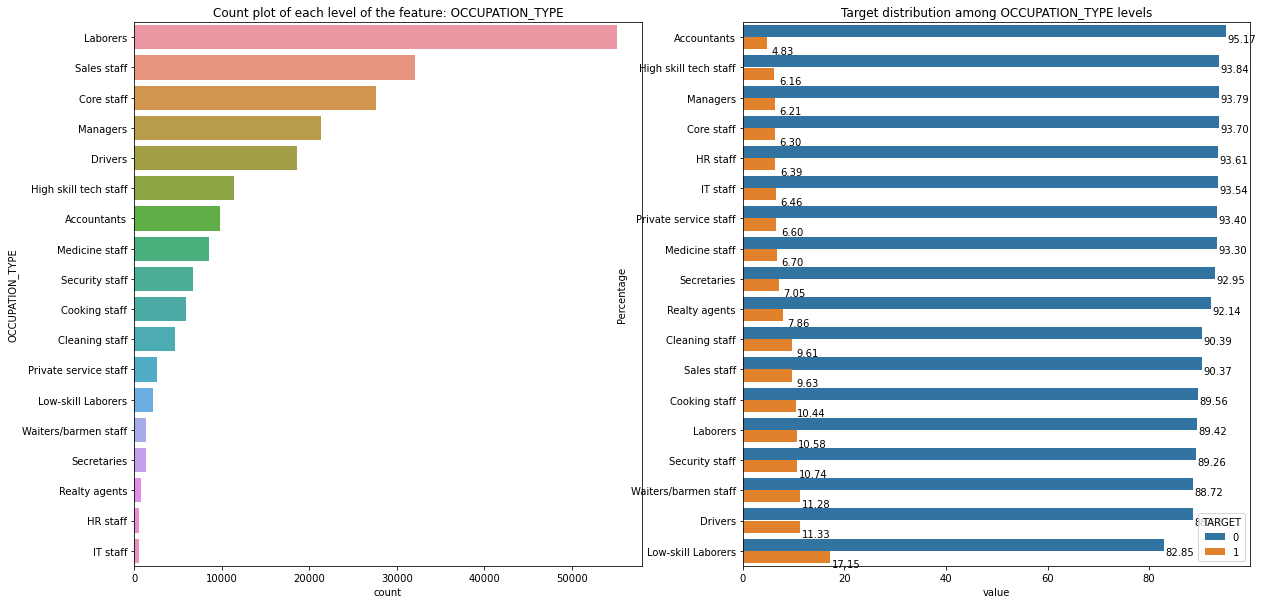

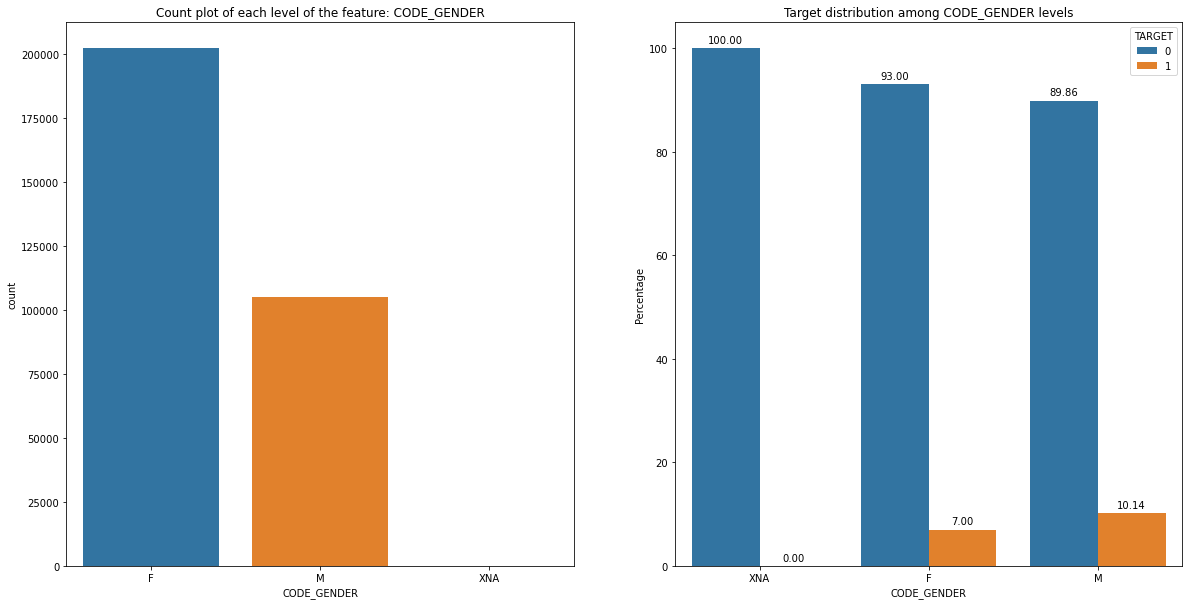

In [119]:
import time
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
import seaborn as sns
color = sns.color_palette()
import pickle
from scipy.cluster.hierarchy import dendrogram, linkage

warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 12, 8
np.random.seed(23)

nb_levels_sr = datasets['application_train'].nunique()
binary_features_lst = nb_levels_sr.loc[nb_levels_sr == 2].index.tolist()
categorical_features_lst = list(set(datasets['application_train'].select_dtypes(["object"]).columns.tolist()) - set(binary_features_lst))

for feature in categorical_features_lst:
    fig, ax = plt.subplots(1, 2, sharex = False, sharey = False, figsize = (20, 10))
    # Plot levels distribution
    if datasets['application_train'][feature].nunique() < 10:
        sns.countplot(x = datasets['application_train'][feature], ax = ax[0], order = datasets['application_train'][feature].value_counts().index.tolist())
    else:
        sns.countplot(y = datasets['application_train'][feature], ax = ax[0], order = datasets['application_train'][feature].value_counts().index.tolist())
    ax[0].set_title("Count plot of each level of the feature: " + feature)

    # Plot target distribution among levels
    table_df = pd.crosstab(datasets['application_train']["TARGET"], datasets['application_train'][feature], normalize = True)
    table_df = table_df.div(table_df.sum(axis = 0), axis = 1)
    table_df = pd.crosstab(datasets['application_train']["TARGET"], datasets['application_train'][feature], normalize = True)
    table_df = table_df.div(table_df.sum(axis = 0), axis = 1)
    table_df = table_df.transpose().reset_index()
    order_lst = table_df.sort_values(by = 1)[feature].tolist()
    table_df = table_df.melt(id_vars = [feature])
    if datasets['application_train'][feature].nunique() < 10:
        ax2 = sns.barplot(x = table_df[feature], y = table_df["value"] * 100, hue = table_df["TARGET"], ax = ax[1], order = order_lst)
        for p in ax2.patches:
            height = p.get_height()
            ax2.text(p.get_x() + p.get_width() / 2., height + 1, "{:1.2f}".format(height), ha = "center")
    else:
        ax2 = sns.barplot(x = table_df["value"] * 100, y = table_df[feature], hue = table_df["TARGET"], ax = ax[1], order = order_lst)
        for p in ax2.patches:
            width = p.get_width()
            ax2.text(width + 3.1, p.get_y() + p.get_height() / 2. + 0.35, "{:1.2f}".format(width), ha = "center")

    ax[1].set_title("Target distribution among " +  feature + " levels")
    ax[1].set_ylabel("Percentage")

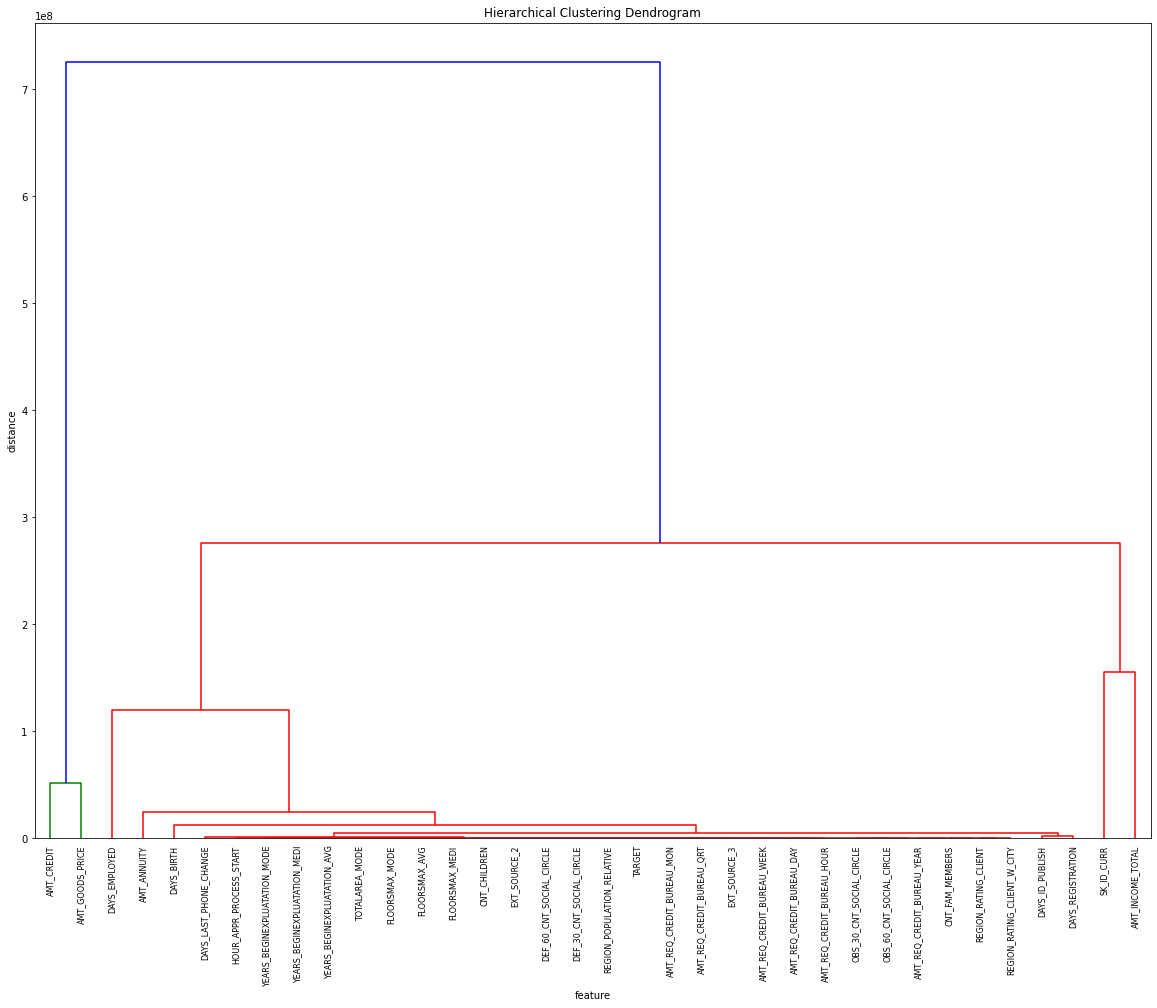

In [120]:
numerical_features_lst = list(set(datasets['application_train'].columns.tolist()) - set(categorical_features_lst) - set(binary_features_lst))
binary_features_lst = list(set(binary_features_lst) - {"TARGET"})

	# generate the linkage matrix
numerical_features_df = datasets['application_train'][numerical_features_lst + ["TARGET"]]
numerical_features_df.fillna(-1, inplace = True) # We need to impute missing values before creating the dendrogram
numerical_features_df = numerical_features_df.transpose()
Z = linkage(numerical_features_df, "ward")
plt.figure(figsize = (20, 15))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("feature")
plt.ylabel("distance")
dend = dendrogram(
    Z,
    leaf_rotation = 90.,  # rotates the x axis labels
    leaf_font_size = 8.,  # font size for the x axis labels
    labels = numerical_features_df.index.tolist()
)

## Observation 10
Imbalanced data

In [57]:
train_labels = datasets['application_train']['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = datasets['application_train'].align(datasets['application_test'], join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', datasets['application_train'].shape)
print('Testing Features shape: ', datasets['application_test'].shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


# Dataset questions
## Unique record for each SK_ID_CURR
Validating primary key for the datasets

In [58]:
datasets.keys()

dict_keys(['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [59]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [60]:
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [61]:
datasets["application_test"].shape

(48744, 121)

In [62]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [9]:
appsDF = datasets["previous_application"]

appsDF.shape

(1670214, 37)

In [64]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

In [66]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [67]:
# How many entries are there for each month?
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)


In [68]:
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications

101

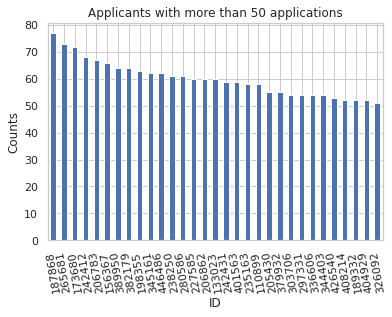

In [69]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=100)
plt.xlabel('ID')
plt.ylabel('Counts')
plt.title('Applicants with more than 50 applications')
plt.show()

The above visual indicates that are applicants with more than 50 applications in the dataset.

### Histogram of Number of previous applications for an ID

In [11]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

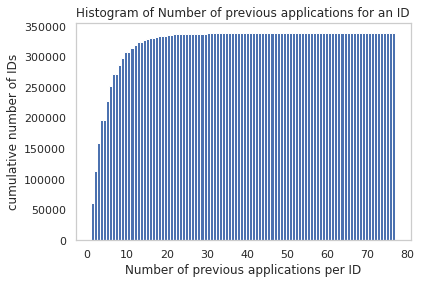

In [71]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [72]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


# Joining tertiary, secondary & primary tables

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## Feature Engineering for Primary , Secondary Tables & Tertiary

Observing Highly correlated features from all input datasets

In [73]:
def correlation_files_target(df_name):
  A = datasets["application_train"].copy()
  B = datasets[df_name].copy()
  correlation_matrix =  pd.concat([A.TARGET, B], axis=1).corr().filter(B.columns).filter(A.columns, axis=0)
  return correlation_matrix

In [10]:
df_name = "previous_application"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the previous_application against the Target is :


AMT_DOWN_PAYMENT             0.002496
CNT_PAYMENT                  0.002341
DAYS_LAST_DUE_1ST_VERSION    0.001908
AMT_CREDIT                   0.001833
AMT_APPLICATION              0.001689
AMT_GOODS_PRICE              0.001676
SK_ID_CURR                   0.001107
NFLAG_INSURED_ON_APPROVAL    0.000879
RATE_DOWN_PAYMENT            0.000850
RATE_INTEREST_PRIMARY        0.000542
SK_ID_PREV                   0.000362
DAYS_DECISION               -0.000482
AMT_ANNUITY                 -0.000492
DAYS_FIRST_DUE              -0.000943
SELLERPLACE_AREA            -0.000954
DAYS_TERMINATION            -0.001072
NFLAG_LAST_APPL_IN_DAY      -0.001256
DAYS_FIRST_DRAWING          -0.001293
DAYS_LAST_DUE               -0.001940
HOUR_APPR_PROCESS_START     -0.002285
RATE_INTEREST_PRIVILEGED    -0.026427
Name: TARGET, dtype: float64

In [11]:
df_name = "bureau"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau against the Target is :


DAYS_CREDIT_UPDATE        0.002159
DAYS_CREDIT_ENDDATE       0.002048
SK_ID_BUREAU              0.001550
DAYS_CREDIT               0.001443
AMT_CREDIT_SUM            0.000218
DAYS_ENDDATE_FACT         0.000203
AMT_ANNUITY               0.000189
AMT_CREDIT_MAX_OVERDUE   -0.000389
CNT_CREDIT_PROLONG       -0.000495
AMT_CREDIT_SUM_LIMIT     -0.000558
AMT_CREDIT_SUM_DEBT      -0.000946
SK_ID_CURR               -0.001070
AMT_CREDIT_SUM_OVERDUE   -0.001464
CREDIT_DAY_OVERDUE       -0.001815
Name: TARGET, dtype: float64

In [12]:
df_name = "bureau_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the bureau_balance against the Target is :


SK_ID_BUREAU      0.001223
MONTHS_BALANCE   -0.005262
Name: TARGET, dtype: float64

In [13]:
df_name = "credit_card_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the credit_card_balance against the Target is :


CNT_DRAWINGS_ATM_CURRENT      0.001908
AMT_DRAWINGS_ATM_CURRENT      0.001520
AMT_INST_MIN_REGULARITY       0.001435
SK_ID_CURR                    0.001086
AMT_CREDIT_LIMIT_ACTUAL       0.000515
AMT_BALANCE                   0.000448
SK_ID_PREV                    0.000446
AMT_RECIVABLE                 0.000412
AMT_TOTAL_RECEIVABLE          0.000407
AMT_RECEIVABLE_PRINCIPAL      0.000383
SK_DPD                        0.000092
SK_DPD_DEF                   -0.000201
CNT_INSTALMENT_MATURE_CUM    -0.000342
MONTHS_BALANCE               -0.000768
AMT_PAYMENT_CURRENT          -0.001129
AMT_PAYMENT_TOTAL_CURRENT    -0.001395
AMT_DRAWINGS_CURRENT         -0.001419
CNT_DRAWINGS_CURRENT         -0.001764
CNT_DRAWINGS_OTHER_CURRENT   -0.001833
CNT_DRAWINGS_POS_CURRENT     -0.002387
AMT_DRAWINGS_OTHER_CURRENT   -0.002672
AMT_DRAWINGS_POS_CURRENT     -0.003518
Name: TARGET, dtype: float64

In [14]:
df_name = "installments_payments"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")
correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the installments_payments against the Target is :


SK_ID_PREV                0.002891
NUM_INSTALMENT_VERSION    0.002511
NUM_INSTALMENT_NUMBER     0.000626
SK_ID_CURR               -0.000781
AMT_PAYMENT              -0.003512
DAYS_INSTALMENT          -0.003955
AMT_INSTALMENT           -0.003972
DAYS_ENTRY_PAYMENT       -0.004046
Name: TARGET, dtype: float64

In [16]:
df_name = "POS_CASH_balance"
correlation_matrix = correlation_files_target(df_name)
print(f"Correlation of the {df_name} against the Target is :")

correlation_matrix.T.TARGET.sort_values(ascending= False)

Correlation of the POS_CASH_balance against the Target is :


CNT_INSTALMENT_FUTURE    0.002811
MONTHS_BALANCE           0.002775
SK_ID_PREV               0.002164
CNT_INSTALMENT           0.001434
SK_DPD                   0.000050
SK_ID_CURR              -0.000136
SK_DPD_DEF              -0.001362
Name: TARGET, dtype: float64

## Feature Aggregator Helper Function
<a id='newfeature'></a> 

Functions required to perform feature aggregations are listed below

In [10]:
class FeaturesAggregator(BaseEstimator, TransformerMixin):
    def __init__(self, file_name=None, features=None, funcs=None, primary_id = None): # no *args or **kargs
        self.file_name = file_name
        self.features = features
        self.funcs = funcs
        self.primary_id = primary_id
        self.agg_op_features = {}
        for f in self.features:
            temp = {f"{file_name}_{f}_{func}":func for func in self.funcs}
            self.agg_op_features[f]=[(k, v) for k, v in temp.items()]
        print(self.agg_op_features)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby([self.primary_id]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=[self.primary_id])
        return result # return dataframe with the join key "SK_ID_CURR"

In [11]:
class engineer_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):

# FROM APPLICATION
        # ADD INCOME CREDIT PERCENTAGE
        X['ef_INCOME_CREDIT_PERCENT'] = (
            X.AMT_INCOME_TOTAL / X.AMT_CREDIT).replace(np.inf, 0)
    
        # ADD INCOME PER FAMILY MEMBER
        X['ef_FAM_MEMBER_INCOME'] = (
            X.AMT_INCOME_TOTAL / X.CNT_FAM_MEMBERS).replace(np.inf, 0)
    
        # ADD ANNUITY AS PERCENTAGE OF ANNUAL INCOME
        X['ef_ANN_INCOME_PERCENT'] = (
            X.AMT_ANNUITY / X.AMT_INCOME_TOTAL).replace(np.inf, 0)

        return X

In [12]:
# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values) 

In [13]:
import gc

Creating a base copy of the data

In [14]:
appsTrainDF = datasets['application_train']
appsTestDF = datasets['application_test']
prevAppsDF = datasets["previous_application"] #prev app
bureauDF = datasets["bureau"] #bureau app

bureaubalDF = datasets['bureau_balance']
ccbalDF = datasets["credit_card_balance"] #prev app


installmentspaymentsDF = datasets["installments_payments"] #bureau app
pos_cash_bal_DF = datasets["POS_CASH_balance"] #POS_CASH_balance app

Validating the shapes

In [15]:
appsTrainDF.shape

(307511, 122)

In [21]:
bureaubalDF.shape

(27299925, 3)

In [22]:
ccbalDF.shape


(3840312, 23)

In [23]:
installmentspaymentsDF.shape


(13605401, 8)

In [24]:
pos_cash_bal_DF.shape

(10001358, 8)

## Tertiary Datasets

The tertiary datasets or tables refer to bureau_balance, POS_CASH_balance, instalments_payments, credit_card_balance

In [15]:
tertiaty_datasets=['bureau_balance','credit_card_balance','installments_payments','POS_CASH_balance']

###  Third Tier Custom - Domain Knowledge based features

Any domain based features that will aid in a better model have been included here. In the table credit card balance the payment difference can be value to predict risk.

In [16]:
 # Difference between the monthly amount paid - the expected monthly amount
ccbalDF['payment_diff_curr_pay'] = ccbalDF['AMT_PAYMENT_TOTAL_CURRENT'] - ccbalDF['AMT_PAYMENT_CURRENT']
ccbalDF['payment_diff_min_pay'] = ccbalDF['AMT_PAYMENT_TOTAL_CURRENT'] - ccbalDF['AMT_INST_MIN_REGULARITY']
 # Difference between the monthly amount paid - the minimum monthly amount


###  Third Tier datasets Numerical feature aggregation

In [17]:
# function to get the numerical features
def get_numattribs(ds_name):
  num_attribs=(datasets[ds_name].select_dtypes(include=['int64', 'float64']).columns.tolist())
  print()
  print('Numerical attributes for',ds_name,' : ',num_attribs)
  print()
  return num_attribs

Feature aggregation for the tertiary datasets

In [18]:
# Aggregate across old and new features
# agg_funcs = ['min', 'max', 'mean', 'count', 'sum']
agg_funcs = ['min', 'max']

primary_id1 = "SK_ID_PREV"
primary_id2 = "SK_ID_BUREAU"


posBal_features = ['MONTHS_BALANCE','CNT_INSTALMENT','CNT_INSTALMENT_FUTURE']
instalPay_features = ['DAYS_INSTALMENT','AMT_INSTALMENT']
ccBal_features = ['AMT_BALANCE','AMT_DRAWINGS_CURRENT','payment_diff_curr_pay','payment_diff_min_pay']
burBal_features = ['MONTHS_BALANCE']


prevApps_features = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY'] # NO MISSING VALUES
bureau_features = ['AMT_CREDIT_SUM']

cc_features_pipeline = Pipeline([
                                 
    ('credit_card_num_aggregator', FeaturesAggregator('credit_card_balance',ccBal_features , agg_funcs, primary_id1)), 
    ])

installment_features_pipeline = Pipeline([
    ('installment_num_aggregator', FeaturesAggregator('installments_payments',instalPay_features, agg_funcs, primary_id1)), 
    ])

POS_CASH_balance_pipeline = Pipeline([
    ('POS_CASH_balance', FeaturesAggregator('POS_CASH_balance' ,posBal_features , agg_funcs, primary_id1)), 
    ])

bureau_balance_feature_pipeline = Pipeline([
    ('bureau_balance', FeaturesAggregator('bureau_balance' ,burBal_features , agg_funcs, primary_id2)), 
    ])

{'AMT_BALANCE': [('credit_card_balance_AMT_BALANCE_min', 'min'), ('credit_card_balance_AMT_BALANCE_max', 'max')], 'AMT_DRAWINGS_CURRENT': [('credit_card_balance_AMT_DRAWINGS_CURRENT_min', 'min'), ('credit_card_balance_AMT_DRAWINGS_CURRENT_max', 'max')], 'payment_diff_curr_pay': [('credit_card_balance_payment_diff_curr_pay_min', 'min'), ('credit_card_balance_payment_diff_curr_pay_max', 'max')], 'payment_diff_min_pay': [('credit_card_balance_payment_diff_min_pay_min', 'min'), ('credit_card_balance_payment_diff_min_pay_max', 'max')]}
{'DAYS_INSTALMENT': [('installments_payments_DAYS_INSTALMENT_min', 'min'), ('installments_payments_DAYS_INSTALMENT_max', 'max')], 'AMT_INSTALMENT': [('installments_payments_AMT_INSTALMENT_min', 'min'), ('installments_payments_AMT_INSTALMENT_max', 'max')]}
{'MONTHS_BALANCE': [('POS_CASH_balance_MONTHS_BALANCE_min', 'min'), ('POS_CASH_balance_MONTHS_BALANCE_max', 'max')], 'CNT_INSTALMENT': [('POS_CASH_balance_CNT_INSTALMENT_min', 'min'), ('POS_CASH_balance_CNT_

### Step 1: Merge Tier 3 with Tier 2

In [19]:
bureaubal_aggregated = bureau_balance_feature_pipeline.fit_transform(bureaubalDF)
ccblance_aggregated = cc_features_pipeline.fit_transform(ccbalDF)
installments_pmnts_aggregated = installment_features_pipeline.fit_transform(installmentspaymentsDF)
pos_cash_bal_aggregated = POS_CASH_balance_pipeline.fit_transform(pos_cash_bal_DF)

Merging the aggregated features for pos_cash_bal , installments_pmnts , credit card balance with Previous application

In [20]:
prevApps_ThirdTierMerge = True

posBal_join_feature = 'SK_ID_PREV'
prevApps_join_feature = 'SK_ID_CURR'
bureau_join_feature = 'SK_ID_CURR'
instalPay_join_feature = 'SK_ID_PREV'
ccBal_join_feature = 'SK_ID_PREV'
burBal_join_feature = 'SK_ID_BUREAU'


if prevApps_ThirdTierMerge:
  # Merge Datasets
  prevAppsDF = prevAppsDF.merge(pos_cash_bal_aggregated, how='left', on=posBal_join_feature)
  prevAppsDF = prevAppsDF.merge(installments_pmnts_aggregated, how='left', on=instalPay_join_feature)
  prevAppsDF = prevAppsDF.merge(ccblance_aggregated, how='left', on=ccBal_join_feature)

  
  prevApps_features.extend(installments_pmnts_aggregated.columns[1:])
  prevApps_features.extend(ccblance_aggregated.columns[1:])
  prevApps_features.extend(pos_cash_bal_aggregated.columns[1:])



Merging the aggregated features the dataset Bureau Balance with Bureau as per the data model. 

In [21]:
bureau_ThirdTierMerge = True

if bureau_ThirdTierMerge:
  # Merge Dataset
  bureauDF = bureauDF.merge(bureaubal_aggregated, how='left', on=burBal_join_feature)

  # Add Created Features
  bureau_features.extend(bureaubal_aggregated.columns[1:])

## Secondary Datasets

###  Second Tier datasets Numerical feature aggregation

In [22]:
#agg_funcs = ['min', 'max', 'mean', 'count', 'sum']
agg_funcs = ['count', 'max', 'min', 'sum']
primary_id1 = "SK_ID_CURR"


prevApps_feature_pipeline = Pipeline([
    ('prevApps', FeaturesAggregator('prevApps' ,prevApps_features , agg_funcs, primary_id1)), 
    ])

bureau_feature_pipeline = Pipeline([
    ('bureau', FeaturesAggregator('bureau' ,bureau_features , agg_funcs, primary_id1)), 
    ])


{'AMT_APPLICATION': [('prevApps_AMT_APPLICATION_count', 'count'), ('prevApps_AMT_APPLICATION_max', 'max'), ('prevApps_AMT_APPLICATION_min', 'min'), ('prevApps_AMT_APPLICATION_sum', 'sum')], 'AMT_CREDIT': [('prevApps_AMT_CREDIT_count', 'count'), ('prevApps_AMT_CREDIT_max', 'max'), ('prevApps_AMT_CREDIT_min', 'min'), ('prevApps_AMT_CREDIT_sum', 'sum')], 'AMT_ANNUITY': [('prevApps_AMT_ANNUITY_count', 'count'), ('prevApps_AMT_ANNUITY_max', 'max'), ('prevApps_AMT_ANNUITY_min', 'min'), ('prevApps_AMT_ANNUITY_sum', 'sum')], 'installments_payments_DAYS_INSTALMENT_min': [('prevApps_installments_payments_DAYS_INSTALMENT_min_count', 'count'), ('prevApps_installments_payments_DAYS_INSTALMENT_min_max', 'max'), ('prevApps_installments_payments_DAYS_INSTALMENT_min_min', 'min'), ('prevApps_installments_payments_DAYS_INSTALMENT_min_sum', 'sum')], 'installments_payments_DAYS_INSTALMENT_max': [('prevApps_installments_payments_DAYS_INSTALMENT_max_count', 'count'), ('prevApps_installments_payments_DAYS_INS

In [23]:
prevApps_aggregated = prevApps_feature_pipeline.fit_transform(prevAppsDF)
bureau_aggregated = bureau_feature_pipeline.fit_transform(bureauDF)

In [24]:
prevApps_aggregated.columns

Index(['SK_ID_CURR', 'prevApps_AMT_APPLICATION_count',
       'prevApps_AMT_APPLICATION_max', 'prevApps_AMT_APPLICATION_min',
       'prevApps_AMT_APPLICATION_sum', 'prevApps_AMT_CREDIT_count',
       'prevApps_AMT_CREDIT_max', 'prevApps_AMT_CREDIT_min',
       'prevApps_AMT_CREDIT_sum', 'prevApps_AMT_ANNUITY_count',
       'prevApps_AMT_ANNUITY_max', 'prevApps_AMT_ANNUITY_min',
       'prevApps_AMT_ANNUITY_sum',
       'prevApps_installments_payments_DAYS_INSTALMENT_min_count',
       'prevApps_installments_payments_DAYS_INSTALMENT_min_max',
       'prevApps_installments_payments_DAYS_INSTALMENT_min_min',
       'prevApps_installments_payments_DAYS_INSTALMENT_min_sum',
       'prevApps_installments_payments_DAYS_INSTALMENT_max_count',
       'prevApps_installments_payments_DAYS_INSTALMENT_max_max',
       'prevApps_installments_payments_DAYS_INSTALMENT_max_min',
       'prevApps_installments_payments_DAYS_INSTALMENT_max_sum',
       'prevApps_installments_payments_AMT_INSTALMENT_min_c

###  Second Tier Custom - Domain Knowledge based features


In [25]:
prevApps_aggregated['prevApps_AMT_APPLICATION_avg'] = (
   prevApps_aggregated['prevApps_AMT_APPLICATION_sum'] / prevApps_aggregated['prevApps_AMT_APPLICATION_count'] ).replace(np.inf, 0) 

prevApps_aggregated['prevApps_AMT_APPLICATION_range'] = (
   prevApps_aggregated['prevApps_AMT_APPLICATION_max'] - prevApps_aggregated['prevApps_AMT_APPLICATION_min'] ).replace(np.inf, 0) 


bureau_aggregated['bureau_AMT_CREDIT_SUM_avg'] = (
   bureau_aggregated['bureau_AMT_CREDIT_SUM_sum'] / bureau_aggregated['bureau_AMT_CREDIT_SUM_count'] ).replace(np.inf, 0) 

bureau_aggregated['bureau_AMT_APPLICATION_range'] = (
   bureau_aggregated['bureau_AMT_CREDIT_SUM_max'] - bureau_aggregated['bureau_AMT_CREDIT_SUM_min'] ).replace(np.inf, 0) 

## Primary Datasets

### Merge Aggregated Dataset With Tier 1 Tables - Train and Test

Prior to merging with the Primary data, we will be dropping columns with more than 50% missing values because they are not reliable parameters.

In [26]:
appsTrainDF = datasets["application_train"]
X_kaggle_test = datasets["application_test"]

df_missing = pd.DataFrame(np.round((appsTrainDF.isna().sum()/ appsTrainDF.shape[0]) * 100, 2), columns=['Percent'], index= appsTrainDF.columns)
df_missing_50_cols = df_missing[df_missing.Percent >= 50].index

# Drop 
appsTrainDF.drop(columns=df_missing_50_cols, inplace=True)
X_kaggle_test.drop(columns=df_missing_50_cols, inplace=True)

In [27]:
merge_all_data = True

if merge_all_data:
# 1. Join/Merge in prevApps Data
    appsTrainDF = appsTrainDF.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

# 2. Join/Merge in bureau Data
    appsTrainDF = appsTrainDF.merge(bureau_aggregated, how='left', on="SK_ID_CURR")
    X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how='left', on="SK_ID_CURR")

In [30]:
appsTrainDF.shape

(307511, 181)

In [31]:
X_kaggle_test.shape

(48744, 180)

### Custom - Domain Knowledge baced Features

In [ ]:
# Training dataset
appsTrainDF['DAYS_EMPLOYED_PCT'] = appsTrainDF['DAYS_EMPLOYED'] / appsTrainDF['DAYS_BIRTH']
appsTrainDF['CREDIT_INCOME_PCT'] = appsTrainDF['AMT_CREDIT'] / appsTrainDF['AMT_INCOME_TOTAL']
appsTrainDF['ANNUITY_INCOME_PCT'] = appsTrainDF['AMT_ANNUITY'] / appsTrainDF['AMT_INCOME_TOTAL']
appsTrainDF['CREDIT_TERM'] = appsTrainDF['AMT_ANNUITY'] / appsTrainDF['AMT_CREDIT']

# Test dataset
X_kaggle_test['DAYS_EMPLOYED_PCT'] = X_kaggle_test['DAYS_EMPLOYED'] / X_kaggle_test['DAYS_BIRTH']
X_kaggle_test['CREDIT_INCOME_PCT'] = X_kaggle_test['AMT_CREDIT'] / X_kaggle_test['AMT_INCOME_TOTAL']
X_kaggle_test['ANNUITY_INCOME_PCT'] = X_kaggle_test['AMT_ANNUITY'] / X_kaggle_test['AMT_INCOME_TOTAL']
X_kaggle_test['CREDIT_TERM'] = X_kaggle_test['AMT_ANNUITY'] / X_kaggle_test['AMT_CREDIT']

### Handle remaining missing values and null values
Fill NA values with 0, Execute Fillna(0)

In [28]:
appsTrainDF[prevApps_aggregated.columns] = appsTrainDF[prevApps_aggregated.columns].fillna(0)
X_kaggle_test[prevApps_aggregated.columns] = X_kaggle_test[prevApps_aggregated.columns].fillna(0)

appsTrainDF[bureau_aggregated.columns] = appsTrainDF[bureau_aggregated.columns].fillna(0)
X_kaggle_test[bureau_aggregated.columns] = X_kaggle_test[bureau_aggregated.columns].fillna(0)

In [34]:
appsTrainDF.shape

(307511, 181)

In [35]:
X_kaggle_test.shape

(48744, 180)

## Polynomial Features on numeric values of Application Train

One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables EXT_SOURCE_1^2 and EXT_SOURCE_2^2 and also variables such as EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, and so on. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Interaction terms are commonly used in statistical models to capture the effects of multiple variables.

In [36]:
# Create aggregate features (via pipeline)
class polynomialFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, features=None, degree=4): # no *args or **kargs
        self.features = features
        self.polynomial_degree = degree
        

    def fit(self, X, y=None):
        return self
    
    def fit_transform(self, X, y=None):
        # print("X type from fit_transform",type(X))
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
        data = X[self.features]
      
        data_imputed = imp_mean.fit_transform(data)
        data = pd.DataFrame(data_imputed, columns=self.features) 
        # print("imputed data : /n", data)
        poly_pipeline = Pipeline([
                                 ("poly_transformer",PolynomialFeatures(degree = self.polynomial_degree))
                                 ])
        poly_n_features = poly_pipeline.fit_transform(data, y)
        poly_n_feature_names = poly_pipeline.get_params().get('poly_transformer').get_feature_names()
        poly_df_train = pd.DataFrame(poly_n_features, columns= poly_n_feature_names)

        return poly_df_train # return dataframe with polynomial features

 We can use a degree of 4 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into problems with overfitting).

In [38]:
poly_features = [ 'EXT_SOURCE_1','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
polynomial_features_pipeline = Pipeline([
                                ('poly_adder',polynomialFeatureAdder(poly_features, 4))
                              ]) 
                                
polyDF = datasets['application_train']

polyDF[poly_features] = polyDF[poly_features].fillna(0)


polynomial_df_train = polynomial_features_pipeline.fit_transform(polyDF)

polynomial_df_train.head(1)

1        x0        x1      x2      x0^2     x0 x1        x0 x2      x1^2  \
0  1.0  0.262949  0.139376 -9461.0  0.069142  0.036649 -2487.756636  0.019426   

         x1 x2        x2^2  ...     x0^2 x2^2   x0 x1^3  x0 x1^2 x2  \
0 -1318.634256  89510521.0  ...  6.188933e+06  0.000712  -48.326185   

     x0 x1 x2^2       x0 x2^3      x1^4    x1^3 x2     x1^2 x2^2  \
0  3.280441e+06 -2.226804e+11  0.000377 -25.615272  1.738796e+06   

        x1 x2^3          x2^4  
0 -1.180316e+11  8.012133e+15  

[1 rows x 35 columns]

In [224]:
np.unique(polyDF['EXT_SOURCE_1'])

array([0.        , 0.01345791, 0.01500294, ..., 0.93207998, 0.93414487,
       0.93914453])

In [225]:
poly_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
polynomial_features_pipeline = Pipeline([
                                ('poly_adder',polynomialFeatureAdder(poly_features, 4))
                              ]) 
                                
polyDF = datasets['application_test']
polyDF[poly_features] = polyDF[poly_features].fillna(0)
polynomial_df_test = polynomial_features_pipeline.fit_transform(polyDF)

polynomial_df_train.index =  datasets['application_train'].index
polynomial_df_test.index = datasets['application_test'].index

polynomial_df_test.head(1)

1        x0        x1  ...     x2^2 x3^2       x2 x3^3          x3^4
0  1.0  0.752614  0.789654  ...  9.420698e+06 -1.136310e+12  1.370599e+17

[1 rows x 70 columns]

In [226]:
print(polynomial_df_train.shape)
print(polynomial_df_test.shape)


(307511, 70)
(48744, 70)


In [227]:
print(appsTrainDF.shape)
print(X_kaggle_test.shape)


(307511, 181)
(48744, 180)


### Join the training dataset with polynomial features

In [228]:
appsTrainDFpoly = pd.concat([appsTrainDF, polynomial_df_train])

In [229]:
appsTrainDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'bureau_bureau_balance_MONTHS_BALANCE_min_count',
       'bureau_bureau_balance_MONTHS_BALANCE_min_max',
       'bureau_bureau_balance_MONTHS_BALANCE_min_min',
       'bureau_bureau_balance_MONTHS_BALANCE_min_sum',
       'bureau_bureau_balance_MONTHS_BALANCE_max_count',
       'bureau_bureau_balance_MONTHS_BALANCE_max_max',
       'bureau_bureau_balance_MONTHS_BALANCE_max_min',
       'bureau_bureau_balance_MONTHS_BALANCE_max_sum',
       'bureau_AMT_CREDIT_SUM_avg', 'bureau_AMT_APPLICATION_range'],
      dtype='object', length=181)

**Join the unlabeled(test) with polynomial features.**

In [230]:
X_kaggle_test_poly = pd.concat([X_kaggle_test, polynomial_df_test])

In [231]:
X_kaggle_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'bureau_bureau_balance_MONTHS_BALANCE_min_count',
       'bureau_bureau_balance_MONTHS_BALANCE_min_max',
       'bureau_bureau_balance_MONTHS_BALANCE_min_min',
       'bureau_bureau_balance_MONTHS_BALANCE_min_sum',
       'bureau_bureau_balance_MONTHS_BALANCE_max_count',
       'bureau_bureau_balance_MONTHS_BALANCE_max_max',
       'bureau_bureau_balance_MONTHS_BALANCE_max_min',
       'bureau_bureau_balance_MONTHS_BALANCE_max_sum',
       'bureau_AMT_CREDIT_SUM_avg', 'bureau_AMT_APPLICATION_range'],
      dtype='object', length=180)

In [232]:
print(appsTrainDF.shape)
print(X_kaggle_test.shape)

(307511, 181)
(48744, 180)


**Data Preparation Ends here with all numeric aggregated features and polynomial features all accumulation to :**
> Application_train -- (615022, 251) <br>
> Application_test -- (97488, 250)

In [32]:
%config Completer.use_jedi = False
%config Completer.use_jedi = False

**Total numeric features in the application train df.**

In [33]:
appsTrainDF.select_dtypes(include=['int64', 'float64']).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'bureau_bureau_balance_MONTHS_BALANCE_min_count',
       'bureau_bureau_balance_MONTHS_BALANCE_min_max',
       'bureau_bureau_balance_MONTHS_BALANCE_min_min',
       'bureau_bureau_balance_MONTHS_BALANCE_min_sum',
       'bureau_bureau_balance_MONTHS_BALANCE_max_count',
       'bureau_bureau_balance_MONTHS_BALANCE_max_max',
       'bureau_bureau_balance_MONTHS_BALANCE_max_min',
       'bureau_bureau_balance_MONTHS_BALANCE_max_sum',
       'bureau_AMT_CREDIT_SUM_avg', 'bureau_AMT_APPLICATION_range'],
      dtype='object', length=168)

**Total Categorical features in the application train df.**

In [34]:
appsTrainDF.select_dtypes(exclude=['int64', 'float64']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

**Deductions from the list of dtypes of the appsTrainDF**

* There 154 numerical features.
* There are 16 categorical features.
* The categorical features dont show up in the final correlation matrix of the appsTrainDF.

In [35]:
appsTrainDF.dtypes.value_counts()

float64    127
int64       41
object      13
dtype: int64

In [36]:
start = time()
correlation_with_all_features = appsTrainDF.corr()
end = time()

In [37]:
print("Time taken for correlation ", ctime(end - start))
print()
correlation_with_all_features['TARGET'].sort_values()

Time taken for correlation  Thu Jan  1 00:00:31 1970



EXT_SOURCE_3                                       -0.178919
EXT_SOURCE_2                                       -0.160472
DAYS_EMPLOYED                                      -0.044932
FLOORSMAX_AVG                                      -0.044003
FLOORSMAX_MEDI                                     -0.043768
                                                      ...   
prevApps_credit_card_balance_AMT_BALANCE_max_min    0.069029
prevApps_credit_card_balance_AMT_BALANCE_max_max    0.069336
bureau_bureau_balance_MONTHS_BALANCE_min_min        0.073225
DAYS_BIRTH                                          0.078239
TARGET                                              1.000000
Name: TARGET, Length: 168, dtype: float64

In [38]:
# correlation_with_all_features.reset_index(inplace= True)
len(correlation_with_all_features.index)

168

In [39]:
# set this value to choose the number of positive and negative correlated features
n_val = 15


print("---"*15)
print("---"*15)

print("    Total correlation of all the features.    " )

print("---"*15)
print("---"*15)

print(f"Top {n_val} negative correlated features")
print()
print(correlation_with_all_features.TARGET.sort_values(ascending = True).head(n_val))
print()
print()
print(f"Top {n_val} positive correlated features")
print()
print(correlation_with_all_features.TARGET.sort_values(ascending = True).tail(n_val))

---------------------------------------------
---------------------------------------------
    Total correlation of all the features.    
---------------------------------------------
---------------------------------------------
Top 15 negative correlated features

EXT_SOURCE_3                                                -0.178919
EXT_SOURCE_2                                                -0.160472
DAYS_EMPLOYED                                               -0.044932
FLOORSMAX_AVG                                               -0.044003
FLOORSMAX_MEDI                                              -0.043768
FLOORSMAX_MODE                                              -0.043226
AMT_GOODS_PRICE                                             -0.039645
prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_min_count   -0.038837
prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_max_count   -0.038837
prevApps_POS_CASH_balance_CNT_INSTALMENT_min_count          -0.038837
prevApps_POS_CASH_balance_CNT_IN

In [40]:
correlation_with_all_features.TARGET.sort_values(ascending = True)[-n_val:]


prevApps_POS_CASH_balance_MONTHS_BALANCE_min_min          0.050945
REG_CITY_NOT_WORK_CITY                                    0.050994
DAYS_ID_PUBLISH                                           0.051457
prevApps_installments_payments_DAYS_INSTALMENT_max_min    0.051615
prevApps_installments_payments_DAYS_INSTALMENT_min_min    0.053545
DAYS_LAST_PHONE_CHANGE                                    0.055218
REGION_RATING_CLIENT                                      0.058899
REGION_RATING_CLIENT_W_CITY                               0.060893
prevApps_credit_card_balance_AMT_BALANCE_min_min          0.063557
prevApps_credit_card_balance_AMT_BALANCE_min_max          0.063730
prevApps_credit_card_balance_AMT_BALANCE_max_min          0.069029
prevApps_credit_card_balance_AMT_BALANCE_max_max          0.069336
bureau_bureau_balance_MONTHS_BALANCE_min_min              0.073225
DAYS_BIRTH                                                0.078239
TARGET                                                    1.00

In [41]:
tf_apps_train_final = []

featureslist1 = correlation_with_all_features.TARGET.sort_values(ascending = True)[:n_val].index.tolist()
featureslist2 = correlation_with_all_features.TARGET.sort_values(ascending = True)[-n_val:].index.tolist()
tf_apps_train_final = featureslist1 + featureslist2


In [42]:
tf_apps_train_final

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'AMT_GOODS_PRICE',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_min_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_max_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_min_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_max_count',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_min_count',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_max_count',
 'REGION_POPULATION_RELATIVE',
 'TOTALAREA_MODE',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_min_min',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'prevApps_installments_payments_DAYS_INSTALMENT_max_min',
 'prevApps_installments_payments_DAYS_INSTALMENT_min_min',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'prevApps_credit_card_balance_AMT_BALANCE_min_min',
 'prevApps_credit_card_balance_AMT_BALANCE_min_max',
 'prevApps_credit_card_balance_AMT_BALANCE_max_min',
 'prevApps_credit

In [43]:
#tf_apps_train_final.remove('TARGET')
print(len(tf_apps_train_final))
display((tf_apps_train_final))

30


['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_EMPLOYED',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'AMT_GOODS_PRICE',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_min_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_max_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_min_count',
 'prevApps_POS_CASH_balance_CNT_INSTALMENT_max_count',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_min_count',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_max_count',
 'REGION_POPULATION_RELATIVE',
 'TOTALAREA_MODE',
 'prevApps_POS_CASH_balance_MONTHS_BALANCE_min_min',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'prevApps_installments_payments_DAYS_INSTALMENT_max_min',
 'prevApps_installments_payments_DAYS_INSTALMENT_min_min',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'prevApps_credit_card_balance_AMT_BALANCE_min_min',
 'prevApps_credit_card_balance_AMT_BALANCE_min_max',
 'prevApps_credit_card_balance_AMT_BALANCE_max_min',
 'prevApps_credit

In [44]:
appsTrainDF.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [45]:
for idx in tf_apps_train_final:
  print(f"{idx:50}  {appsTrainDF[idx].dtypes}")

EXT_SOURCE_3                                        float64
EXT_SOURCE_2                                        float64
DAYS_EMPLOYED                                       int64
FLOORSMAX_AVG                                       float64
FLOORSMAX_MEDI                                      float64
FLOORSMAX_MODE                                      float64
AMT_GOODS_PRICE                                     float64
prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_min_count  float64
prevApps_POS_CASH_balance_CNT_INSTALMENT_FUTURE_max_count  float64
prevApps_POS_CASH_balance_CNT_INSTALMENT_min_count  float64
prevApps_POS_CASH_balance_CNT_INSTALMENT_max_count  float64
prevApps_POS_CASH_balance_MONTHS_BALANCE_min_count  float64
prevApps_POS_CASH_balance_MONTHS_BALANCE_max_count  float64
REGION_POPULATION_RELATIVE                          float64
TOTALAREA_MODE                                      float64
prevApps_POS_CASH_balance_MONTHS_BALANCE_min_min    float64
REG_CITY_NOT_WORK_CITY      

In [46]:
modeling_num_attrib = []
modeling_cat_attrib = []

for idx in tf_apps_train_final:
  if appsTrainDF[idx].dtypes in ['int64', 'float64']:
    modeling_num_attrib.append(idx)
  else:
    modeling_cat_attrib.append(idx)

print(len(modeling_num_attrib))
print(len(modeling_cat_attrib))

30
0


In [54]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


In [55]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
#x = test_driver_prep_OCCUPATION_TYPE()
#print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
#print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


# Processing pipeline

In [29]:
#train_dataset = datasets["application_train"]
train_dataset=appsTrainDF
class_labels = ["No Default","Default"]

## HCDR preprocessing

### Column Selector

In [30]:
# Create a class to select numerical or categorical columns since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### Numerical Attributes

Identify the numeric features we wish to consider. 

In [31]:
num_attribs=train_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [32]:
num_attribs.remove('TARGET')
num_attribs.remove('SK_ID_CURR')

In [51]:
num_attribs

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DO

### Numerical Pipeline definition

In [33]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

### Categorical Attributes

#####  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In [34]:
# Identify the categorical features we wish to consider.
# cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
#                'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
cat_attribs = train_dataset.select_dtypes(exclude=['float64','int64']).columns.tolist()

In [54]:
cat_attribs

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

### Categorical Pipeline definition

In [35]:
# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

### Create Data Preparation Pipeline
With Feature union, combine numerical and categorical Pipeline together to prepare for Data pipeline

In [36]:
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])              

### Selected Features

In [37]:
selected_features = num_attribs + cat_attribs
tot_features = f"{len(selected_features)}:   Num:{len(num_attribs)},    Cat:{len(cat_attribs)}"
#Total Feature selected for processing
tot_features

'179:   Num:166,    Cat:13'

# Evaluation metrics

Since HCDR is a Classification task, we are going to use the following metrics to measure the Model performance 

In [38]:
def pct(x):
    return round(100*x,3)

Define dataframe with all metrics included 

In [40]:
#del expLog

In [41]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train F1 Score",
                                   "Valid F1 Score",
                                   "Test F1 Score",                                   
                                   "Train Log Loss",
                                   "Valid Log Loss",
                                   "Test Log Loss",
                                   "P Score",
                                   "Train Time",
                                   "Valid Time",
                                   "Test Time",
                                   "Description"
                                  ])

In [42]:
# roc curve, precision recall curve for each model
fprs, tprs, precisions, recalls, names, scores, cvscores, pvalues, accuracy, cnfmatrix = list(), list(), list(), list(), list(), list(), list(), list(), list(), list()
features_list, final_best_clf,results = {}, {},[]

## Accuracy Score
This metric describes the fraction of correctly classified samples. In SKLearn, it can be modified to return solely the number of correct samples.Accuracy is the default scoring method for both logistic regression and k-Nearest Neighbors in scikit-learn.
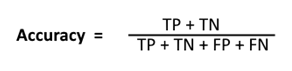

## Precision
The precision is the ratio of true positives over the total number of predicted positives.
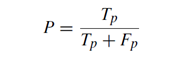

## Recall
The recall is the ratio of true positives over the true positives and false negatives. Recall is assessing the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0
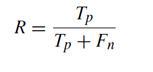

In [43]:
def precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,name):
    # plot precision_recall Test
    precision, recall, threshold = precision_recall_curve(y_test,model.predict_proba(X_test)[:, 1])
    precisions.append(precision)
    recalls.append(recall)
    
    # plot combined Precision Recall curve for train, valid, test
    show_train_precision = plot_precision_recall_curve(model, X_train, y_train, name="TrainPresRecal")
    show_test_precision = plot_precision_recall_curve(model, X_test, y_test, name="TestPresRecal", ax=show_train_precision.ax_)
    show_valid_precision = plot_precision_recall_curve(model, X_valid, y_valid, name="ValidPresRecal", ax=show_test_precision.ax_)
    show_valid_precision.ax_.set_title ("Precision Recall Curve Comparison - " + name)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
    plt.show()
    return precisions,recalls

## F1 score
The F1 score is a metric that has a value of 0 - 1, with 1 being the best value. The F1 score is a weighted average of the precision and recall, with the contributions of precision and recall are the same
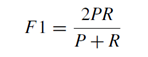

## Confusion Matrix
The confusion matrix, in this case for a binary classification, is a 2x2 matrix that contains the count of the true positives, false positives, true negatives, and false negatives.  
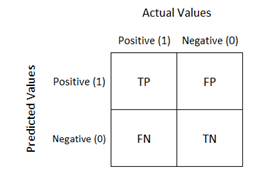

In [44]:
def confusion_matrix_def(model,X_train,y_train,X_test, y_test, X_valid, y_valid,cnfmatrix):
  #Prediction
  preds_test = model.predict(X_test)
  preds_train = model.predict(X_train)
  preds_valid = model.predict(X_valid)
    
  cm_train = confusion_matrix(y_train, preds_train).astype(np.float32)
  #print(cm_train)
  cm_train /= cm_train.sum(axis=1)[:, np.newaxis]

  cm_test = confusion_matrix(y_test, preds_test).astype(np.float32)
  #print(cm_test)
  cm_test /= cm_test.sum(axis=1)[:, np.newaxis]

  cm_valid = confusion_matrix(y_valid, preds_valid).astype(np.float32)
  cm_valid /= cm_valid.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(16, 4))
  #plt.subplots(1,3,figsize=(12,4))

  plt.subplot(131)
  g = sns.heatmap(cm_train, vmin=0, vmax=1, annot=True, cmap="Reds")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Train", fontsize=14)

  plt.subplot(132)
  g = sns.heatmap(cm_valid, vmin=0, vmax=1, annot=True, cmap="Reds")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Validation set", fontsize=14);

  plt.subplot(133)
  g = sns.heatmap(cm_test, vmin=0, vmax=1, annot=True, cmap="Reds")
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("True", fontsize=14)
  g.set(xticklabels=class_labels, yticklabels=class_labels)
  plt.title("Test", fontsize=14);
  cnfmatrix.append(cm_test)

  return cnfmatrix

## AUC (Area under ROC curve)
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
▪	True Positive Rate
▪	False Positive Rate
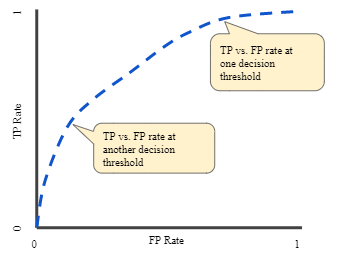

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).
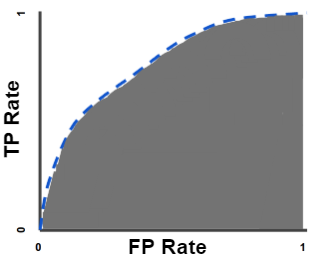

AUC is desirable for the following two reasons:
1. AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
2. AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

In [45]:
def roc_curve_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,fprs,tprs,name):
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    fprs.append(fpr)
    tprs.append(tpr)
    # plot combined ROC curve for train, valid, test
    show_train_roc = plot_roc_curve(model, X_train, y_train, name="TrainRocAuc")
    show_test_roc = plot_roc_curve(model, X_test, y_test, name="TestRocAuc", ax=show_train_roc.ax_)
    show_valid_roc = plot_roc_curve(model, X_valid, y_valid, name="ValidRocAuc", ax=show_test_roc.ax_)
    show_valid_roc.ax_.set_title ("ROC Curve Comparison - " + name)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
    plt.show()
    return fprs,tprs

## Binary cross-entropy loss (CXE)
CXE measures the performance of a classification model whose output is a probability value between 0 and 1. CXE increases as the predicted probability diverges from the actual label. Therefore, we choose a parameter, which would minimize the binary CXE loss function.

The log loss formula for the binary case is as follows : 

$$
-\frac{1}{m}\sum^m_{i=1}\left(y_i\cdot\:\log\:\left(p_i\right)\:+\:\left(1-y_i\right)\cdot\log\left(1-p_i\right)\right)
$$
- $y_i$: the label for $i_{th}$ observation
- $m$: sample size
- $p_i$: predicted probability of the point being in the label($y=1$) for $i_{th}$ observation


## p-value
p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis.

We will compare the classifiers with the baseline untuned model by conducting two-tailed hypothesis test.

Null Hypothesis, H0: There is no significant difference between the two machine learning pipelines.
Alternate Hypothesis, HA: The two machine learning pipelines are different.
A p-value less than or equal to the significance level is considered statistically significant.

In [46]:
metrics = {'accuracy': make_scorer(accuracy_score),
            'roc_auc': 'roc_auc',
            'f1': make_scorer(f1_score),
            'log_loss': make_scorer(log_loss)
          }

# Baseline model with Imbalanced Dataset
## Create Train and Test Datasets

In [47]:
# Split Sample to feed the pipeline and it will result in a new dataset that is (1 / splits) the size 
splits = 50

# Train Test split percentage
subsample_rate = 0.3

finaldf = np.array_split(train_dataset, splits)
X_train = finaldf[0][selected_features]
y_train = finaldf[0]['TARGET']
X_kaggle_test= X_kaggle_test[selected_features]

## split part of data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
                                                    test_size=subsample_rate, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X kaggle_test     shape: {X_kaggle_test.shape}")

X train           shape: (3659, 179)
X validation      shape: (646, 179)
X test            shape: (1846, 179)
X kaggle_test     shape: (48744, 179)


Convert the percentage to %

## Define pipeline

In [48]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

CPU times: user 1.29 ms, sys: 1.92 ms, total: 3.21 ms
Wall time: 140 ms


## Perform cross-fold validation and Train the model
Split the training data to 15 fold to perform Crossfold validation

In [49]:
cvSplits = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [50]:
X_train.head(5)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
5362             0          157500.0    312768.0      24840.0   
5150             0          112500.0    397881.0      22347.0   
5841             0           51750.0    135000.0       6750.0   
2399             0          171000.0    675000.0      45108.0   
2564             0          157500.0    505642.5      22401.0   

      AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
5362         270000.0                    0.020246      -14502          -1093   
5150         328500.0                    0.018634      -14875          -2201   
5841         135000.0                    0.031329      -20383         365243   
2399         675000.0                    0.072508      -19026          -3313   
2564         436500.0                    0.046220      -15010          -4028   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  FLAG_OWN_REALTY  \
5362             -108.0            -1112  ...                Y   
5150            -4659.0            -4268  ...                Y   
5841            -3830.0            -3946  ...                Y   
2399            -1771.0            -1815  ...                Y   
2564            -8826.0            -5126  ...                Y   

      NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
5362    Unaccompanied               Working  Secondary / secondary special   
5150    Unaccompanied               Working  Secondary / secondary special   
5841    Unaccompanied             Pensioner  Secondary / secondary special   
2399    Unaccompanied               Working  Secondary / secondary special   
2564    Unaccompanied  Commercial associate  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  OCCUPATION_TYPE  \
5362           Separated  House / apartment         Laborers   
5150             Married  House / apartment      Sales staff   
5841             Married  House / apartment              NaN   
2399             Married  House / apartment              NaN   
2564           Separated  House / apartment         Laborers   

      WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  EMERGENCYSTATE_MODE  
5362                      MONDAY  Business Entity Type 2                   No  
5150                      MONDAY           Self-employed                  NaN  
5841                   WEDNESDAY                     XNA                  NaN  
2399                      FRIDAY  Business Entity Type 3                   No  
2564                    THURSDAY  Business Entity Type 3                  NaN  

[5 rows x 179 columns]

In [51]:
start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Set up cross validation scores 
logit_scores = cross_validate(model, X_train, y_train,cv=cvSplits,scoring=metrics, return_train_score=True, n_jobs=-1)  
train_time = np.round(time() - start, 4)

# Time and score valid predictions
start = time()
logit_score_valid  = full_pipeline_with_predictor.score(X_valid, y_valid)
valid_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time() - start, 4)

## Calculate metrics

In [52]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [logit_scores['train_accuracy'].mean(), 
                logit_scores['test_accuracy'].mean(),
                accuracy_score(y_test, model.predict(X_test)),
                logit_scores['train_roc_auc'].mean(),
                logit_scores['test_roc_auc'].mean(),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                logit_scores['train_f1'].mean(),
                logit_scores['test_f1'].mean(),
                f1_score(y_test, model.predict(X_test)),
                logit_scores['train_log_loss'].mean(),
                logit_scores['test_log_loss'].mean(),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [train_time, logit_scores['score_time'].mean(), test_time] + [f"Imbalanced Logistic reg features {tot_features} with 20% training data"]
expLog


exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_179_features     0.9275     0.9144     0.9122     0.8636   

   Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  \
0     0.7067     0.6832          0.2328          0.1114         0.0581   

   Train Log Loss  Valid Log Loss  Test Log Loss  P Score  Train Time  \
0          2.5058          2.9569          3.031      0.0     40.2141   

   Valid Time  Test Time                                        Description  
0    0.097553      0.031  Imbalanced Logistic reg features 179:   Num:16...

## Confusion matrix

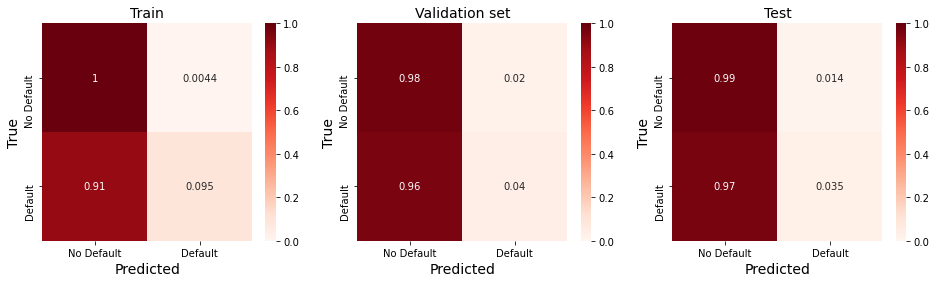

In [53]:
# Create confusion matrix for baseline model
_=confusion_matrix_def(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)

## AUC (Area under ROC curve) 

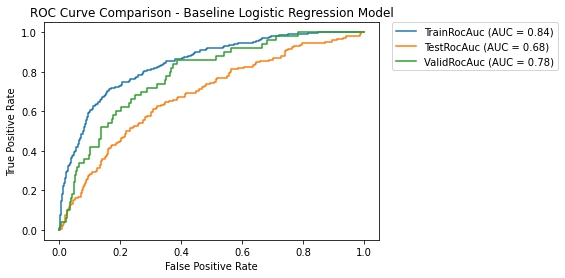

In [54]:
_,_=roc_curve_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,fprs,tprs,"Baseline Logistic Regression Model")

## Precision Recall Curve

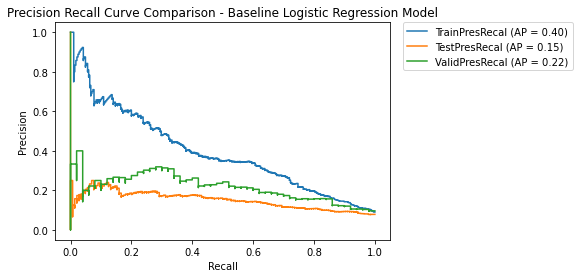

In [55]:
_,_=precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,"Baseline Logistic Regression Model")

# Baseline Model - With sampled data

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model. Since 'No default and Default' target records are not balanced in trainging set, we are going to resample the minority class("Default with target value 1") to balance the input dataset

## Create Train and Test Datasets

In [ ]:
# Train Test split percentage
#subsample_rate = 0.3

#finaldf = train_dataset
#X_train = finaldf[0][selected_features]
#y_train = finaldf[0]['TARGET']

#X_train = finaldf[selected_features]
#y_train = finaldf['TARGET']
#X_kaggle_test= datasets["application_test"][selected_features]

## split part of data
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train,
#                                                    test_size=subsample_rate, random_state=42)


In [272]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,stratify=y_train,test_size=0.15, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (1830, 180)
X validation      shape: (323, 180)
X test            shape: (923, 180)
X X_kaggle_test   shape: (48744, 180)


In [273]:
# Bincount shows the imbalanced data in Target default and no default class
np.bincount(y_train)

array([1686,  144])

## Resample Minority class
Resampling should be performed only in the train dataset, to avoid overfitting and data leakage.

In [274]:
# concatenate our training data back together
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

SK_ID_CURR  CNT_CHILDREN  ...  EMERGENCYSTATE_MODE  TARGET
3074      103589             1  ...                  NaN       0
1837      102152             0  ...                   No       0
1276      101505             0  ...                  NaN       0
1106      101288             0  ...                   No       0
2188      102569             0  ...                  NaN       0

[5 rows x 181 columns]

**After resampling, both default and non-default classes are balanced**

In [275]:
# separate minority and majority classes
no_default_data = train_data[train_data.TARGET==0]
default_data = train_data[train_data.TARGET==1]

# sample minority
default_sampled_data = resample(default_data,
                          replace=True, # sample with replacement
                          n_samples=len(no_default_data), # match number in majority class
                          random_state=42) # reproducible 

# combine majority and upsampled minority
train_data = pd.concat([no_default_data, default_sampled_data])

train_data.TARGET.value_counts()

1    1686
0    1686
Name: TARGET, dtype: int64

In [276]:
y_train = train_data['TARGET']
X_train = train_data[selected_features]

## Create a Pipeline with Baseline Model

In [277]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])

CPU times: user 145 µs, sys: 15 µs, total: 160 µs
Wall time: 165 µs


## Create crossfold validation splits
Split the training data to 5 fold to perform Crossfold validation

In [278]:
cvSplits = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

## Baseline Prediction

In [279]:
start = time()
model = full_pipeline_with_predictor.fit(X_train, y_train)
np.random.seed(42)

# Set up cross validation scores 
logit_scores = cross_validate(model, X_train, y_train,cv=cvSplits,scoring=metrics, return_train_score=True, n_jobs=-1)  
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_valid  = full_pipeline_with_predictor.score(X_valid, y_valid)
valid_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline_with_predictor.score(X_test, y_test)
test_time = np.round(time() - start, 4)

## Baseline metrics

Accuracy, AUC score, F1 Score and Log loss used for measuring the baseline model 

In [280]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [logit_scores['train_accuracy'].mean(), 
                logit_scores['test_accuracy'].mean(),
                accuracy_score(y_test, model.predict(X_test)),
                logit_scores['train_roc_auc'].mean(),
                logit_scores['test_roc_auc'].mean(),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                logit_scores['train_f1'].mean(),
                logit_scores['test_f1'].mean(),
                f1_score(y_test, model.predict(X_test)),
                logit_scores['train_log_loss'].mean(),
                logit_scores['test_log_loss'].mean(),
                log_loss(y_test, model.predict(X_test)),0 ],4)) \
                + [train_time, logit_scores['score_time'].mean(), test_time] + [f"Imbalanced Logistic reg features {tot_features} with 20% training data"]
expLog

exp_name  ...                                        Description
0  Baseline_250_features  ...  Imbalanced Logistic reg features 250:   Num:23...
1  Baseline_250_features  ...  Imbalanced Logistic reg features 250:   Num:23...
2  Baseline_250_features  ...  Imbalanced Logistic reg features 250:   Num:23...
3  Baseline_180_features  ...  Imbalanced Logistic reg features 180:   Num:16...
4  Baseline_180_features  ...  Imbalanced Logistic reg features 180:   Num:16...

[5 rows x 18 columns]

## Confusion matrix

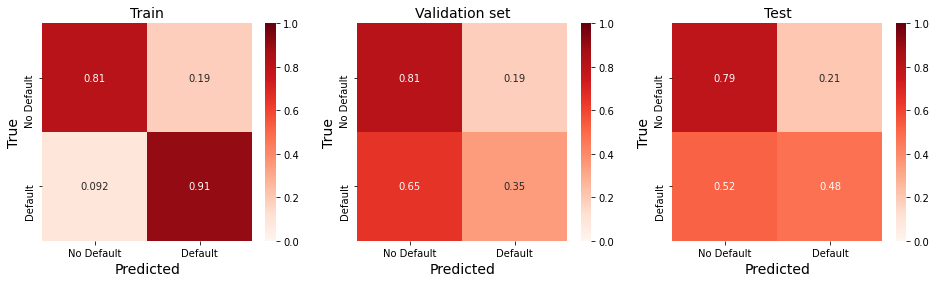

In [281]:
# Create confusion matrix for baseline model
_=confusion_matrix_def(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)

## AUC (Area under ROC curve) 

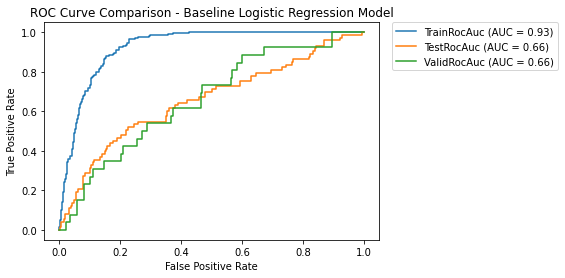

In [282]:
_,_=roc_curve_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,fprs,tprs,"Baseline Logistic Regression Model")

## Precision Recall Curve

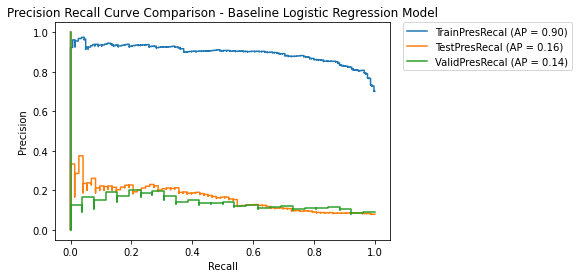

In [283]:
_,_=precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,"Baseline Logistic Regression Model")

# Tune Basline model with grid search

Various Classification algorithms were used to compare with the best model. Following metrics were used to find the best model

* Cross fold Train Accuracy
* Test Accuracy
* p-value
* Train ROC_AUC_Score
* Test ROC_AUC_Score
* Train F1_Score
* Test F1_Score
* Train LogLoss
* Test LogLoss
* Train Time
* Test Time
* Confusion matrix

## Classifiers

In [56]:
classifiers = [
        [('Logistic Regression', LogisticRegression(solver='saga',random_state=42),"RFE")],
        [('Support Vector', SVC(random_state=42,probability=True),"SVM")],
        [('Gradient Boosting', GradientBoostingClassifier(warm_start=True, random_state=42),"RFE")],
        [('XGBoost', XGBClassifier(random_state=42),"RFE")],
        [('Light GBM', LGBMClassifier(boosting_type='gbdt', random_state=42),"RFE")],
        [('RandomForest', RandomForestClassifier(random_state=42),"RFE")]
    ]

## Hyper-parameters for different models

In [63]:
# Arrange grid search parameters for each classifier
params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2','elasticnet'),
            'tol': (0.0001, 0.00001), 
            'C': (10, 1, 0.1, 0.01),
        }
    ,
        'Support Vector' : {
            'kernel': ('rbf','poly'),     
            'degree': (4, 5),
            'C': ( 0.001, 0.01),   #Low C - allow for misclassification
            'gamma':(0.01,0.1,1)  #Low gamma - high variance and low bias
        }
    ,
    'Gradient Boosting':  {
            'max_depth': [5,10], # Lower helps with overfitting
            'max_features': [10,15],
            'validation_fraction': [0.2],
            'n_iter_no_change': [10],
            'tol': [0.01,0.0001],
            'n_estimators':[1000],
            'subsample' : [0.8],             #fraction of observations to be randomly samples for each tree.
    #        'min_samples_split' : [5], # Must have 'x' number of samples to split (Default = 2)
            'min_samples_leaf' : [3,5],        # (Default = 1) minimum number of samples in a leaf
        },
        'XGBoost':  {
            'max_depth': [3,5], # Lower helps with overfitting
            'n_estimators':[300,500],
            'learning_rate': [0.01,0.1],
#            'objective': ['binary:logistic'],
#            'eval_metric': ['auc'],
            'eta' : [0.01,0.1],
            'colsample_bytree' : [0.2,0.5], 
        },
        'Light GBM':  {
            'max_depth': [2,5],  # Lower helps with overfitting
            'num_leaves': [5,10], # Equivalent to max depth
            'n_estimators':[1000,5000],
            'learning_rate': [0.01,0.1],
 #           'reg_alpha': [0.1,0.01,1],
 #           'reg_lambda': [0.1,0.01,1],
            'boosting_type':['goss','dart'],
 #           'metric': ['auc'],
 #           'objective':['binary'],
            'max_bin' : [100,200],  #Setting it to high values has similar effect as caused by increasing value of num_leaves 
        },                          #small numbers reduces accuracy but runs faster 

        'RandomForest':  {
            'max_depth': [5,10],
            'max_features': [15,20],
            'min_samples_split': [5, 10],
            'min_samples_leaf': [3, 5],
            'bootstrap': [True],
            'n_estimators':[1000]},
    }

In [58]:
# Set feature selection settings
# Features removed each step
feature_selection_steps=10
# Number of features used
features_used=len(selected_features)

## Conduct Grid Search

In [60]:
results.append(logit_scores['train_accuracy'])
names = ['Baseline LR']
def ConductGridSearch(in_classifiers,cnfmatrix,fprs,tprs,precisions,recalls):
    for (name, classifier,feature_sel) in in_classifiers:
            # Print classifier and parameters
            print('****** START', name,'*****')
            parameters = params_grid[name]
            print("Parameters:")
            for p in sorted(parameters.keys()):
                print("\t"+str(p)+": "+ str(parameters[p]))

            # generate the pipeline based on the feature selection method
            if feature_sel == "SVM":
                full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
            #    ("PCA",PCA(0.95)),
            #    ('RFE', RFE(estimator=classifier, n_features_to_select=features_used, step=feature_selection_steps)),
                ("predictor", classifier)
                ])
            else:
                full_pipeline_with_predictor = Pipeline([
                ("preparation", data_prep_pipeline),
                ('RFE', RFE(estimator=classifier, n_features_to_select=features_used, step=feature_selection_steps)),
                ("predictor", classifier)
                ])

            # Execute the grid search
            params = {}
            for p in parameters.keys():
                pipe_key = 'predictor__'+str(p)
                params[pipe_key] = parameters[p] 
            grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                                       n_jobs=-1,verbose=1)
            grid_search.fit(X_train, y_train)

            # Best estimator score
            best_train = pct(grid_search.best_score_)

            # Best train scores
            print("Cross validation with best estimator")
            best_train_scores = cross_validate(grid_search.best_estimator_, X_train, y_train,cv=cvSplits,scoring=metrics, 
                                               return_train_score=True, n_jobs=-1)  

            #get all scores
            best_train_accuracy = np.round(best_train_scores['train_accuracy'].mean(),4)
            best_train_f1 = np.round(best_train_scores['train_f1'].mean(),4)
            best_train_logloss = np.round(best_train_scores['train_log_loss'].mean(),4)
            best_train_roc_auc = np.round(best_train_scores['train_roc_auc'].mean(),4)

            valid_time = np.round(best_train_scores['score_time'].mean(),4)
            best_valid_accuracy = np.round(best_train_scores['test_accuracy'].mean(),4)
            best_valid_f1 = np.round(best_train_scores['test_f1'].mean(),4)
            best_valid_logloss = np.round(best_train_scores['test_log_loss'].mean(),4)
            best_valid_roc_auc = np.round(best_train_scores['test_roc_auc'].mean(),4)

            #append all results
            results.append(best_train_scores['train_accuracy'])
            names.append(name)
            
            # Conduct t-test with baseline logit (control) and best estimator (experiment)
            (t_stat, p_value) = stats.ttest_rel(logit_scores['train_roc_auc'], best_train_scores['train_roc_auc'])

            #test and Prediction with whole data
            # Best estimator fitting time
            print("Fit and Prediction with best estimator")
            start = time()
            model = grid_search.best_estimator_.fit(X_train, y_train)
            train_time = round(time() - start, 4)

            # Best estimator prediction time
            start = time()
            y_test_pred = model.predict(X_test)
            test_time = round(time() - start, 4)
            scores.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
            accuracy.append(accuracy_score(y_test, y_test_pred))

            # Create confusion matrix for the best model
            cnfmatrix = confusion_matrix_def(model,X_train,y_train,X_test,y_test,X_valid, y_valid,cnfmatrix)

            # Create AUC ROC curve
            fprs,tprs = roc_curve_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,fprs,tprs,name)

            #Create Precision recall curve
            precisions,recalls = precision_recall_cust(model,X_train,y_train,X_test, y_test,X_valid, y_valid,precisions,recalls,name)

            #Best Model
            final_best_clf[name]=pd.DataFrame([{'label': grid_search.best_estimator_.named_steps['predictor'].__class__.__name__,
                                           'predictor': grid_search.best_estimator_.named_steps['predictor']}])
            #Feature importance 
            feature_name = num_attribs + list(grid_search.best_estimator_.named_steps['preparation'].transformer_list[1][1].named_steps['ohe'].get_feature_names())   
            feature_list = feature_name
            if feature_sel == "RFE":
            #    features_list[name]=pd.DataFrame({'feature_name': feature_list,
            #                                         'feature_importance': grid_search.best_estimator_.named_steps['PCA'].explained_variance_ratio_})
            #                             'feature_importance': grid_search.best_estimator_.named_steps['RFE'].ranking_})
            #    print(len(feature_list),feature_list)
            #    print(len(grid_search.best_estimator_.named_steps['RFE'].ranking_),
            #          grid_search.best_estimator_.named_steps['RFE'].ranking_)
                features_list[name]=pd.DataFrame({'feature_name': feature_list,
                                         'feature_importance': grid_search.best_estimator_.named_steps['RFE'].ranking_})
            # Collect the best parameters found by the grid search
            print("Best Parameters:")
            best_parameters = grid_search.best_estimator_.get_params()
            param_dump = []
            for param_name in sorted(params.keys()):
                param_dump.append((param_name, best_parameters[param_name]))
                print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
            print("****** FINISH",name," *****")
            print("")

            # Record the results
            exp_name = name
            expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                    [best_train_accuracy, 
                    #pct(accuracy_score(y_valid, model.predict(X_valid))),
                    best_valid_accuracy,
                    accuracy_score(y_test, y_test_pred),
                    best_train_roc_auc,
                    best_valid_roc_auc,
                    #roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                    roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                    best_train_f1,
                    best_valid_f1,
                    f1_score(y_test, y_test_pred),
                    best_train_logloss,
                    best_valid_logloss, 
                    log_loss(y_test, y_test_pred),
                    p_value
                    ],4)) + [train_time,valid_time,test_time] \
                    + [json.dumps(param_dump)]

### Logistic Regression Model

****** START Logistic Regression *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.0001, 1e-05)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 13.9min finished


Cross validation with best estimator
Fit and Prediction with best estimator


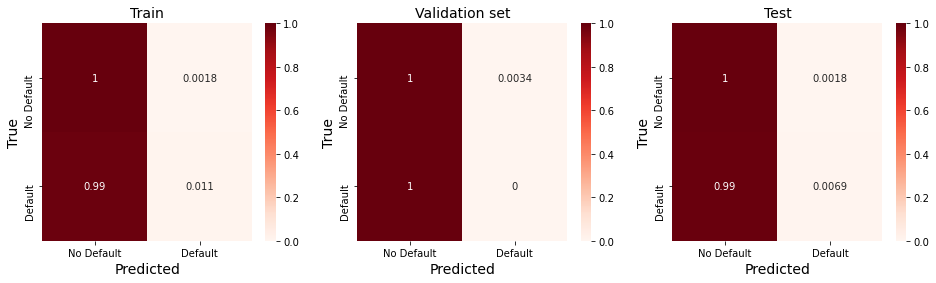

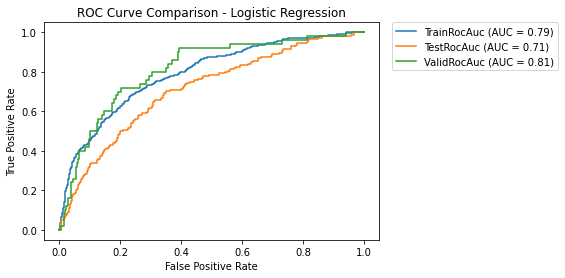

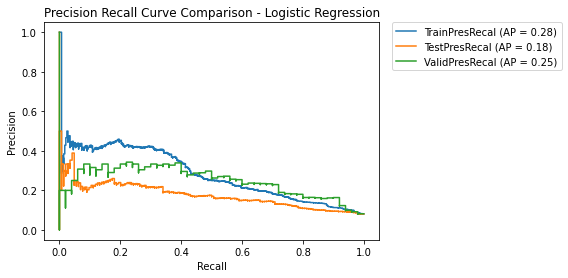

Best Parameters:
	predictor__C: 0.1
	predictor__penalty: l1
	predictor__tol: 0.0001
****** FINISH Logistic Regression  *****



In [61]:
ConductGridSearch(classifiers[0],cnfmatrix,fprs,tprs,precisions,recalls)

### Gradient Boosting



****** START Gradient Boosting *****
Parameters:
	max_depth: [5, 10]
	max_features: [10, 15, 20]
	min_samples_leaf: [3, 5]
	min_samples_split: [5, 10, 15]
	n_estimators: [1000]
	n_iter_no_change: [10]
	subsample: [0.8]
	tol: [0.01, 0.0001]
	validation_fraction: [0.2]
Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 79.1min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 149.1min finished


Cross validation with best estimator
Fit and Prediction with best estimator


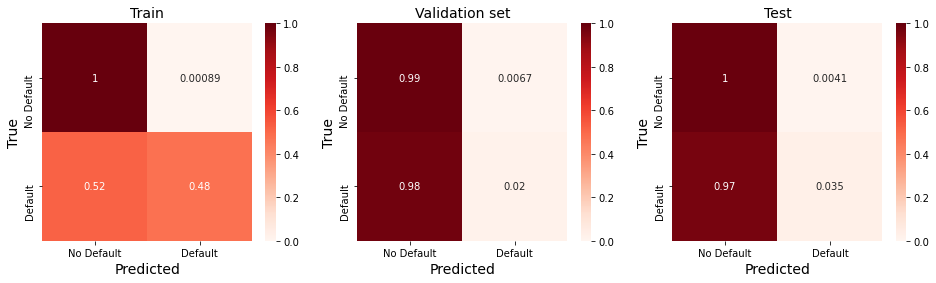

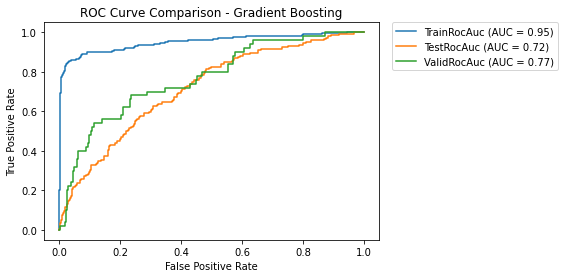

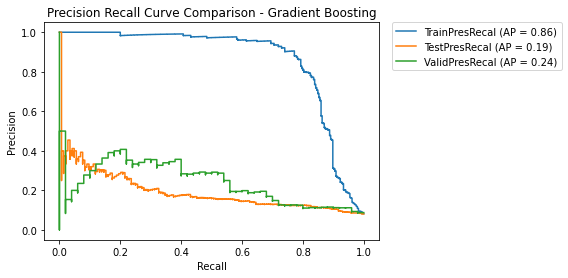

Best Parameters:
	predictor__max_depth: 5
	predictor__max_features: 20
	predictor__min_samples_leaf: 3
	predictor__min_samples_split: 15
	predictor__n_estimators: 1000
	predictor__n_iter_no_change: 10
	predictor__subsample: 0.8
	predictor__tol: 0.0001
	predictor__validation_fraction: 0.2
****** FINISH Gradient Boosting  *****



In [62]:
ConductGridSearch(classifiers[2],cnfmatrix,fprs,tprs,precisions,recalls)

### XGBoost



****** START XGBoost *****
Parameters:
	colsample_bytree: [0.2, 0.5]
	eta: [0.01, 0.1]
	learning_rate: [0.01, 0.1]
	max_depth: [3, 5]
	n_estimators: [300, 500]
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 67.9min finished


Cross validation with best estimator
Fit and Prediction with best estimator


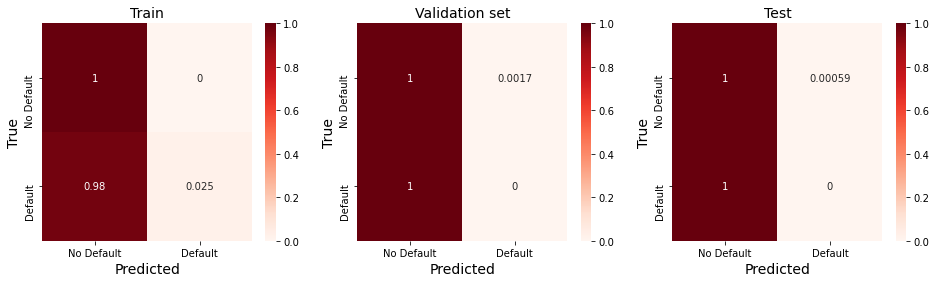

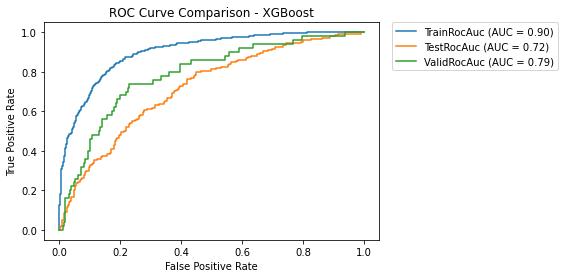

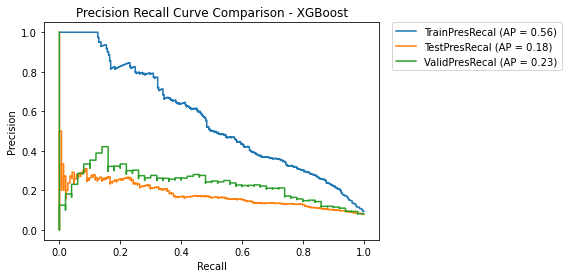

Best Parameters:
	predictor__colsample_bytree: 0.5
	predictor__eta: 0.01
	predictor__learning_rate: 0.01
	predictor__max_depth: 3
	predictor__n_estimators: 500
****** FINISH XGBoost  *****



In [64]:
ConductGridSearch(classifiers[3],cnfmatrix,fprs,tprs,precisions,recalls)

### Light GBM




****** START Light GBM *****
Parameters:
	boosting_type: ['goss', 'dart']
	learning_rate: [0.01, 0.1]
	max_bin: [100, 200]
	max_depth: [2, 5]
	n_estimators: [1000, 5000]
	num_leaves: [5, 10]
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 85.4min finished


Cross validation with best estimator
Fit and Prediction with best estimator


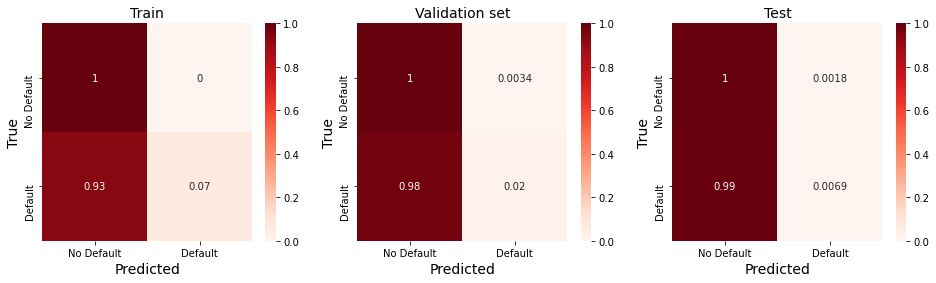

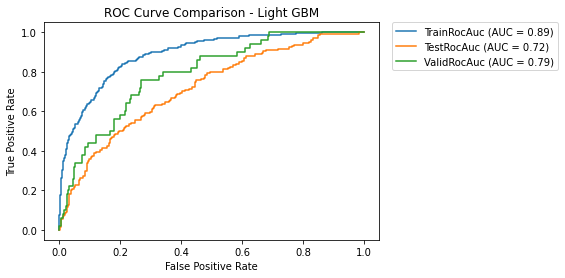

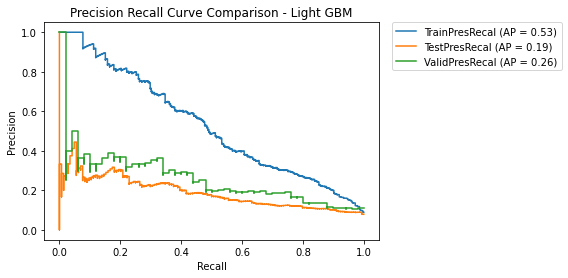

Best Parameters:
	predictor__boosting_type: goss
	predictor__learning_rate: 0.01
	predictor__max_bin: 100
	predictor__max_depth: 2
	predictor__n_estimators: 1000
	predictor__num_leaves: 5
****** FINISH Light GBM  *****



In [66]:
ConductGridSearch(classifiers[4],cnfmatrix,fprs,tprs,precisions,recalls)

### RandomForest



****** START RandomForest *****
Parameters:
	bootstrap: [True]
	max_depth: [5, 10]
	max_features: [15, 20]
	min_samples_leaf: [3, 5]
	min_samples_split: [5, 10]
	n_estimators: [1000]
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 17.4min finished


Cross validation with best estimator
Fit and Prediction with best estimator


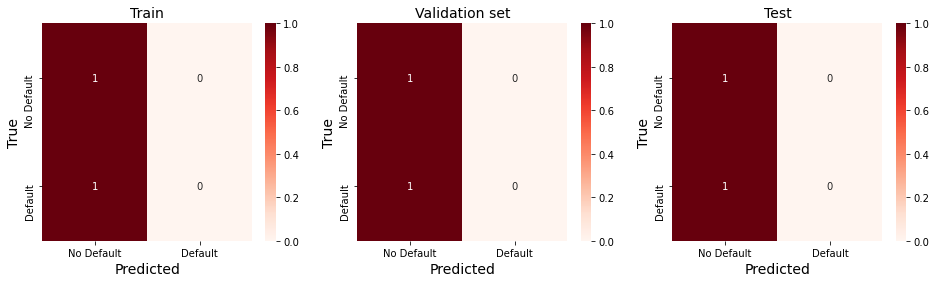

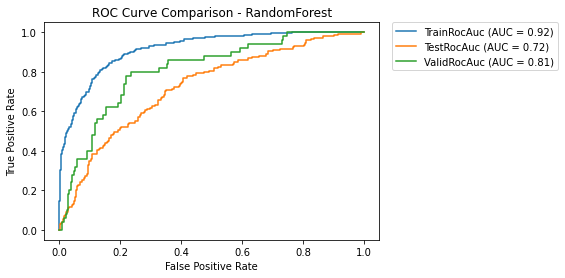

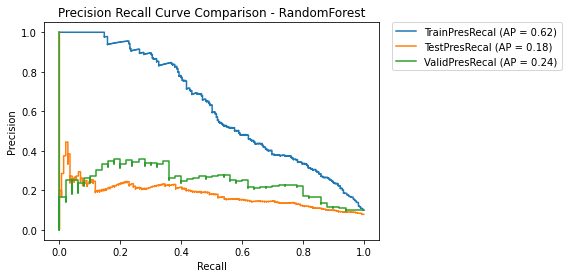

Best Parameters:
	predictor__bootstrap: True
	predictor__max_depth: 5
	predictor__max_features: 20
	predictor__min_samples_leaf: 5
	predictor__min_samples_split: 5
	predictor__n_estimators: 1000
****** FINISH RandomForest  *****



In [67]:
ConductGridSearch(classifiers[5],cnfmatrix,fprs,tprs,precisions,recalls)

### Support Vector

****** START Support Vector *****
Parameters:
	C: (0.001, 0.01)
	degree: (4, 5)
	gamma: (0.01, 0.1, 1)
	kernel: ('rbf', 'poly')
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 11.2min finished


Cross validation with best estimator
Fit and Prediction with best estimator


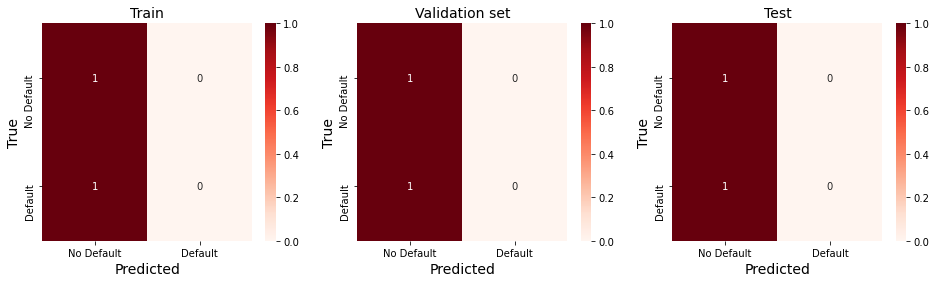

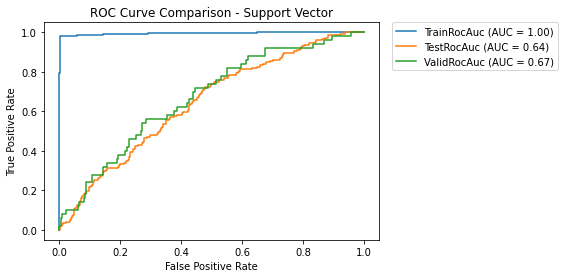

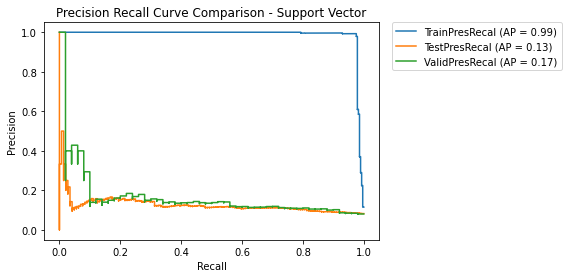

Best Parameters:
	predictor__C: 0.01
	predictor__degree: 4
	predictor__gamma: 0.01
	predictor__kernel: rbf
****** FINISH Support Vector  *****



In [109]:
ConductGridSearch(classifiers[1],cnfmatrix,fprs,tprs,precisions,recalls)

## PCA & Handling MultiCollinearity 

Multicollinearity highly affects the variance associated with the problem, and can also affect the interpretation of the model, as it undermines the statistical significance of independent variables.For a dataset, if some of the independent variables are highly independent of each other, it results in multicollinearity. A small change in any of the features can affect the model performance to a great extent. In other words, The coefficients of the model become very sensitive to small changes in the independent variables.The basic idea is to run a PCA on all predictors. Their ratio, the Condition Index, will be high if multicollinearity is present. <br>
Reference : https://www.whitman.edu/Documents/Academics/Mathematics/2017/Perez

## Logistic regression with PCA

In [112]:
for (name, classifier,feature_sel) in classifiers[0]:
        # Print classifier and parameters
        print('****** START', name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))

        # generate the pipeline based on the feature selection method
        full_pipeline_with_predictor = Pipeline([
            ("preparation", data_prep_pipeline),
            ("PCA",PCA(0.95)),
            ("predictor", classifier)
            ])
 
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, cv=cvSplits, scoring='roc_auc',
                                   n_jobs=-1,verbose=1)
        grid_search.fit(X_train, y_train)

        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best train scores
        print("Cross validation with best estimator")
        best_train_scores = cross_validate(grid_search.best_estimator_, X_train, y_train,cv=cvSplits,scoring=metrics, 
                                           return_train_score=True, n_jobs=-1)  

        #get all scores
        best_train_accuracy = np.round(best_train_scores['train_accuracy'].mean(),4)
        best_train_f1 = np.round(best_train_scores['train_f1'].mean(),4)
        best_train_logloss = np.round(best_train_scores['train_log_loss'].mean(),4)
        best_train_roc_auc = np.round(best_train_scores['train_roc_auc'].mean(),4)

        valid_time = np.round(best_train_scores['score_time'].mean(),4)
        best_valid_accuracy = np.round(best_train_scores['test_accuracy'].mean(),4)
        best_valid_f1 = np.round(best_train_scores['test_f1'].mean(),4)
        best_valid_logloss = np.round(best_train_scores['test_log_loss'].mean(),4)
        best_valid_roc_auc = np.round(best_train_scores['test_roc_auc'].mean(),4)

        (t_stat, p_value) = stats.ttest_rel(logit_scores['train_roc_auc'], best_train_scores['train_roc_auc'])

        #test and Prediction with whole data
        # Best estimator fitting time
        print("Fit and Prediction with best estimator")
        start = time()
        model = grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        y_test_pred = model.predict(X_test)
        test_time = round(time() - start, 4)

        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",name," *****")
        print("")

        # Record the results
        exp_name = "Logistic Regression with PCA"
        expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
                [best_train_accuracy, 
                #pct(accuracy_score(y_valid, model.predict(X_valid))),
                best_valid_accuracy,
                accuracy_score(y_test, y_test_pred),
                best_train_roc_auc,
                best_valid_roc_auc,
                #roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                best_train_f1,
                best_valid_f1,
                f1_score(y_test, y_test_pred),
                best_train_logloss,
                best_valid_logloss, 
                log_loss(y_test, y_test_pred),
                p_value
                ],4)) + [train_time,valid_time,test_time] \
                + [json.dumps(param_dump)]

****** START Logistic Regression *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	penalty: ('l1', 'l2', 'elasticnet')
	tol: (0.0001, 1e-05)
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   36.3s finished


Cross validation with best estimator
Fit and Prediction with best estimator
Best Parameters:
	predictor__C: 0.01
	predictor__penalty: l2
	predictor__tol: 0.0001
****** FINISH Logistic Regression  *****



# Model Validation
## Feature Importance based on all Models

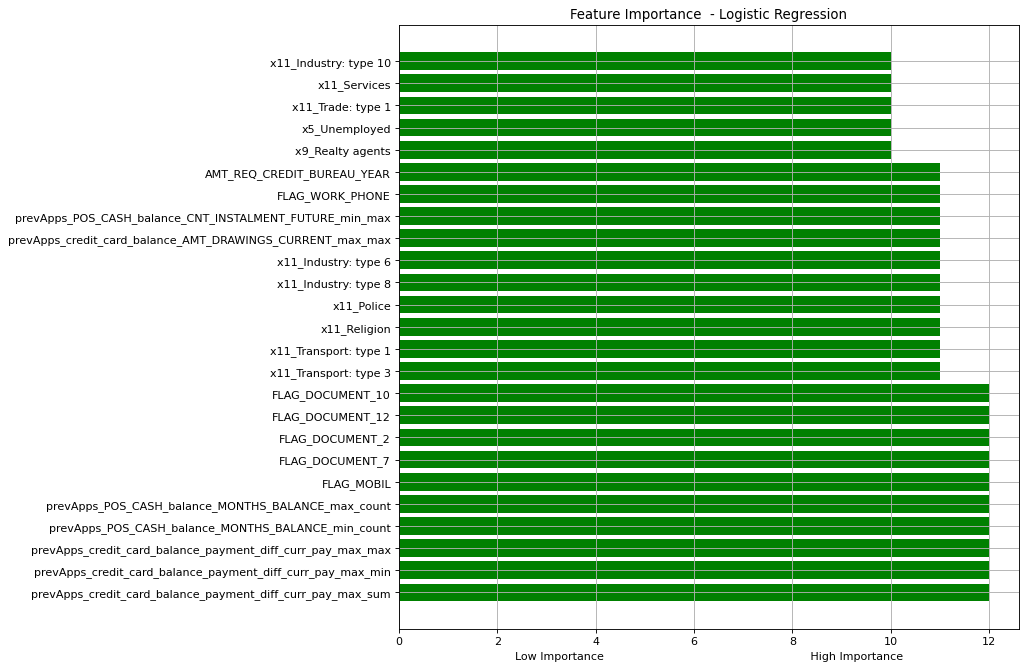

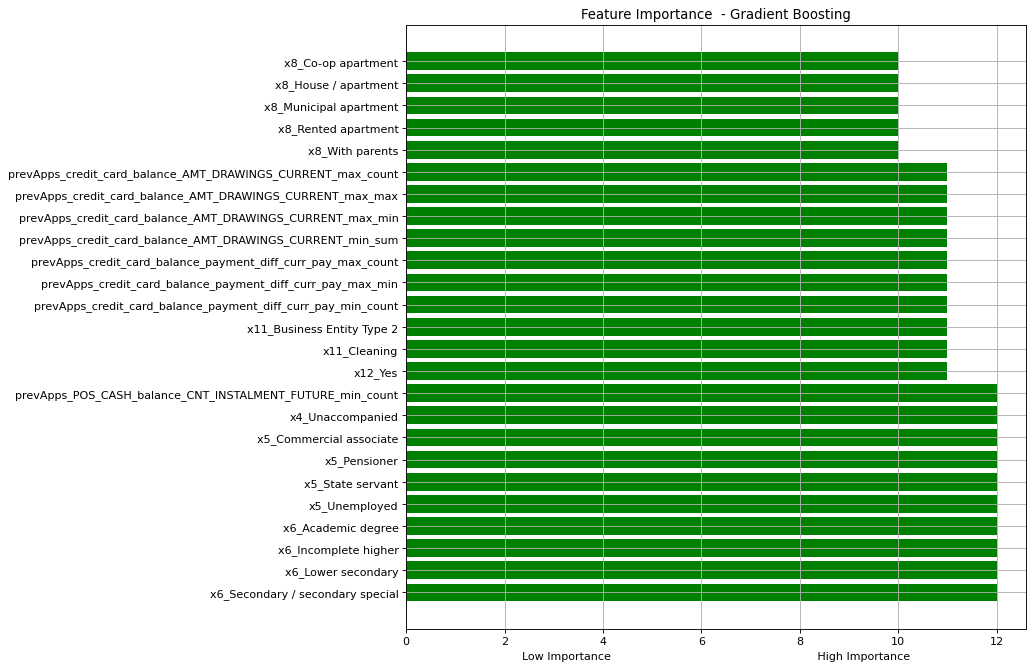

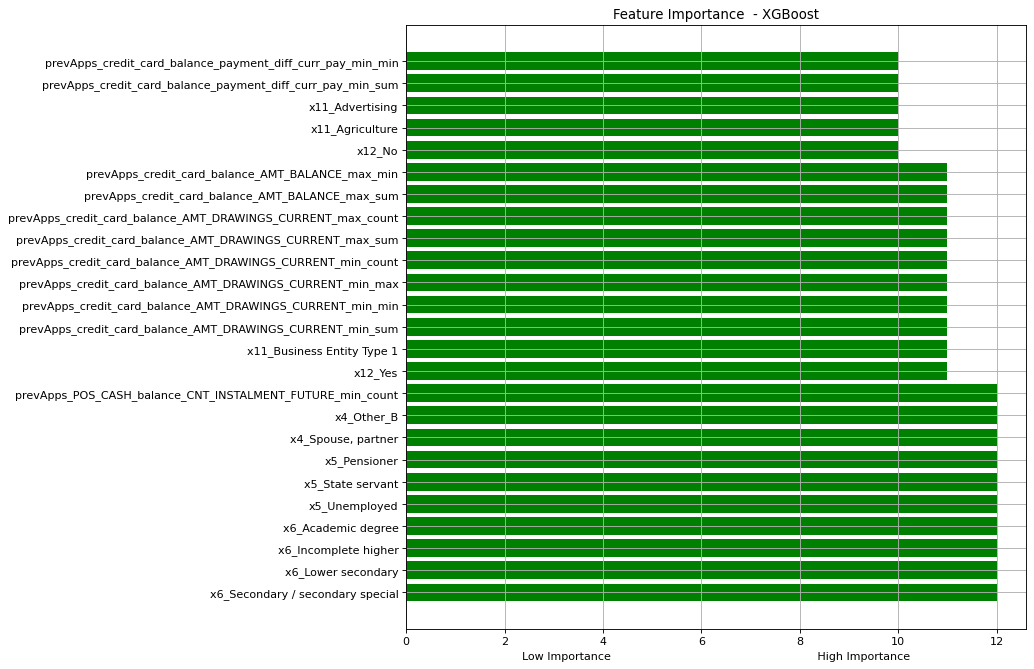

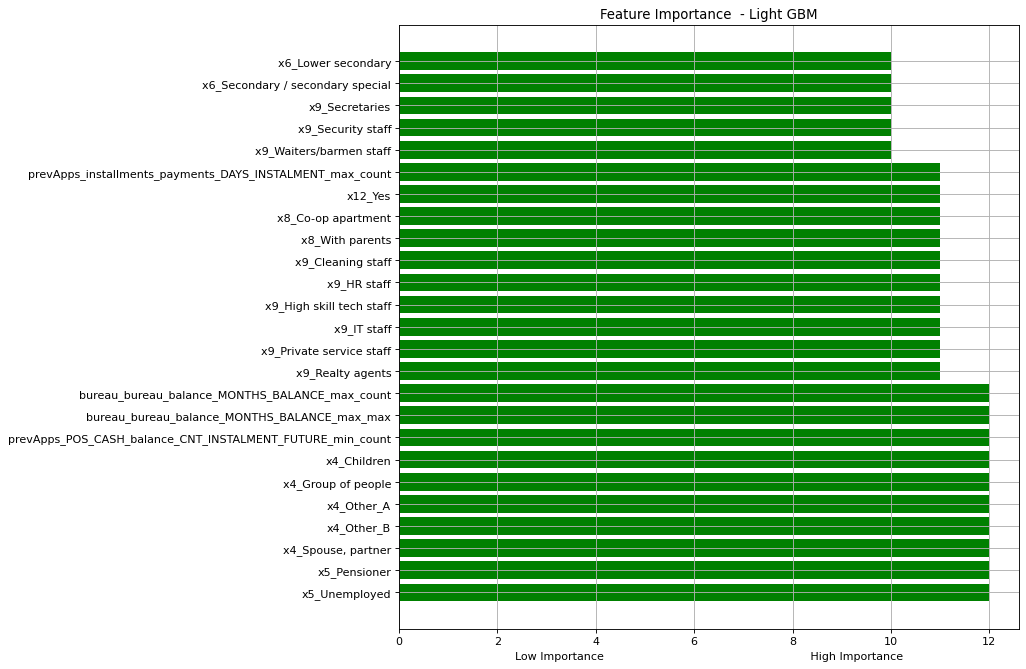

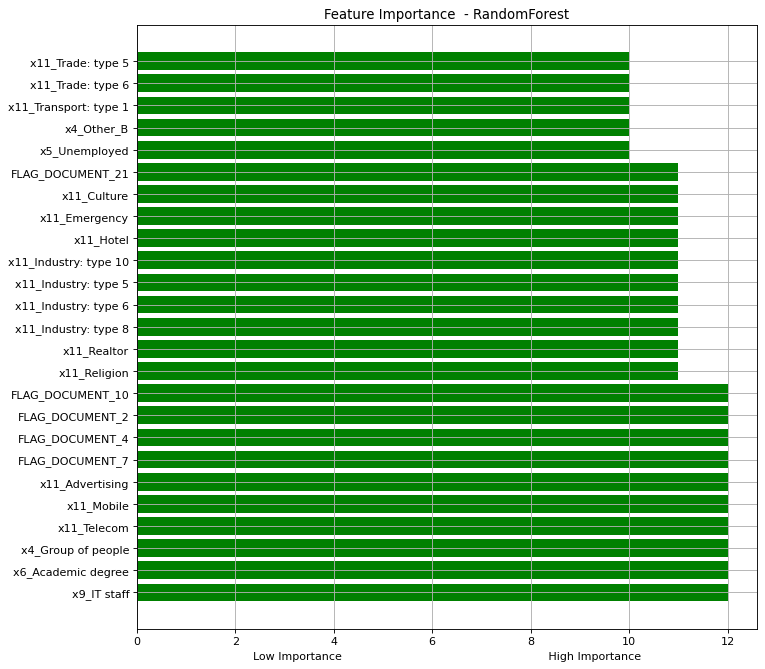

In [114]:
# plot feature importance by their ranking for each model
for name in names[1:-1]:
    plt.figure(figsize=(10,10), dpi= 80)
    features_df = features_df = features_list[name].sort_values(['feature_importance','feature_name'], ascending=[False, False])
    sortedNames = np.array(features_df)[0:25, 0]
    sortedImportances = np.array(features_df)[0:25, 1]
    plt.title('Feature Importance  - ' + name)
    plt.barh(range(len(sortedNames)), sortedImportances, color='g', align='center')
    plt.yticks(range(len(sortedNames)), sortedNames)  
    plt.xlabel('Low Importance                                                           High Importance')
    plt.grid()
    plt.show()

## Boxplot with all CV results

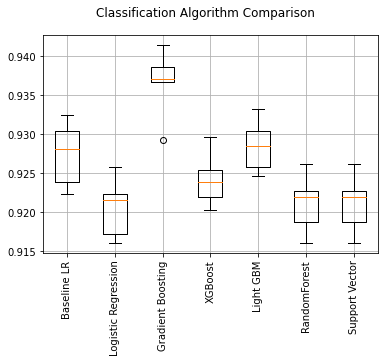

In [115]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Classification Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names,rotation=90)
pyplot.grid()
pyplot.show()

## AUC (Area Under the ROC Curve)

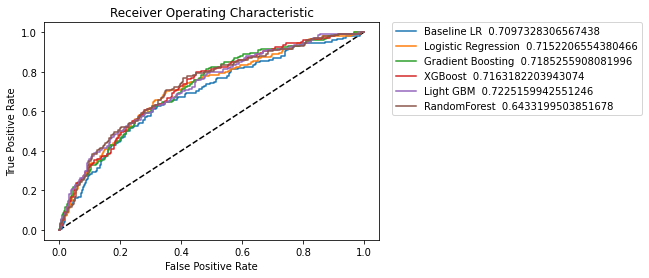

In [116]:
# roc curve fpr, tpr  for all classifiers 
plt.plot([0,1],[0,1], 'k--')
for i in range(len(names)-1):
    plt.plot(fprs[i],tprs[i],label = names[i] + '  ' + str(scores[i]))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.show()

## Precision Recall Curve

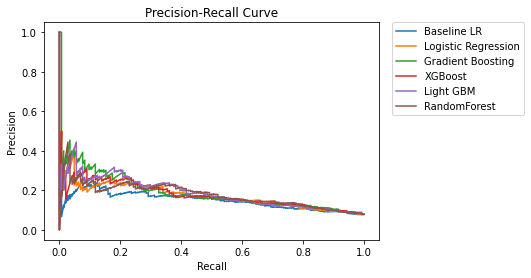

In [117]:
# precision recall curve  for all classifiers 
for i in range(len(names)-1):
    plt.plot(recalls[i],precisions[i],label = names[i])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", borderaxespad=0)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision-Recall Curve')
plt.show()

## Confusion Matrix

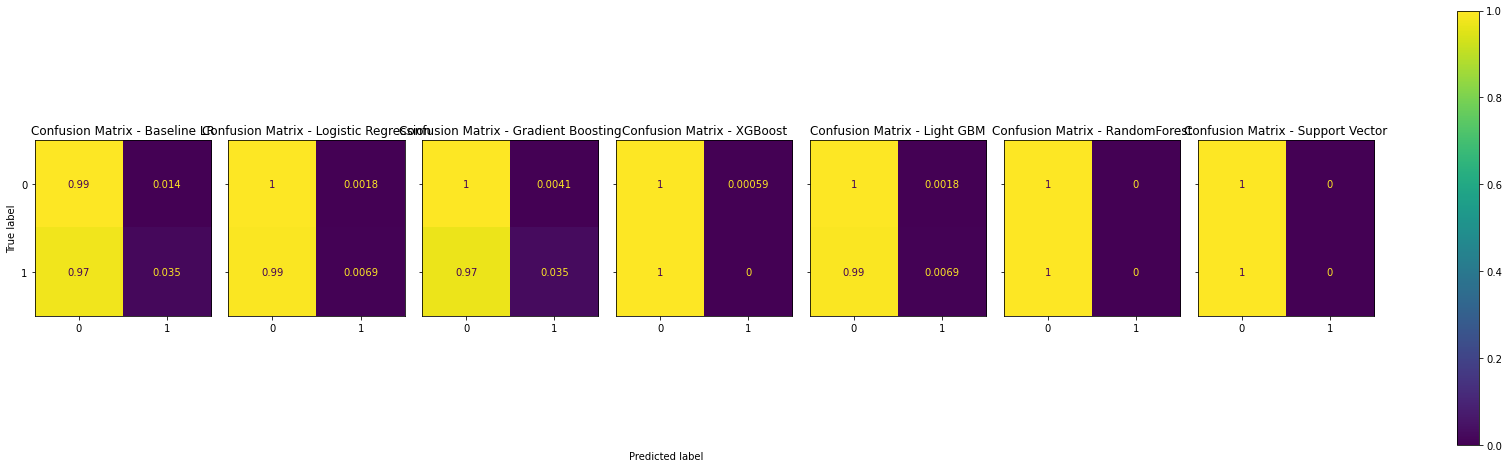

In [118]:
# plot confusion matrix for all classifiers 
f, axes = plt.subplots(1, len(names), figsize=(30, 8), sharey='row')
for i in range(len(names)):
    disp = ConfusionMatrixDisplay(cnfmatrix[i], display_labels=['0', '1'])
    disp.plot(ax=axes[i], xticks_rotation=0)
    disp.ax_.set_title("Confusion Matrix - " + names[i])
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.10, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()

## Final results
<a id='exp results'></a>

In [113]:
pd.set_option('display.max_colwidth', None)
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0         Baseline_179_features     0.9275     0.9144     0.9122     0.8636   
1           Logistic Regression     0.9206     0.9230     0.9209     0.7984   
2             Gradient Boosting     0.9367     0.9233     0.9209     0.9296   
3                       XGBoost     0.9242     0.9244     0.9215     0.9292   
4                     Light GBM     0.9285     0.9235     0.9209     0.9221   
5                  RandomForest     0.9211     0.9244     0.9220     0.9422   
6                Support Vector     0.9211     0.9244     0.9220     0.9950   
7  Logistic Regression with PCA     0.9218     0.9239     0.9215     0.7984   

   Valid AUC  Test  AUC  Train F1 Score  Valid F1 Score  Test F1 Score  \
0     0.7067     0.6832          0.2328          0.1114         0.0581   
1     0.7223     0.7097          0.0301          0.0135         0.0135   
2     0.6924     0.7152          0.3320          0.0267         0.0641   
3     0.7248     0.7185          0.0757          0.0041         0.0000   
4     0.7235     0.7163          0.1781          0.0179         0.0135   
5     0.7055     0.7225          0.0000          0.0000         0.0000   
6     0.6407     0.6433          0.0000          0.0000         0.0000   
7     0.7026     0.6998          0.0289          0.0041         0.0136   

   Train Log Loss  Valid Log Loss  Test Log Loss  P Score  Train Time  \
0          2.5058          2.9569         3.0310   0.0000     40.2141   
1          2.7431          2.6612         2.7317   0.0000     24.5873   
2          2.1875          2.6486         2.7317   0.0002     75.5635   
3          2.6164          2.6109         2.7130   0.0000     57.6160   
4          2.4680          2.6423         2.7317   0.0001     15.9491   
5          2.7243          2.6109         2.6942   0.0000     38.8472   
6          2.7243          2.6109         2.6942   0.0000     13.9953   
7          2.7000          2.6297         2.7130   0.0000      1.0927   

   Valid Time  Test Time  \
0    0.097553     0.0310   
1    0.063300     0.0280   
2    0.070700     0.0454   
3    0.182100     0.0697   
4    0.290600     0.0791   
5    1.168200     0.3109   
6    2.343000     1.2156   
7    0.078500     0.0338   

                                                                                                                                                                                                                                                                                                            Description  
0                                                                                                                                                                                                                                     Imbalanced Logistic reg features 179:   Num:166,    Cat:13 with 20% training data  
1                                                                                                                                                                                                                                     [["predictor__C", 0.1], ["predictor__penalty", "l1"], ["predictor__tol", 0.0001]]  
2  [["predictor__max_depth", 5], ["predictor__max_features", 20], ["predictor__min_samples_leaf", 3], ["predictor__min_samples_split", 15], ["predictor__n_estimators", 1000], ["predictor__n_iter_no_change", 10], ["predictor__subsample", 0.8], ["predictor__tol", 0.0001], ["predictor__validation_fraction", 0.2]]  
3                                                                                                                                                   [["predictor__colsample_bytree", 0.5], ["predictor__eta", 0.01], ["predictor__learning_rate", 0.01], ["predictor__max_depth", 3], ["predictor__n_estimators", 500]]  
4                                                                                                                 [["predictor__boosting_type", "goss"], ["predicto

# Kaggle submission

## Build Pipeline using best models

In [ ]:
final_best_clf['Logistic Regression']['predictor'][0]

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')

In [69]:
%%time 
np.random.seed(42)
model_selection = ['Logistic Regression','Gradient Boosting','XGBoost','Light GBM','RandomForest']
print("Classifier with parameters")
final_estimators = []
for i,clf in enumerate(model_selection):
    model = final_best_clf[clf]['predictor'][0]
    print(i+1, " :",model)
    final_estimators.append((clf,make_pipeline(data_prep_pipeline,
                        RFE(estimator=model,n_features_to_select=features_used, step=feature_selection_steps),
                        model)))

Classifier with parameters
1  : LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')
2  : GradientBoostingClassifier(max_depth=5, max_features=20, min_samples_leaf=3,
                           min_samples_split=15, n_estimators=1000,
                           n_iter_no_change=10, random_state=42, subsample=0.8,
                           validation_fraction=0.2, warm_start=True)
3  : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.01, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
4  :

## Voting Classifier to predict best results based on best Classifier Probability

In [70]:
voting_classifier = Pipeline([("clf", VotingClassifier(estimators=final_estimators, voting='soft'))])

final_X_train = finaldf[0][selected_features]
final_y_train = finaldf[0]['TARGET']
voting_classifier.fit(final_X_train, final_y_train)
start = time()
train_time = round(time() - start, 4)
print("Voting Score:{0}".format(voting_classifier.score(final_X_train, final_y_train)))

Voting Score:0.922289058689644


## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [71]:
test_class_scores = voting_classifier.predict_proba(X_kaggle_test)[:, 1]

In [72]:
test_class_scores[0:10]

array([0.07421454, 0.1099233 , 0.02574548, 0.0477031 , 0.09753969,
       0.0609712 , 0.03352538, 0.06377822, 0.02780286, 0.09695139])

In [73]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.074215
1      100005  0.109923
2      100013  0.025745
3      100028  0.047703
4      100038  0.097540

In [74]:
submit_df.to_csv("submission.csv",index=False)

## XGBoosT best pipeline for submission

In [102]:
model = final_best_clf[model_selection[2]]['predictor'][0]
XG_Pipeline = Pipeline([
                ("preparation", data_prep_pipeline),
                ('RFE', RFE(estimator=model,n_features_to_select=features_used, step=feature_selection_steps)),
                ('XGB', model)])

In [103]:
XG_Pipeline.fit(final_X_train, final_y_train)
class_scores = XG_Pipeline.predict_proba(X_kaggle_test)[:, 1]
class_scores[0:10]

array([0.08207399, 0.08794742, 0.0208431 , 0.05446385, 0.09412815,
       0.06952049, 0.02810404, 0.05428127, 0.0296689 , 0.13351583],
      dtype=float32)

In [104]:
# Submission dataframe
submit_df_1 = datasets["application_test"][['SK_ID_CURR']]
submit_df_1['TARGET'] = class_scores

submit_df_1.head()

SK_ID_CURR    TARGET
0      100001  0.082074
1      100005  0.087947
2      100013  0.020843
3      100028  0.054464
4      100038  0.094128

In [105]:
submit_df_1.to_csv("submission1.csv",index=False)

# Kaggle submission via the command line API

In [107]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "Phase 2-Voting submission"

100%|#######################################| 1.26M/1.26M [00:03<00:00, 382kB/s]
Successfully submitted to Home Credit Default Risk

In [108]:
! kaggle competitions submit -c home-credit-default-risk -f submission1.csv -m "XGBOOST submission"

100%|#########################################| 873k/873k [00:01<00:00, 642kB/s]
Successfully submitted to Home Credit Default Risk

## Report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

**Phase - 1 : Kaggle Submission**
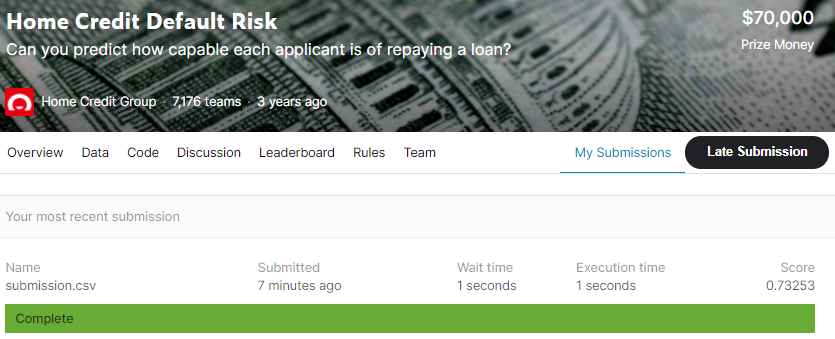

**Phase - 2 : Kaggle Submission**
For phase-2, we did multiple submission in Kaggle with different feature setting. Below is the details.
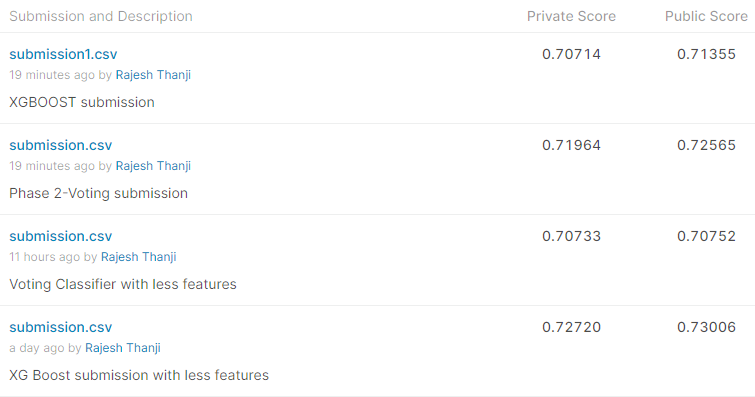

# Write-up 


## Abstract

The objective of this project is to use machine learning methodologies on historical loan application data to predict whether or not an applicant will be able to repay a loan. As an extension to the Visual EDA driven feature sampling and baseline model development, the focus for this phase included  data modelling to combine available datasets, feature engineering considering categorical, numerical, aggregated & polynomial features, and implementing experiments using Logistic Regression with PCA to handle multicollinearity, decision tree approaches using gradient boosting, Xgboost, LightGBM & further attempting to improve on those models using random forest and SVM. Our results in this phase show that the best performing algorithm was XGBoost with validation accuracy 92.44% and 71.85% as the test ROC_AUC,respectively. The lowest performing was SVM model at 92.44% and 64.33% validation and test AUC(Area under ROC). Our best score in Kaggle submission out of all four submission was 0.72720 for private and 0.73006 for public.


## Project Description

Home Credit is an international non-bank financial institution, which primarily focuses on lending people money regardless of their credit history. Home credit groups aim to provide positive borrowing experience to customers, who do not bank on traditional sources. Hence, Home Credit Group published a dataset on Kaggle website with the objective of identifying and solving unfair loan rejection.

The goal of this project is to build a machine learning model to predict the customer behavior on repayment of loan. Our task would be to create a pipeline to build a baseline machine learning model using logistic regression classification algorithms. The final model will be evaluated with various performance metrics to build a better model. Businesses will be able to use the output of the model to identify if loan is at risk to default. The new model built will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

The results of our machine learning pipelines will be measured using the follwing metrics;

- Confusion Matrix
- Accuracy Score
- Precision
- Recall
- F1 score
- AUC (Area Under ROC Curve)

The pipeline results will be logged, compared and ranked using the appropriate measurements. The most efficient pipeline will be submitted to the HCDR Kaggle Competition.

**Workflow**

For this project, we are following the proposed workflow as mentioned in Phase-0 of this project.

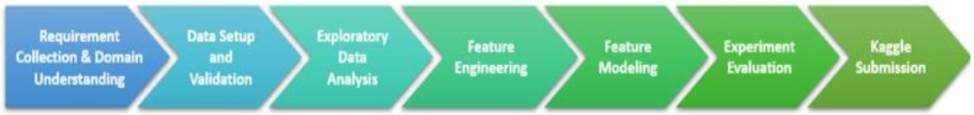

## Data Description
Overview
The full dataset consists of 7 tables. There is 1 primary table and 6 secondary tables. 

## Primary Tables <br>

1. **application_train** <br>
This Primary table includes the application information for each loan application at Home Credit in one row. This row includes the target variable of whether or not the loan was repaid. We use this field as the basis to determine the feature importance. The target variable is binary in nature based since this is a classification problem. <br>

- '1' - client with payment difficulties: he/she had late payment more than N days on at least one of the first M installments of the loan in our sample <br>
- '0' - all other cases <br>
The number of variables are 122. The number of data entries are 307,511

2. **application_test** <br>
This table includes the application information for each loan application at Home Credit in one row. The features are the same as the train data but exclude the target variable <br>
The number of variables are 121. The number of data entries are 48,744.

## Secondary Tables <br>

1. **Bureau** <br>
This table includes all previous credits received by a customer from other financial institutions prior to their loan application. There is one row for each previous credit, meaning a many-to-one relationship with the primary table. We could join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 17.The number of data entries are 1,716,428.

2. **Bureau Balance** <br>
This table includes the monthly balance for a previous credit at other financial institutions. There is one row for each monthly balance, meaning a many-to-one relationship with the Bureau table. We could join it with bureau table by using bureau's ID, SK_ID_BUREAU. <br>
The number of variables are 3. The number of data entries are 27,299,925

3. **Previous Application** <br>
This table includes previous applications for loans made by the customer at Home Credit. There is one row for each previous application, meaning a many-to-one relationship with the primary table. We could join it with primary table by using current application ID, SK_ID_CURR. <br>
There are four types of contracts: <br>
a. Consumer loan(POS – Credit limit given to buy consumer goods) <br>
b. Cash loan(Client is given cash) <br>
c. Revolving loan(Credit) <br>
d. XNA (Contract type without values) <br>
The number of variables are 37. The number of data entries are 1,670,214

4. **POS CASH Balance** <br>
This table includes a monthly balance snapshot of a previous point of sale or cash loan that the customer has at Home Credit. There is one row for each monthly balance, meaning a many-to-one relationship with the Previous Application table. We would  join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 8. The number of data entries are 10,001,358

5. **Credit Card Balance** <br>
This table includes a monthly balance snapshot of previous credit cards the customer has with Home Credit. There is one row for each previous monthly balance, meaning a many-to-one relationship with the Previous Application table.We could join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 23. The number of data entries are 3,840,312

6. **Installments Payments** <br>
This table includes previous repayments made or not made by the customer on credits issued by Home Credit. There is one row for each payment or missed payment, meaning a many-to-one relationship with the Previous Application table. We would join it with Previous Application table by using previous application ID, SK_ID_PREV, then join it with primary table by using current application ID, SK_ID_CURR. <br>
The number of variables are 8 . The number of data entries are 13,605,401


## EDA

Exploratory Data Analysis is valuable to this project since it allows us to get closer to the certainty that the future results will be valid, accurately interpreted, and applicable to the proposed solution. 

In phase 1 for this project this step involves looking at the summary statistics for each individual table in the model and focusing on the missing data , distribution and its central tendencies such as mean, median, count, min, max and the interquartile ranges. 

Categorical and numerical features were looked at to identify anamolies in the data. Specific features were chosen to be visualized based on the correlation and distribution. The highly correlated features were used to plot the density to evaluate the distributions in comparison to the target.

Please refer section for EDA [Exploratory Data Analysis](#EDA Section)

## Feature Engineering and transformers

The feature engineering we performed can be classified into - sub-parts which include
- Including Custom domain knowledge based features
- Creating engineered aggregated features
- Experimental modelling of the data
- Validating Manual OHE
- Creating Poly Features to degree 4 for selected features
- Merging all datasets
- Drop Columns with Missing Values

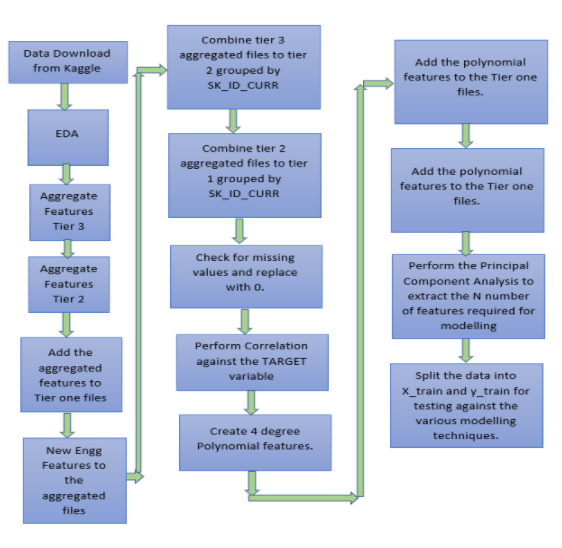

An essential part of any feature engineering process is the domain knowledge based features which will help improve the accuracy of a model. The first step was to identify these for each dataset. Some of the new custom features included were credit card amount balance after payment based on due amount,  application amount average , the credit average, Available credit as a percentage of income , Annuity as a percentage of income , Annuity as a percentage of available credit  <br>

The next step involved  was to identify the numerical features and aggregate them to mean, min & max values. An attempt was made to apply label encoding for unique values more than 5 at the engineering phase. However,  a design decision was made to apply OHE at the pipeline level for specific highly correlated fields on the final merged dataset to optimize the amount of code to handle the same functionality. <br>

Extensive feature engineering was conducted by attempting multiple modelling approaches with primary, secondary and tertiary tables prior to finalizing an optimized approach with the least amount of memory usage. Attempt one involved creating engineered and aggregated features for Tier 3 tables: bureau_balance, credit_card_installment, installment_payments  and point_of_sale_systems_cash_balance. This was then merged with Tier 2 tables i.e  prev_application_balance with  credit_card_installment, installment_payments and point_of_sale_systems_cash_balance & bureau with bureau_balance, along with aggregated features. A flat view combining all of the above tables were merged along with the primary dataset application train. This resulted in a high number of redundant features occupying large memory.<br>

 Attempt 2 involved creating custom and aggregated features for tier 3 tables and merging with tier 2 tables based on the primary key provided, which was later “extended” to the tier1 tables based on the additional aggregated columns. This approach created less duplicates, was optimized and occupied less memory by using a garbage collector after each merge. <br>

In Attempt 3, the merged dataframe in the previous attempt were merged with the polynomial features with a degree of 4. <br>

A final merge of the Tier3, Tier2 and Tier1 datasets were  used to create a train dataframe. Special care was taken to ensure that there are no columns which have more than 50% of the data missing. 
<br>
Engineering the features and including them in the model with small splits helped test the model but provided low accuracy. However, using these merged features along with reasonable splits during the training face did provide a better accuracy and less possibility of overfitting especially for Random forest and XGBoost. 
<br>
Future work and experiments include Label encoding for the unique categorical values in all categorical fields and not select few. Attempting PCA or custom function to handle multicollinearity in the pipeline and eliminate features of low importance and verify its impacts on accuracy.
<br>



## Pipelines
**Phase-1**

Logistic regression model is used as a baseline Model, since it's easy to implement yet provides great efficiency. Training a logistic regression model doesn't require high computation power. We also tuned the regularization, tolerance, and C hyper parameters for the Logistic regression model and compared the results with the baseline model. We used 15 fold cross fold validation with hyperparameters to tune the model and apply GridSearchCV function in Sklearn. 

**Phase 2 :** 

In Phase-1, we implemented the Logistic regression model as the baseline model, which didn’t require high computation power and was easy to implement, in addition we implemented KNN and tuned logistic models with balanced dataset to improve our model predictiveness. Our objective in phase 2 is to explore various classification models which would improve our prediction. Our primary focus is on boosting algorithms which are said to be highly efficient and moderately quicker. As shown in the diagram below is the modelling pipeline for phase 2. We primarily experimented with Gradient Boosting, XGBoost, Light BGM, RandomForest and SVM. 

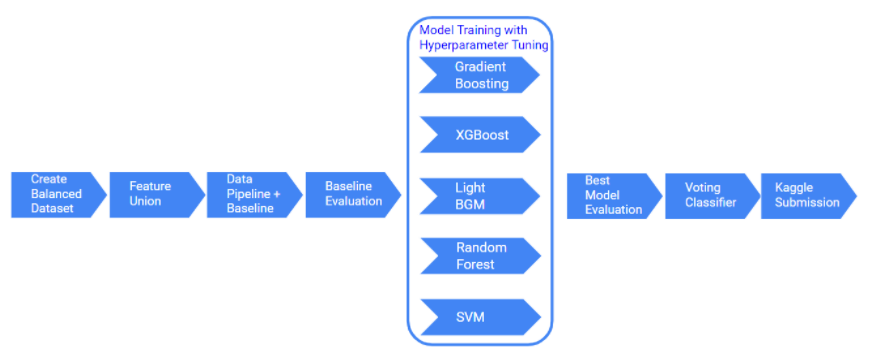

**Recursive Feature Elimination**
RFE is a wrapper-type feature selection algorithm. A different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. We have chosen this model in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score. 

Below is the reason for choosing the mentioned models.

1. Gradient Boosting provides a better predictive model by forming an ensemble of weak predictors. 
2. XGBoost is one of the quickest implementations of gradient boosted trees. XGBoost is designed to handle missing values internally. This is helpful because there are many, many hyperparameters to tune. 
3. LightGBM in many cases provides results which are more effective and faster than XGBoost with lesser memory usage. It splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. 
4. Random Forest is a tree-based machine learning algorithm that combines the output of multiple decision trees for making decisions. For each tree only a random subsample of the available features is selected for building the tree. Random Forest uses decision trees, which are more prone to overfitting. 
5. SVM performs similar to logistic regression when linear separation and performs well with non-linear boundaries depending on the kernel used. SVM is susceptible to overfitting/training issues depending on the kernel. A more complex kernel would overfit the model.

Gradient Boosting implementations have no regularisation like XGBoost, therefore it helps to reduce overfitting. But boosting algorithms can overfit if the number of trees is very large. We did two submission in Kaggle, one using Voting Classifier and the other one with best classifier i.e. XGBoost. A Voting Classifier is a machine learning model that trains on an ensemble of various models and predicts an output based on their highest probability of chosen class as the output. We have chosen soft voting instead of hard voting since the soft voting predicts based on the average of all models.


## Experimental results
Below is the resulting table for the three baseline that we performed on the given dataset. Please refer section [Final results](#exp results)

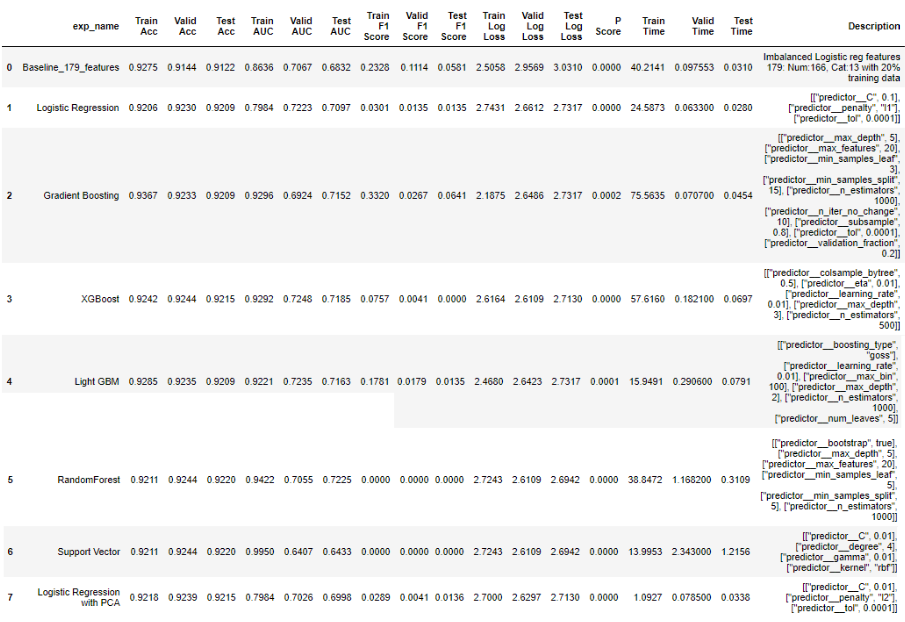



## Discussion of Results
Based on the models discussed above, XGBoost stood out as the best predictive model using the top 179 features and RFE.

1. Logistic Regression : This model was chosen as the baseline model trained with both balanced and imbalanced dataset with feature engineering. The training accuracy for this model 92.06% and test accuracy as 92.09%. A 70.97% ROC score resulted with best parameters for this model. The same model was run with PCA and the test ROC reduced to 69.98%.

2. Gradient Boosting : Boosting did help in achieving better results. The results were good enough to continue in implementing & evaluating other boosting models. Training accuracy of 93.67% and test accuracy of 92.09% was achieved in this model. Test ROC under the curve for this model came out to 71.52%

3. XGBoost : By far this model resulted in the best model. Both in terms of timing and accuracy for the selected features and balanced dataset. The accuracy of the training and test are 92.42% and test 92.44%. Test ROC under the curve is 72.48%.

4. Light BGM : Though expectation was this model would give us better and faster results than XGBoost, however it was slightly lower than it but it was better than the baseline models. A training accuracy of 92.85% and test accuracy 92.09% was achieved. Test ROC under the curve for this model is 71.63%. 

5. Random Forest : On our last decision tree models, Random Forest produced training accuracy of 92.11% and test accuracy of 92.2%. Test ROC score came out as 72.25%. 

6. SVM : This was the lowest performing model in our expirement. Even after hypertuning RBF and poly kernels the results were not promising. The ROC score achieved for this model is 64.33%.

## Conclusion

Our implementation using ML models to predict if an applicant will be able to repay a loan was successful. Extending from the phase-1's simple baseline model, data modelling with feature aggregation, feature engineering, and using various data preprocessing pipeline both increased & reduced efficiency of models. Models used for prediction were Logistic Regression with PCA to handle multicollinearity, ensemble model approaches using gradient boosting, Xgboost, LightGBM, Random forest and SVM. 

Our best performing algorithm was XGBoost with the best AUC ROC score as 71.85%. The lowest performing model was SVM. Related ensemble models, Gradient Boosting has shown lower results with AUC ROC score 71.52% validation. Our best score in Kaggle submission out of all four submission was 0.72720 for private and 0.73006 for public. However we believe that in future phases we will obtain models with better performance by using PyTorch and implementing Neural Network.


## Problems faced
The problem encountered apart from the accuracy of the model include:

1. We tried to wrap the SVM model with RFE and PCA feature reduction models, but SVM polynomial kernal is not supported with the feature selection model. Hence we couldn't implement it.
2. An unstable platform for running Machine Learning Models and collaboration 
3. Long running models and system crash was the one of the biggest challenge we faced
4. Resampling techniques didn't produce good results with ensemble models
5. Feature engineering should be improved more 

## Kaggle Submission
Below is the screenshot of our best kaggle submission.   

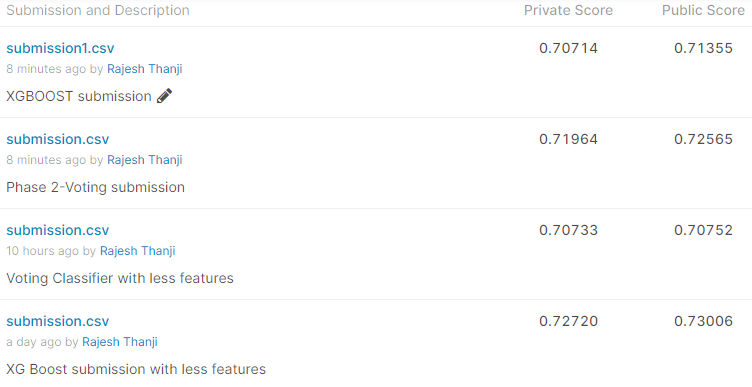


# References

Some of the material in this notebook has been adopted from following 

1. https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook
2. https://towardsdatascience.com/a-machine-learning-approach-to-credit-risk-assessment-ba8eda1cd11f
3. https://juhiramzai.medium.com/introduction-to-credit-risk-modeling-e589d6914f57
4. https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
5. https://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy
6. https://machinelearningmastery.com/rfe-feature-selection-in-python/#:~:text=RFE%20is%20a%20wrapper%2Dtype%20feature%20selection%20algorithm.&text=This%20is%20achieved%20by%20fitting,specified%20number%20of%20features%20remains.
7. https://www.analyticsvidhya.com/blog/2020/10/7-feature-engineering-techniques-machine-learning/
8. https://www.geeksforgeeks.org/append-extend-python/
9. https://www.analyticsvidhya.com/blog/2020/03/google-colab-machine-learning-deep-learning/
10. https://stackify.com/python-garbage-collection/

